# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpdob9_mnn


[d3graph] INFO> Writing /local/scratch/tmp/tmpdob9_mnn/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [5]:
#model.normalization = "log"
model.organisms = ['NCBITaxon:9606','NCBITaxon:10090']


  0%|          | 0/27 [00:00<?, ?it/s]


  4%|▎         | 1/27 [00:02<01:10,  2.70s/it]


  7%|▋         | 2/27 [00:03<00:39,  1.59s/it]


 11%|█         | 3/27 [00:04<00:29,  1.22s/it]


 15%|█▍        | 4/27 [00:05<00:24,  1.05s/it]


 19%|█▊        | 5/27 [00:05<00:21,  1.02it/s]


 22%|██▏       | 6/27 [00:07<00:26,  1.28s/it]


 26%|██▌       | 7/27 [00:08<00:22,  1.11s/it]


 30%|██▉       | 8/27 [00:09<00:18,  1.00it/s]


 33%|███▎      | 9/27 [00:10<00:16,  1.08it/s]


 37%|███▋      | 10/27 [00:10<00:14,  1.14it/s]


 41%|████      | 11/27 [00:11<00:13,  1.19it/s]


 44%|████▍     | 12/27 [00:12<00:12,  1.21it/s]


 48%|████▊     | 13/27 [00:13<00:13,  1.06it/s]


 52%|█████▏    | 14/27 [00:14<00:12,  1.01it/s]


 56%|█████▌    | 15/27 [00:15<00:11,  1.05it/s]


 59%|█████▉    | 16/27 [00:16<00:11,  1.03s/it]


 63%|██████▎   | 17/27 [00:17<00:10,  1.00s/it]


 67%|██████▋   | 18/27 [00:18<00:09,  1.01s/it]


 70%|███████   | 19/27 [00:19<00:08,  1.07s/it]


 74%|███████▍  | 20/27 [00:20<00:06,  1.01it/s]


 78%|███████▊  | 21/27 [00:21<00:06,  1.05s/it]


 81%|████████▏ | 22/27 [00:23<00:05,  1.09s/it]


 85%|████████▌ | 23/27 [00:23<00:03,  1.00it/s]


 89%|████████▉ | 24/27 [00:25<00:03,  1.04s/it]


 93%|█████████▎| 25/27 [00:26<00:02,  1.05s/it]


 96%|█████████▋| 26/27 [00:27<00:01,  1.00s/it]


100%|██████████| 27/27 [00:27<00:00,  1.04it/s]


100%|██████████| 27/27 [00:28<00:00,  1.04s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


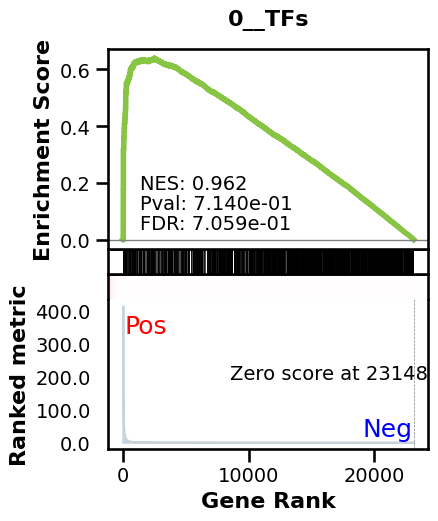

_________________________________________
TF specific enrichment


found some significant results for  61.607142857142854 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:28,  4.42it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.43it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.44it/s]


  3%|▎         | 4/128 [00:00<00:27,  4.44it/s]


  4%|▍         | 5/128 [00:01<00:27,  4.43it/s]


  5%|▍         | 6/128 [00:01<00:27,  4.43it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.43it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.44it/s]


  7%|▋         | 9/128 [00:02<00:26,  4.44it/s]


  8%|▊         | 10/128 [00:02<00:26,  4.45it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.45it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.46it/s]


 10%|█         | 13/128 [00:02<00:25,  4.45it/s]


 11%|█         | 14/128 [00:03<00:25,  4.45it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.44it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.44it/s]


 13%|█▎        | 17/128 [00:03<00:24,  4.45it/s]


 14%|█▍        | 18/128 [00:04<00:24,  4.44it/s]


 15%|█▍        | 19/128 [00:04<00:24,  4.44it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.45it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.45it/s]


 17%|█▋        | 22/128 [00:04<00:23,  4.44it/s]


 18%|█▊        | 23/128 [00:05<00:23,  4.45it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.45it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.44it/s]


 20%|██        | 26/128 [00:05<00:22,  4.45it/s]


 21%|██        | 27/128 [00:06<00:22,  4.46it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.46it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.45it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.44it/s]


 24%|██▍       | 31/128 [00:06<00:21,  4.44it/s]


 25%|██▌       | 32/128 [00:07<00:21,  4.44it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.46it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.46it/s]


 27%|██▋       | 35/128 [00:07<00:20,  4.46it/s]


 28%|██▊       | 36/128 [00:08<00:20,  4.46it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.46it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.45it/s]


 30%|███       | 39/128 [00:08<00:20,  4.45it/s]


 31%|███▏      | 40/128 [00:08<00:19,  4.46it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.46it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.46it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.46it/s]


 34%|███▍      | 44/128 [00:09<00:18,  4.46it/s]


 35%|███▌      | 45/128 [00:10<00:18,  4.46it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.46it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.46it/s]


 38%|███▊      | 48/128 [00:10<00:17,  4.45it/s]


 38%|███▊      | 49/128 [00:11<00:17,  4.45it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.45it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.45it/s]


 41%|████      | 52/128 [00:11<00:17,  4.45it/s]


 41%|████▏     | 53/128 [00:11<00:16,  4.44it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.44it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.43it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.44it/s]


 45%|████▍     | 57/128 [00:12<00:15,  4.45it/s]


 45%|████▌     | 58/128 [00:13<00:15,  4.45it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.46it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.46it/s]


 48%|████▊     | 61/128 [00:13<00:15,  4.46it/s]


 48%|████▊     | 62/128 [00:13<00:14,  4.45it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.45it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.46it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.46it/s]


 52%|█████▏    | 66/128 [00:14<00:13,  4.46it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.47it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.47it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.47it/s]


 55%|█████▍    | 70/128 [00:15<00:12,  4.47it/s]


 55%|█████▌    | 71/128 [00:15<00:12,  4.47it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.47it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.47it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.46it/s]


 59%|█████▊    | 75/128 [00:16<00:11,  4.46it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.46it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.45it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.46it/s]


 62%|██████▏   | 79/128 [00:17<00:10,  4.47it/s]


 62%|██████▎   | 80/128 [00:17<00:10,  4.46it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.46it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.45it/s]


 65%|██████▍   | 83/128 [00:18<00:10,  4.46it/s]


 66%|██████▌   | 84/128 [00:18<00:09,  4.47it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.47it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.48it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.47it/s]


 69%|██████▉   | 88/128 [00:19<00:08,  4.48it/s]


 70%|██████▉   | 89/128 [00:19<00:08,  4.48it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.47it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.47it/s]


 72%|███████▏  | 92/128 [00:20<00:08,  4.47it/s]


 73%|███████▎  | 93/128 [00:20<00:07,  4.47it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.47it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.47it/s]


 75%|███████▌  | 96/128 [00:21<00:07,  4.47it/s]


 76%|███████▌  | 97/128 [00:21<00:06,  4.46it/s]


 77%|███████▋  | 98/128 [00:21<00:06,  4.47it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.47it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.46it/s]


 79%|███████▉  | 101/128 [00:22<00:06,  4.47it/s]


 80%|███████▉  | 102/128 [00:22<00:05,  4.46it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.46it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.47it/s]


 82%|████████▏ | 105/128 [00:23<00:05,  4.47it/s]


 83%|████████▎ | 106/128 [00:23<00:04,  4.46it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.46it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.46it/s]


 85%|████████▌ | 109/128 [00:24<00:04,  4.47it/s]


 86%|████████▌ | 110/128 [00:24<00:04,  4.47it/s]


 87%|████████▋ | 111/128 [00:24<00:03,  4.46it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.47it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.48it/s]


 89%|████████▉ | 114/128 [00:25<00:03,  4.47it/s]


 90%|████████▉ | 115/128 [00:25<00:02,  4.48it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.47it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.47it/s]


 92%|█████████▏| 118/128 [00:26<00:02,  4.48it/s]


 93%|█████████▎| 119/128 [00:26<00:02,  4.47it/s]


 94%|█████████▍| 120/128 [00:26<00:01,  4.46it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.48it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.48it/s]


 96%|█████████▌| 123/128 [00:27<00:01,  4.48it/s]


 97%|█████████▋| 124/128 [00:27<00:00,  4.49it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.48it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.49it/s]


 99%|█████████▉| 127/128 [00:28<00:00,  4.48it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:28<00:00,  4.46it/s]


100%|██████████| 128/128 [00:28<00:00,  4.46it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010082613242527612


EPR: 1.794288323583073


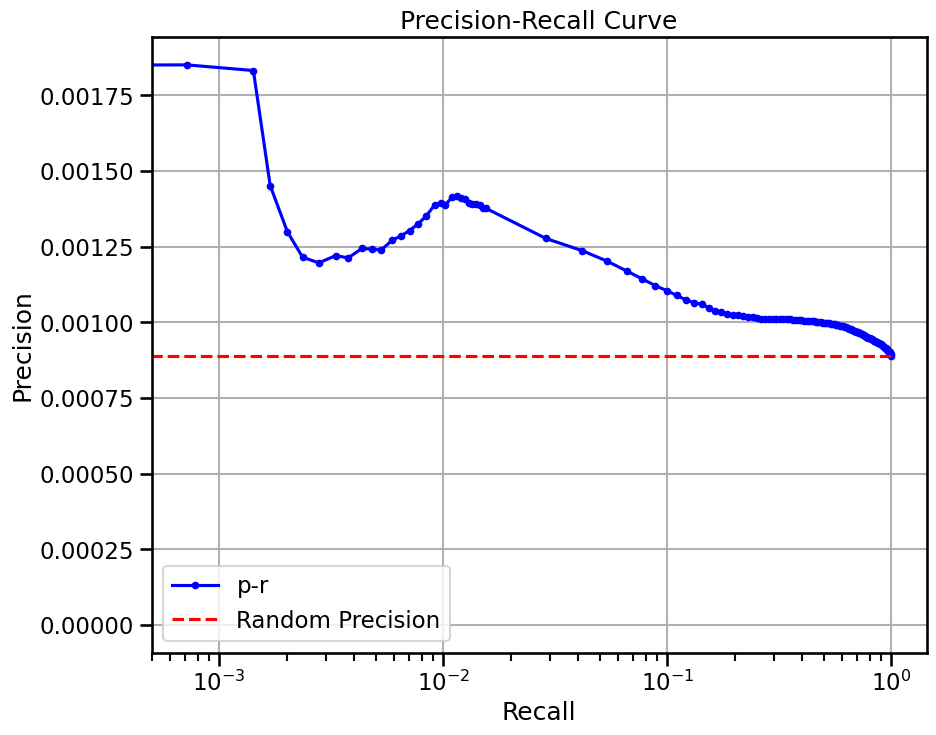


  0%|          | 0/54 [00:00<?, ?it/s]


  2%|▏         | 1/54 [00:02<01:51,  2.11s/it]


  4%|▎         | 2/54 [00:03<01:21,  1.57s/it]


  6%|▌         | 3/54 [00:04<01:10,  1.39s/it]


  7%|▋         | 4/54 [00:05<01:05,  1.31s/it]


  9%|▉         | 5/54 [00:06<01:01,  1.26s/it]


 11%|█         | 6/54 [00:08<00:59,  1.25s/it]


 13%|█▎        | 7/54 [00:09<00:57,  1.23s/it]


 15%|█▍        | 8/54 [00:10<00:55,  1.21s/it]


 17%|█▋        | 9/54 [00:11<00:54,  1.20s/it]


 19%|█▊        | 10/54 [00:12<00:52,  1.19s/it]


 20%|██        | 11/54 [00:13<00:51,  1.19s/it]


 22%|██▏       | 12/54 [00:15<00:49,  1.18s/it]


 24%|██▍       | 13/54 [00:16<00:48,  1.18s/it]


 26%|██▌       | 14/54 [00:17<00:47,  1.18s/it]


 28%|██▊       | 15/54 [00:18<00:46,  1.18s/it]


 30%|██▉       | 16/54 [00:19<00:44,  1.18s/it]


 31%|███▏      | 17/54 [00:21<00:43,  1.18s/it]


 33%|███▎      | 18/54 [00:22<00:42,  1.19s/it]


 35%|███▌      | 19/54 [00:23<00:41,  1.19s/it]


 37%|███▋      | 20/54 [00:24<00:40,  1.19s/it]


 39%|███▉      | 21/54 [00:25<00:39,  1.19s/it]


 41%|████      | 22/54 [00:26<00:38,  1.19s/it]


 43%|████▎     | 23/54 [00:28<00:36,  1.18s/it]


 44%|████▍     | 24/54 [00:29<00:35,  1.18s/it]


 46%|████▋     | 25/54 [00:30<00:33,  1.17s/it]


 48%|████▊     | 26/54 [00:31<00:32,  1.17s/it]


 50%|█████     | 27/54 [00:32<00:31,  1.16s/it]


 52%|█████▏    | 28/54 [00:33<00:30,  1.16s/it]


 54%|█████▎    | 29/54 [00:35<00:28,  1.15s/it]


 56%|█████▌    | 30/54 [00:36<00:27,  1.15s/it]


 57%|█████▋    | 31/54 [00:37<00:26,  1.14s/it]


 59%|█████▉    | 32/54 [00:38<00:25,  1.14s/it]


 61%|██████    | 33/54 [00:39<00:23,  1.14s/it]


 63%|██████▎   | 34/54 [00:40<00:22,  1.14s/it]


 65%|██████▍   | 35/54 [00:41<00:21,  1.14s/it]


 67%|██████▋   | 36/54 [00:43<00:20,  1.14s/it]


 69%|██████▊   | 37/54 [00:44<00:19,  1.14s/it]


 70%|███████   | 38/54 [00:45<00:18,  1.14s/it]


 72%|███████▏  | 39/54 [00:46<00:17,  1.15s/it]


 74%|███████▍  | 40/54 [00:47<00:16,  1.15s/it]


 76%|███████▌  | 41/54 [00:48<00:14,  1.15s/it]


 78%|███████▊  | 42/54 [00:49<00:13,  1.14s/it]


 80%|███████▉  | 43/54 [00:51<00:12,  1.15s/it]


 81%|████████▏ | 44/54 [00:52<00:11,  1.15s/it]


 83%|████████▎ | 45/54 [00:53<00:10,  1.15s/it]


 85%|████████▌ | 46/54 [00:54<00:09,  1.15s/it]


 87%|████████▋ | 47/54 [00:55<00:08,  1.15s/it]


 89%|████████▉ | 48/54 [00:56<00:06,  1.15s/it]


 91%|█████████ | 49/54 [00:57<00:05,  1.15s/it]


 93%|█████████▎| 50/54 [00:59<00:04,  1.14s/it]


 94%|█████████▍| 51/54 [01:00<00:03,  1.14s/it]


 96%|█████████▋| 52/54 [01:01<00:02,  1.13s/it]


 98%|█████████▊| 53/54 [01:02<00:01,  1.13s/it]


100%|██████████| 54/54 [01:03<00:00,  1.04it/s]


100%|██████████| 54/54 [01:03<00:00,  1.17s/it]

base enrichment


Top central genes: []


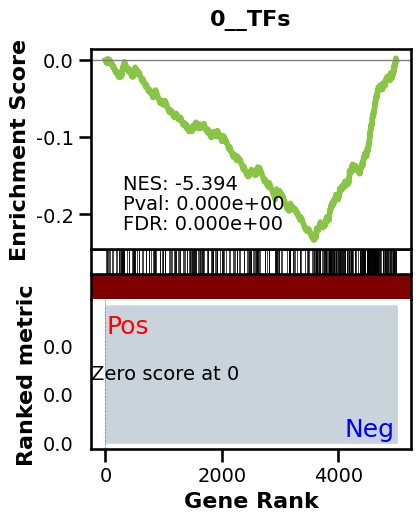

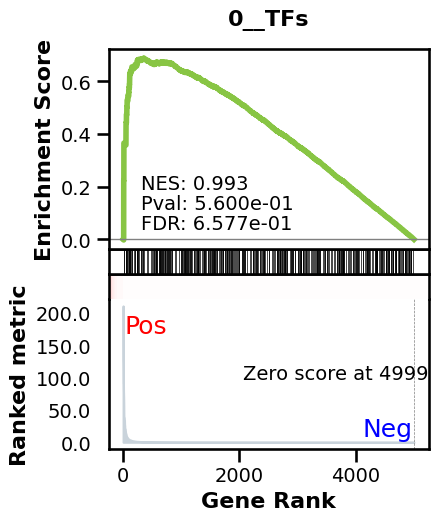

_________________________________________
TF specific enrichment


found some significant results for  11.764705882352942 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.90it/s]


  9%|▉         | 12/128 [00:00<00:01, 59.75it/s]


 14%|█▍        | 18/128 [00:00<00:01, 59.62it/s]


 19%|█▉        | 24/128 [00:00<00:01, 59.63it/s]


 23%|██▎       | 30/128 [00:00<00:01, 59.75it/s]


 29%|██▉       | 37/128 [00:00<00:01, 59.80it/s]


 34%|███▎      | 43/128 [00:00<00:01, 59.82it/s]


 38%|███▊      | 49/128 [00:00<00:01, 59.75it/s]


 43%|████▎     | 55/128 [00:00<00:01, 58.99it/s]


 48%|████▊     | 62/128 [00:01<00:01, 59.38it/s]


 53%|█████▎    | 68/128 [00:01<00:01, 59.40it/s]


 59%|█████▊    | 75/128 [00:01<00:00, 59.64it/s]


 63%|██████▎   | 81/128 [00:01<00:00, 59.53it/s]


 68%|██████▊   | 87/128 [00:01<00:00, 59.65it/s]


 73%|███████▎  | 93/128 [00:01<00:00, 59.56it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 59.57it/s]


 83%|████████▎ | 106/128 [00:01<00:00, 59.67it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 59.51it/s]


 92%|█████████▏| 118/128 [00:01<00:00, 59.57it/s]


 97%|█████████▋| 124/128 [00:02<00:00, 59.63it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 59.59it/s]

Area Under Precision-Recall Curve (AUPRC):  0.000876341582078115
EPR: 2.6620469453287052


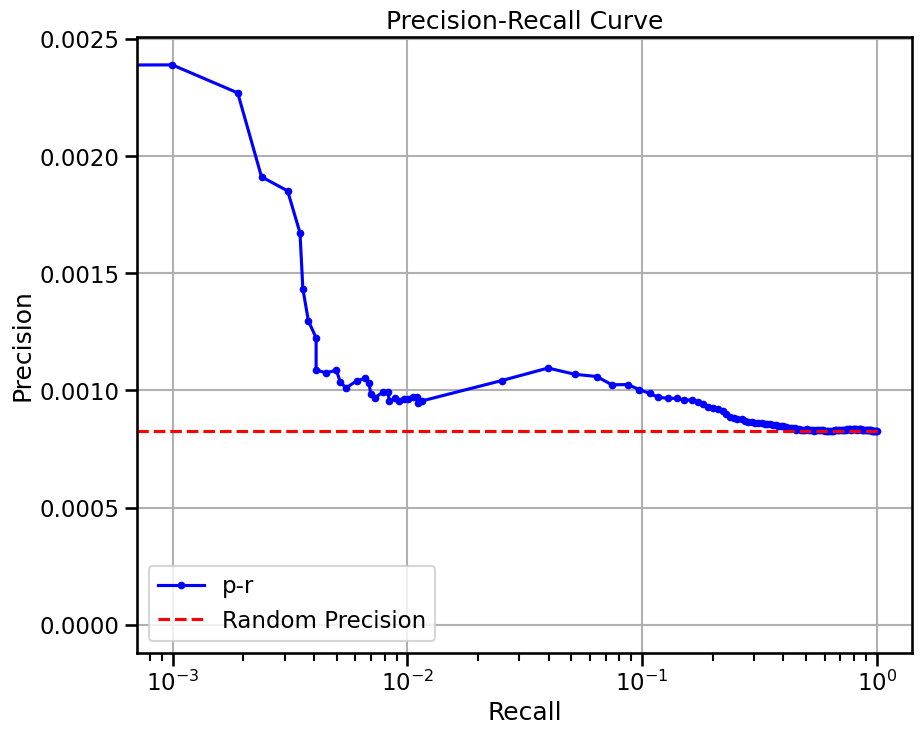

base enrichment


Top central genes: []


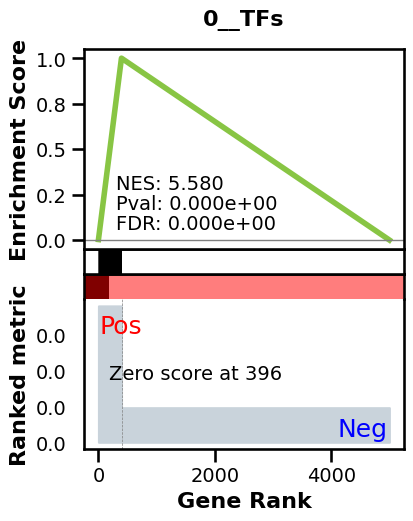

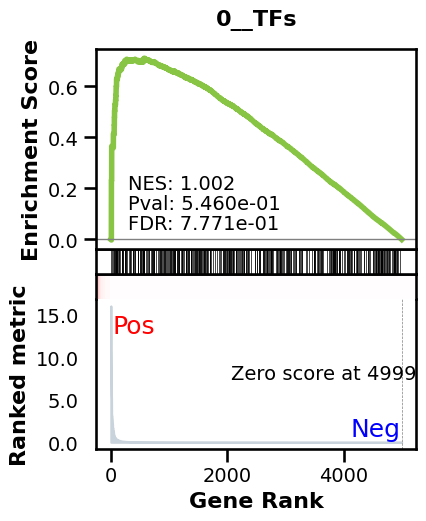

_________________________________________
TF specific enrichment


found some significant results for  17.647058823529413 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 58.91it/s]


  9%|▉         | 12/128 [00:00<00:01, 58.58it/s]


 14%|█▍        | 18/128 [00:00<00:01, 58.25it/s]


 19%|█▉        | 24/128 [00:00<00:01, 58.42it/s]


 23%|██▎       | 30/128 [00:00<00:01, 58.49it/s]


 28%|██▊       | 36/128 [00:00<00:01, 58.45it/s]


 33%|███▎      | 42/128 [00:00<00:01, 58.55it/s]


 38%|███▊      | 48/128 [00:00<00:01, 58.29it/s]


 42%|████▏     | 54/128 [00:00<00:01, 58.16it/s]


 47%|████▋     | 60/128 [00:01<00:01, 58.06it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 58.02it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 57.97it/s]


 61%|██████    | 78/128 [00:01<00:00, 57.92it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 58.05it/s]


 70%|███████   | 90/128 [00:01<00:00, 58.26it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 58.21it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 58.49it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 58.30it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 58.19it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 58.06it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 57.98it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 58.19it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016630239581753494
EPR: 4.246105316851987


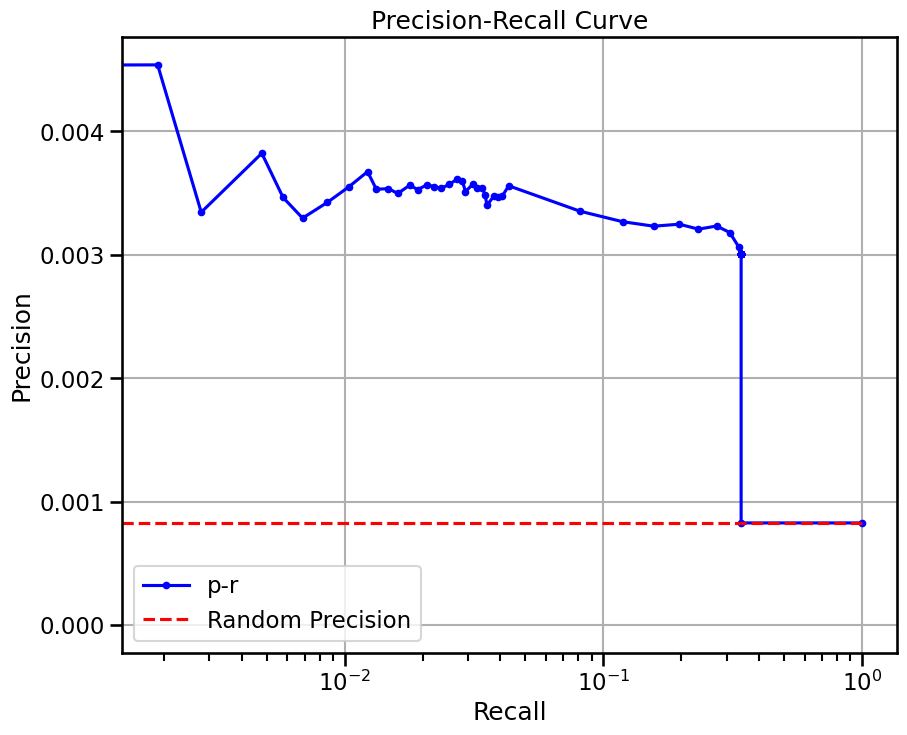

true elem 10028 ...


doing classification....


metrics {'used_heads': 3, 'precision': 0.0008314620117426245, 'random_precision': 0.0008314620117426245, 'recall': 1.0, 'predicted_true': 4855303.0, 'number_of_true': 4037.0}


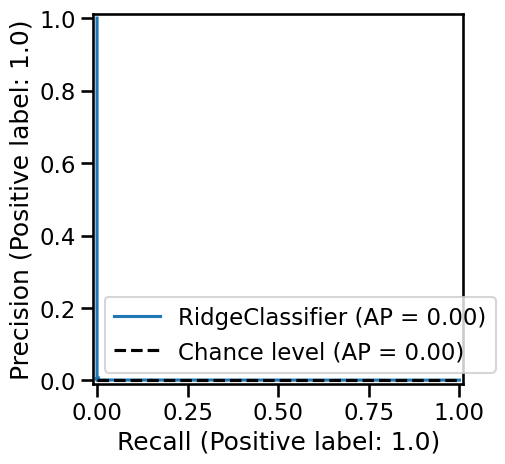

base enrichment


Top central genes: []


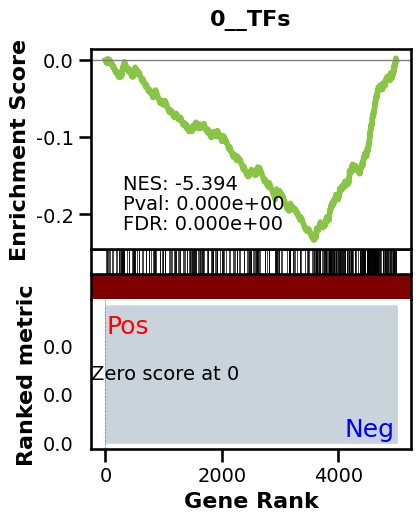

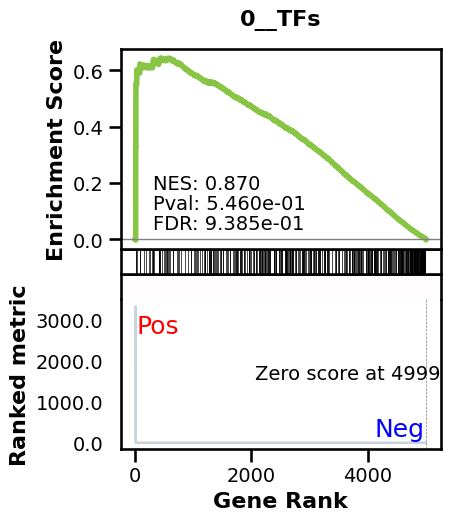

_________________________________________
TF specific enrichment


found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 58.09it/s]


  9%|▉         | 12/128 [00:00<00:01, 58.14it/s]


 14%|█▍        | 18/128 [00:00<00:01, 58.12it/s]


 19%|█▉        | 24/128 [00:00<00:01, 58.18it/s]


 23%|██▎       | 30/128 [00:00<00:01, 58.22it/s]


 28%|██▊       | 36/128 [00:00<00:01, 58.48it/s]


 33%|███▎      | 42/128 [00:00<00:01, 58.39it/s]


 38%|███▊      | 48/128 [00:00<00:01, 58.66it/s]


 42%|████▏     | 54/128 [00:00<00:01, 58.54it/s]


 47%|████▋     | 60/128 [00:01<00:01, 58.44it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 58.38it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 58.34it/s]


 61%|██████    | 78/128 [00:01<00:00, 58.32it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 58.27it/s]


 70%|███████   | 90/128 [00:01<00:00, 58.32it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 58.30it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 58.27it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 58.42it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 58.49it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 47.85it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 50.55it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.39it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009939949376875782
EPR: 4.979989927628857


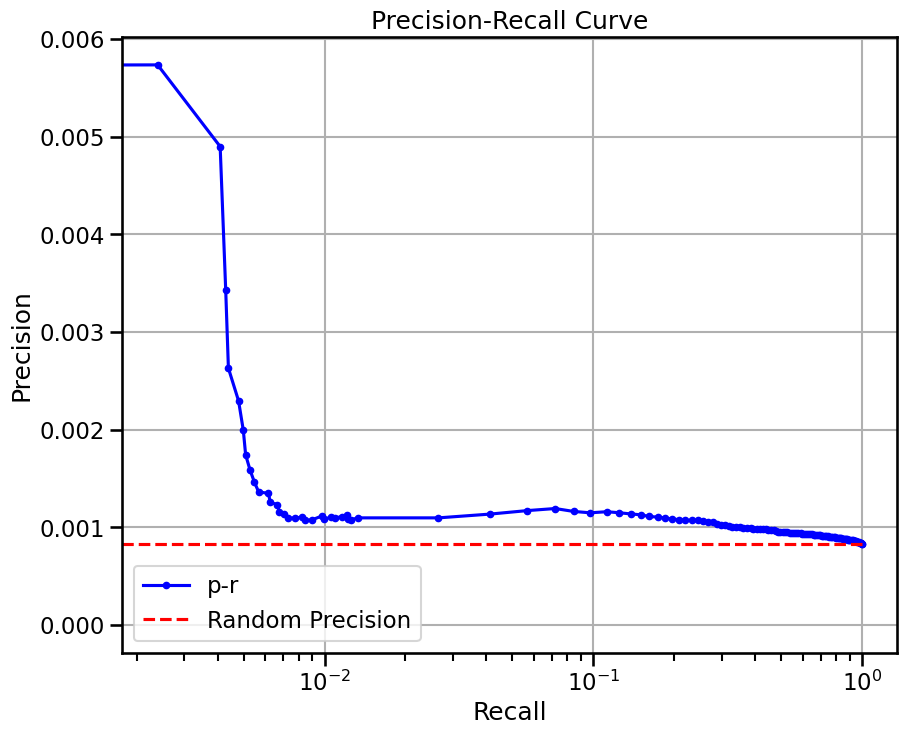

base enrichment


Top central genes: []


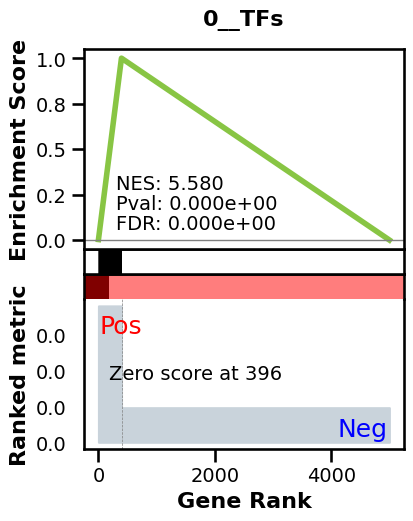

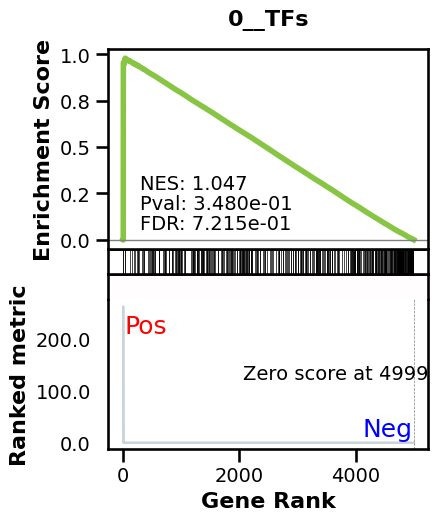

_________________________________________
TF specific enrichment


found some significant results for  8.823529411764707 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 57.79it/s]


  9%|▉         | 12/128 [00:00<00:01, 58.55it/s]


 14%|█▍        | 18/128 [00:00<00:01, 58.24it/s]


 19%|█▉        | 24/128 [00:00<00:01, 57.98it/s]


 23%|██▎       | 30/128 [00:00<00:01, 58.33it/s]


 28%|██▊       | 36/128 [00:00<00:01, 58.06it/s]


 33%|███▎      | 42/128 [00:00<00:01, 58.38it/s]


 38%|███▊      | 48/128 [00:00<00:01, 58.19it/s]


 42%|████▏     | 54/128 [00:00<00:01, 57.96it/s]


 47%|████▋     | 60/128 [00:01<00:01, 58.33it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 58.06it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 58.31it/s]


 61%|██████    | 78/128 [00:01<00:00, 58.09it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 57.96it/s]


 70%|███████   | 90/128 [00:01<00:00, 58.21it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 58.00it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 58.20it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 58.01it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 57.96it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 58.07it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 58.05it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 58.08it/s]

Area Under Precision-Recall Curve (AUPRC):  0.002226923771398881
EPR: 12.416585640502555


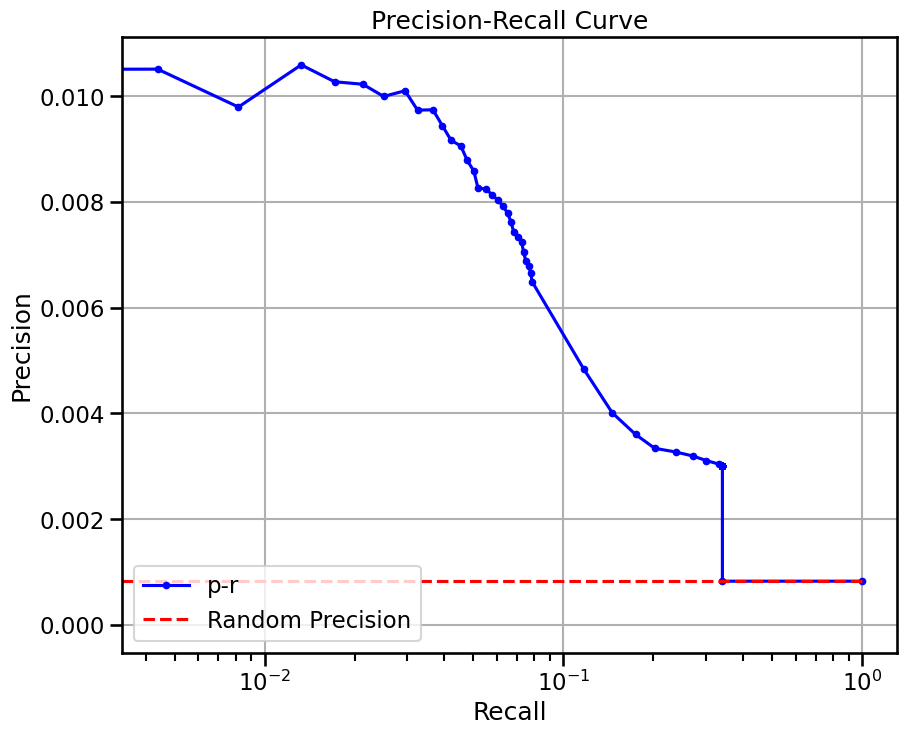


  0%|          | 0/9 [00:00<?, ?it/s]


 11%|█         | 1/9 [00:02<00:16,  2.06s/it]


 22%|██▏       | 2/9 [00:02<00:09,  1.39s/it]


 33%|███▎      | 3/9 [00:03<00:07,  1.18s/it]


 44%|████▍     | 4/9 [00:04<00:05,  1.08s/it]


 56%|█████▌    | 5/9 [00:05<00:04,  1.02s/it]


 67%|██████▋   | 6/9 [00:06<00:02,  1.02it/s]


 78%|███████▊  | 7/9 [00:07<00:01,  1.05it/s]


 89%|████████▉ | 8/9 [00:08<00:00,  1.06it/s]


100%|██████████| 9/9 [00:08<00:00,  1.45it/s]


100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


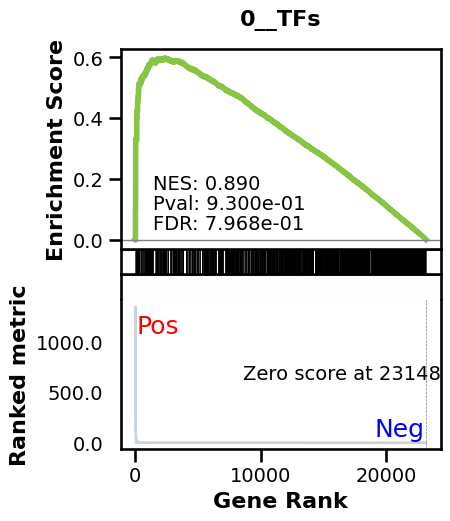

_________________________________________
TF specific enrichment


found some significant results for  66.07142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:30,  4.15it/s]


  2%|▏         | 2/128 [00:00<00:30,  4.15it/s]


  2%|▏         | 3/128 [00:00<00:29,  4.17it/s]


  3%|▎         | 4/128 [00:00<00:29,  4.20it/s]


  4%|▍         | 5/128 [00:01<00:29,  4.20it/s]


  5%|▍         | 6/128 [00:01<00:29,  4.19it/s]


  5%|▌         | 7/128 [00:01<00:28,  4.18it/s]


  6%|▋         | 8/128 [00:01<00:28,  4.17it/s]


  7%|▋         | 9/128 [00:02<00:28,  4.17it/s]


  8%|▊         | 10/128 [00:02<00:28,  4.17it/s]


  9%|▊         | 11/128 [00:02<00:28,  4.17it/s]


  9%|▉         | 12/128 [00:02<00:27,  4.17it/s]


 10%|█         | 13/128 [00:03<00:27,  4.16it/s]


 11%|█         | 14/128 [00:03<00:27,  4.17it/s]


 12%|█▏        | 15/128 [00:03<00:27,  4.16it/s]


 12%|█▎        | 16/128 [00:03<00:26,  4.16it/s]


 13%|█▎        | 17/128 [00:04<00:26,  4.16it/s]


 14%|█▍        | 18/128 [00:04<00:26,  4.17it/s]


 15%|█▍        | 19/128 [00:04<00:26,  4.17it/s]


 16%|█▌        | 20/128 [00:04<00:25,  4.17it/s]


 16%|█▋        | 21/128 [00:05<00:25,  4.18it/s]


 17%|█▋        | 22/128 [00:05<00:25,  4.18it/s]


 18%|█▊        | 23/128 [00:05<00:25,  4.18it/s]


 19%|█▉        | 24/128 [00:05<00:24,  4.19it/s]


 20%|█▉        | 25/128 [00:05<00:24,  4.18it/s]


 20%|██        | 26/128 [00:06<00:24,  4.18it/s]


 21%|██        | 27/128 [00:06<00:24,  4.17it/s]


 22%|██▏       | 28/128 [00:06<00:23,  4.18it/s]


 23%|██▎       | 29/128 [00:06<00:23,  4.19it/s]


 23%|██▎       | 30/128 [00:07<00:23,  4.19it/s]


 24%|██▍       | 31/128 [00:07<00:23,  4.19it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.18it/s]


 26%|██▌       | 33/128 [00:07<00:22,  4.18it/s]


 27%|██▋       | 34/128 [00:08<00:22,  4.17it/s]


 27%|██▋       | 35/128 [00:08<00:22,  4.18it/s]


 28%|██▊       | 36/128 [00:08<00:22,  4.17it/s]


 29%|██▉       | 37/128 [00:08<00:21,  4.16it/s]


 30%|██▉       | 38/128 [00:09<00:21,  4.17it/s]


 30%|███       | 39/128 [00:09<00:21,  4.15it/s]


 31%|███▏      | 40/128 [00:09<00:21,  4.16it/s]


 32%|███▏      | 41/128 [00:09<00:20,  4.16it/s]


 33%|███▎      | 42/128 [00:10<00:20,  4.16it/s]


 34%|███▎      | 43/128 [00:10<00:20,  4.17it/s]


 34%|███▍      | 44/128 [00:10<00:20,  4.18it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.18it/s]


 36%|███▌      | 46/128 [00:11<00:19,  4.18it/s]


 37%|███▋      | 47/128 [00:11<00:19,  4.17it/s]


 38%|███▊      | 48/128 [00:11<00:19,  4.16it/s]


 38%|███▊      | 49/128 [00:11<00:19,  4.16it/s]


 39%|███▉      | 50/128 [00:11<00:18,  4.16it/s]


 40%|███▉      | 51/128 [00:12<00:18,  4.17it/s]


 41%|████      | 52/128 [00:12<00:18,  4.19it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.19it/s]


 42%|████▏     | 54/128 [00:12<00:17,  4.18it/s]


 43%|████▎     | 55/128 [00:13<00:17,  4.17it/s]


 44%|████▍     | 56/128 [00:13<00:17,  4.17it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.19it/s]


 45%|████▌     | 58/128 [00:13<00:17,  4.10it/s]


 46%|████▌     | 59/128 [00:14<00:16,  4.11it/s]


 47%|████▋     | 60/128 [00:14<00:16,  4.14it/s]


 48%|████▊     | 61/128 [00:14<00:16,  4.15it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.16it/s]


 49%|████▉     | 63/128 [00:15<00:15,  4.10it/s]


 50%|█████     | 64/128 [00:15<00:15,  4.12it/s]


 51%|█████     | 65/128 [00:15<00:15,  4.13it/s]


 52%|█████▏    | 66/128 [00:15<00:15,  4.13it/s]


 52%|█████▏    | 67/128 [00:16<00:14,  4.14it/s]


 53%|█████▎    | 68/128 [00:16<00:14,  4.14it/s]


 54%|█████▍    | 69/128 [00:16<00:14,  4.15it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.15it/s]


 55%|█████▌    | 71/128 [00:17<00:13,  4.15it/s]


 56%|█████▋    | 72/128 [00:17<00:13,  4.16it/s]


 57%|█████▋    | 73/128 [00:17<00:13,  4.16it/s]


 58%|█████▊    | 74/128 [00:17<00:12,  4.17it/s]


 59%|█████▊    | 75/128 [00:18<00:12,  4.18it/s]


 59%|█████▉    | 76/128 [00:18<00:12,  4.18it/s]


 60%|██████    | 77/128 [00:18<00:12,  4.17it/s]


 61%|██████    | 78/128 [00:18<00:11,  4.18it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.19it/s]


 62%|██████▎   | 80/128 [00:19<00:11,  4.20it/s]


 63%|██████▎   | 81/128 [00:19<00:11,  4.19it/s]


 64%|██████▍   | 82/128 [00:19<00:10,  4.19it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.20it/s]


 66%|██████▌   | 84/128 [00:20<00:10,  4.18it/s]


 66%|██████▋   | 85/128 [00:20<00:10,  4.18it/s]


 67%|██████▋   | 86/128 [00:20<00:10,  4.17it/s]


 68%|██████▊   | 87/128 [00:20<00:09,  4.16it/s]


 69%|██████▉   | 88/128 [00:21<00:09,  4.17it/s]


 70%|██████▉   | 89/128 [00:21<00:09,  4.17it/s]


 70%|███████   | 90/128 [00:21<00:09,  4.16it/s]


 71%|███████   | 91/128 [00:21<00:08,  4.17it/s]


 72%|███████▏  | 92/128 [00:22<00:08,  4.16it/s]


 73%|███████▎  | 93/128 [00:22<00:08,  4.16it/s]


 73%|███████▎  | 94/128 [00:22<00:08,  4.16it/s]


 74%|███████▍  | 95/128 [00:22<00:07,  4.15it/s]


 75%|███████▌  | 96/128 [00:23<00:07,  4.15it/s]


 76%|███████▌  | 97/128 [00:23<00:07,  4.16it/s]


 77%|███████▋  | 98/128 [00:23<00:07,  4.16it/s]


 77%|███████▋  | 99/128 [00:23<00:06,  4.17it/s]


 78%|███████▊  | 100/128 [00:23<00:06,  4.18it/s]


 79%|███████▉  | 101/128 [00:24<00:06,  4.17it/s]


 80%|███████▉  | 102/128 [00:24<00:06,  4.18it/s]


 80%|████████  | 103/128 [00:24<00:05,  4.19it/s]


 81%|████████▏ | 104/128 [00:24<00:05,  4.19it/s]


 82%|████████▏ | 105/128 [00:25<00:05,  4.17it/s]


 83%|████████▎ | 106/128 [00:25<00:05,  4.18it/s]


 84%|████████▎ | 107/128 [00:25<00:05,  4.18it/s]


 84%|████████▍ | 108/128 [00:25<00:04,  4.18it/s]


 85%|████████▌ | 109/128 [00:26<00:04,  4.18it/s]


 86%|████████▌ | 110/128 [00:26<00:04,  4.17it/s]


 87%|████████▋ | 111/128 [00:26<00:04,  4.17it/s]


 88%|████████▊ | 112/128 [00:26<00:03,  4.16it/s]


 88%|████████▊ | 113/128 [00:27<00:03,  4.16it/s]


 89%|████████▉ | 114/128 [00:27<00:03,  4.16it/s]


 90%|████████▉ | 115/128 [00:27<00:03,  4.16it/s]


 91%|█████████ | 116/128 [00:27<00:02,  4.16it/s]


 91%|█████████▏| 117/128 [00:28<00:02,  4.16it/s]


 92%|█████████▏| 118/128 [00:28<00:02,  4.16it/s]


 93%|█████████▎| 119/128 [00:28<00:02,  4.17it/s]


 94%|█████████▍| 120/128 [00:28<00:01,  4.18it/s]


 95%|█████████▍| 121/128 [00:29<00:01,  4.17it/s]


 95%|█████████▌| 122/128 [00:29<00:01,  4.18it/s]


 96%|█████████▌| 123/128 [00:29<00:01,  4.17it/s]


 97%|█████████▋| 124/128 [00:29<00:00,  4.19it/s]


 98%|█████████▊| 125/128 [00:29<00:00,  4.20it/s]


 98%|█████████▊| 126/128 [00:30<00:00,  4.20it/s]


 99%|█████████▉| 127/128 [00:30<00:00,  4.19it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:30<00:00,  4.19it/s]


100%|██████████| 128/128 [00:30<00:00,  4.17it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001011601236754479


EPR: 1.630697558134818


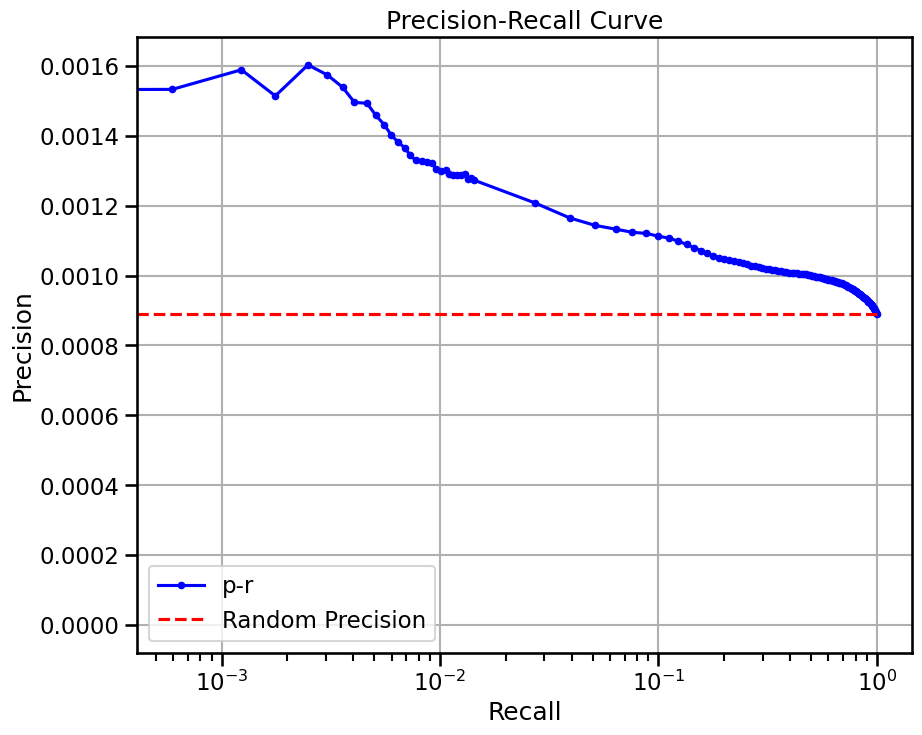


  0%|          | 0/17 [00:00<?, ?it/s]


  6%|▌         | 1/17 [00:02<00:39,  2.50s/it]


 12%|█▏        | 2/17 [00:03<00:27,  1.85s/it]


 18%|█▊        | 3/17 [00:05<00:22,  1.62s/it]


 24%|██▎       | 4/17 [00:06<00:19,  1.52s/it]


 29%|██▉       | 5/17 [00:07<00:17,  1.47s/it]


 35%|███▌      | 6/17 [00:09<00:15,  1.44s/it]


 41%|████      | 7/17 [00:10<00:14,  1.43s/it]


 47%|████▋     | 8/17 [00:12<00:12,  1.42s/it]


 53%|█████▎    | 9/17 [00:13<00:11,  1.41s/it]


 59%|█████▉    | 10/17 [00:14<00:09,  1.40s/it]


 65%|██████▍   | 11/17 [00:16<00:08,  1.40s/it]


 71%|███████   | 12/17 [00:17<00:06,  1.39s/it]


 76%|███████▋  | 13/17 [00:19<00:05,  1.39s/it]


 82%|████████▏ | 14/17 [00:20<00:04,  1.39s/it]


 88%|████████▊ | 15/17 [00:21<00:02,  1.40s/it]


 94%|█████████▍| 16/17 [00:23<00:01,  1.40s/it]


100%|██████████| 17/17 [00:23<00:00,  1.09s/it]


100%|██████████| 17/17 [00:23<00:00,  1.40s/it]

base enrichment


Top central genes: []


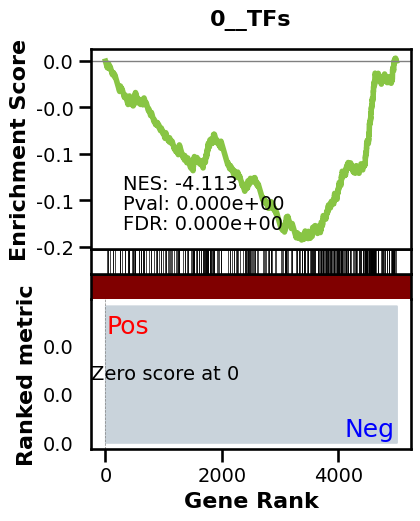

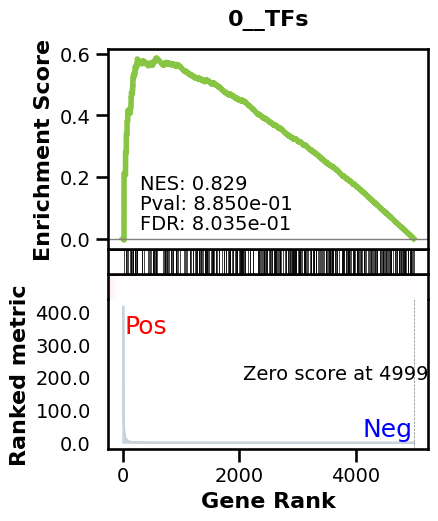

_________________________________________
TF specific enrichment


found some significant results for  11.538461538461538 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 62.03it/s]


 11%|█         | 14/128 [00:00<00:01, 60.62it/s]


 16%|█▋        | 21/128 [00:00<00:01, 60.95it/s]


 22%|██▏       | 28/128 [00:00<00:01, 61.23it/s]


 27%|██▋       | 35/128 [00:00<00:01, 61.65it/s]


 33%|███▎      | 42/128 [00:00<00:01, 61.36it/s]


 38%|███▊      | 49/128 [00:00<00:01, 61.31it/s]


 44%|████▍     | 56/128 [00:00<00:01, 61.37it/s]


 49%|████▉     | 63/128 [00:01<00:01, 61.52it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 61.57it/s]


 60%|██████    | 77/128 [00:01<00:00, 61.62it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 61.62it/s]


 71%|███████   | 91/128 [00:01<00:00, 61.80it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 61.67it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 61.58it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 61.65it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 61.80it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 61.77it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 61.52it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008834425703391215
EPR: 1.7214852038512451


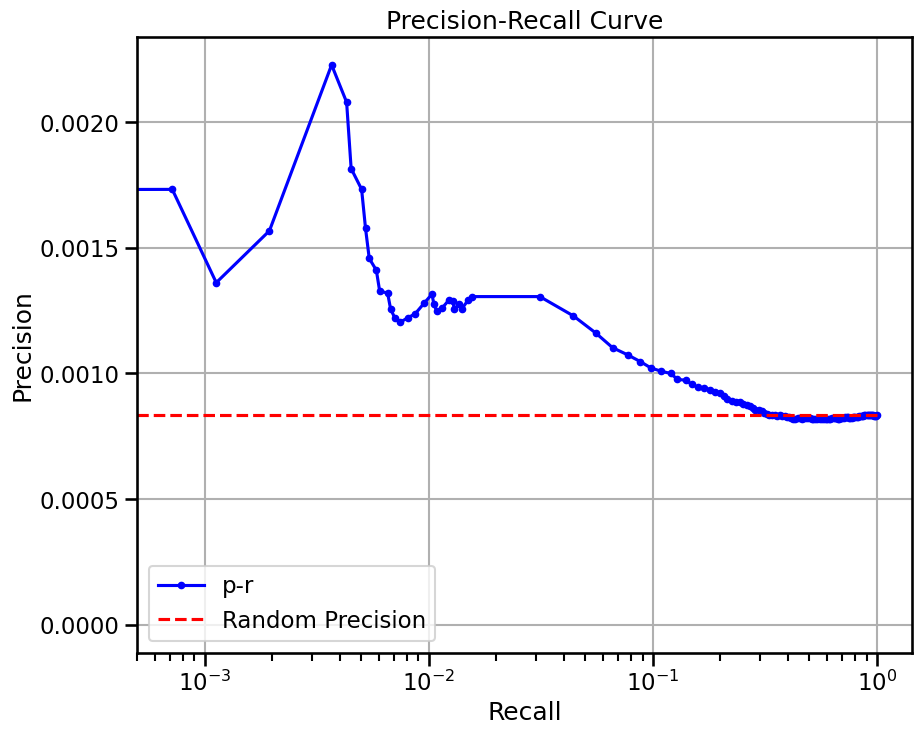

base enrichment


Top central genes: []


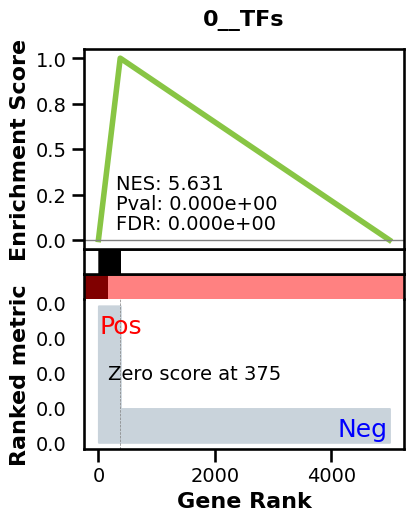

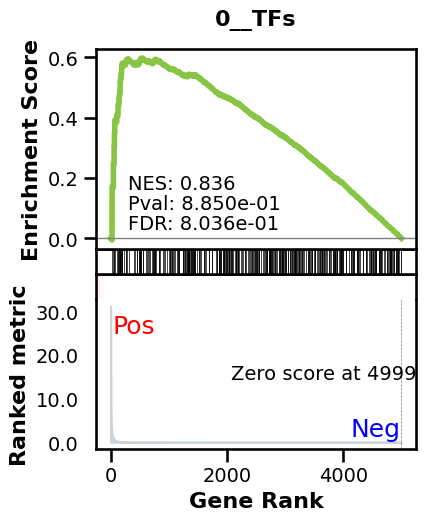

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.004295594991542786 
recall:  0.4727626459143969 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 61.31it/s]


 11%|█         | 14/128 [00:00<00:01, 61.06it/s]


 16%|█▋        | 21/128 [00:00<00:01, 60.88it/s]


 22%|██▏       | 28/128 [00:00<00:01, 60.90it/s]


 27%|██▋       | 35/128 [00:00<00:01, 60.98it/s]


 33%|███▎      | 42/128 [00:00<00:01, 61.02it/s]


 38%|███▊      | 49/128 [00:00<00:01, 60.92it/s]


 44%|████▍     | 56/128 [00:00<00:01, 60.95it/s]


 49%|████▉     | 63/128 [00:01<00:01, 60.92it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 60.88it/s]


 60%|██████    | 77/128 [00:01<00:00, 61.07it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 61.11it/s]


 71%|███████   | 91/128 [00:01<00:00, 61.07it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 60.83it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 61.07it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 61.15it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 61.08it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 61.08it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 60.95it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0026348180475252335
EPR: 10.351980256843584


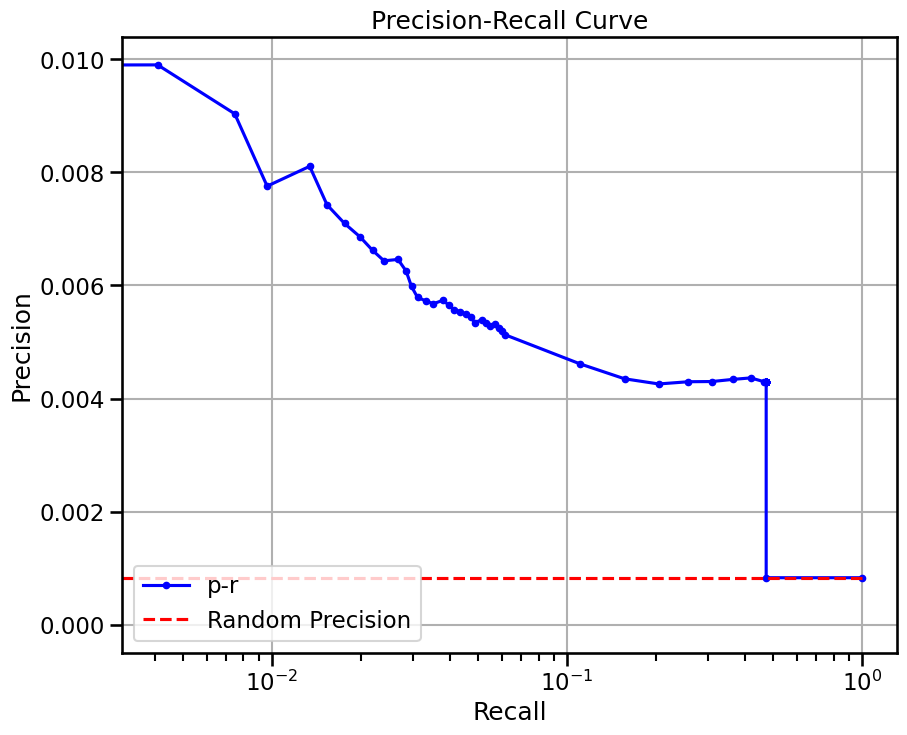

base enrichment


Top central genes: []


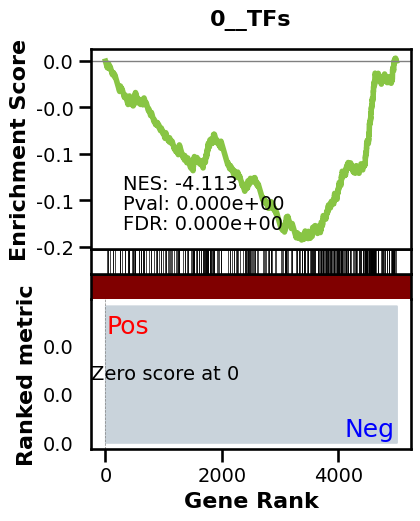

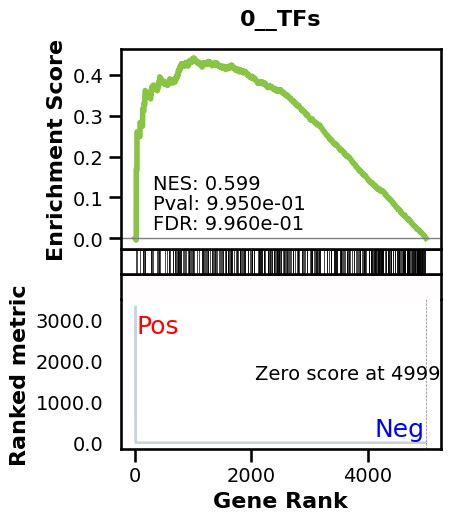

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.71it/s]


  9%|▉         | 12/128 [00:00<00:01, 59.61it/s]


 14%|█▍        | 18/128 [00:00<00:01, 59.65it/s]


 19%|█▉        | 24/128 [00:00<00:01, 59.39it/s]


 23%|██▎       | 30/128 [00:00<00:01, 59.46it/s]


 28%|██▊       | 36/128 [00:00<00:01, 59.47it/s]


 33%|███▎      | 42/128 [00:00<00:01, 57.50it/s]


 38%|███▊      | 48/128 [00:00<00:01, 58.12it/s]


 42%|████▏     | 54/128 [00:00<00:01, 58.58it/s]


 47%|████▋     | 60/128 [00:01<00:01, 58.96it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 59.06it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 58.25it/s]


 61%|██████    | 78/128 [00:01<00:00, 58.69it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 58.84it/s]


 70%|███████   | 90/128 [00:01<00:00, 59.17it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 59.36it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 59.35it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 59.21it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 59.43it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 59.52it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 59.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 59.04it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009588631126320158
EPR: 5.319019774843278


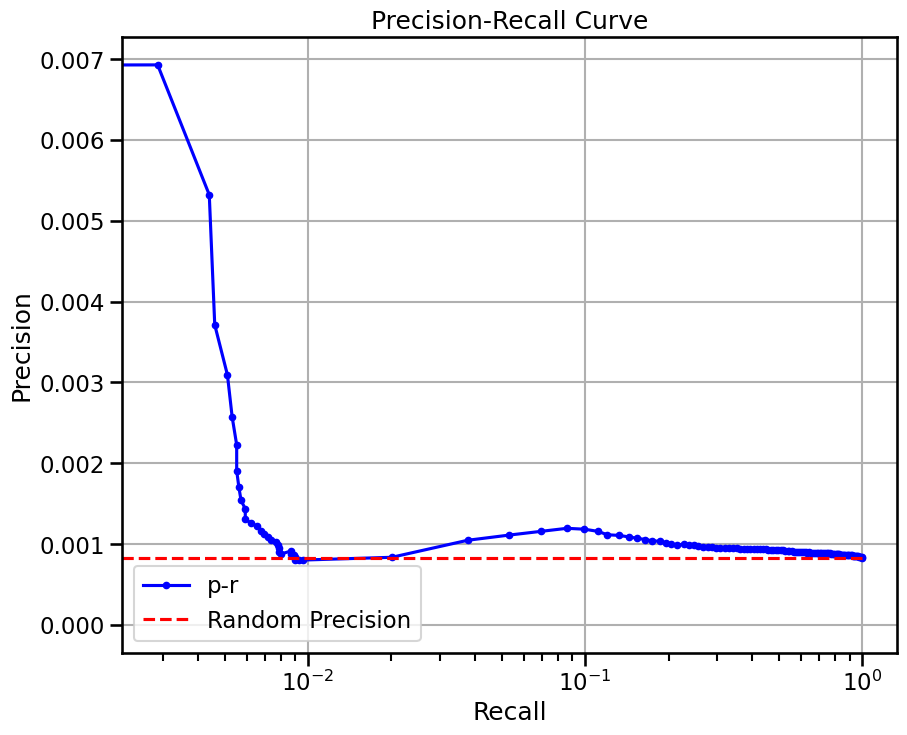

base enrichment


Top central genes: []


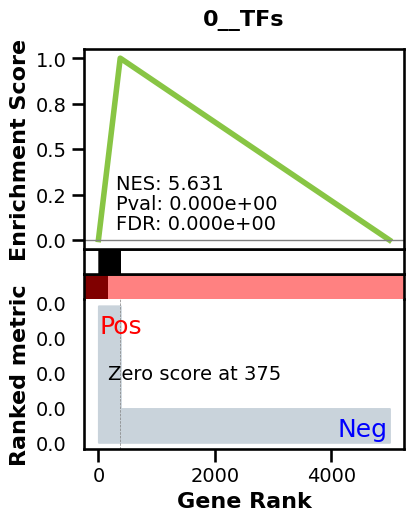

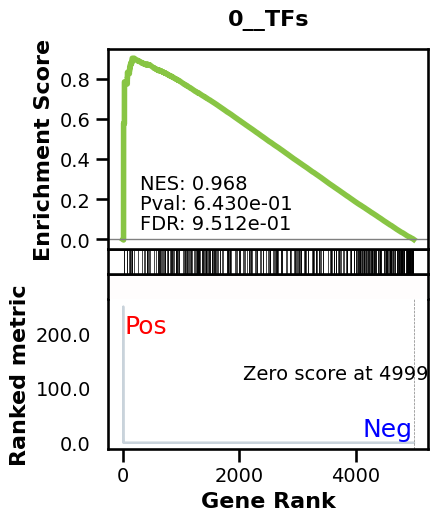

_________________________________________
TF specific enrichment


found some significant results for  3.8461538461538463 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.004295594991542786 
recall:  0.4727626459143969 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.67it/s]


 10%|█         | 13/128 [00:00<00:01, 60.26it/s]


 16%|█▌        | 20/128 [00:00<00:01, 59.91it/s]


 20%|██        | 26/128 [00:00<00:01, 59.90it/s]


 26%|██▌       | 33/128 [00:00<00:01, 59.97it/s]


 30%|███       | 39/128 [00:00<00:01, 59.94it/s]


 36%|███▌      | 46/128 [00:00<00:01, 60.00it/s]


 41%|████▏     | 53/128 [00:00<00:01, 60.08it/s]


 47%|████▋     | 60/128 [00:00<00:01, 60.12it/s]


 52%|█████▏    | 67/128 [00:01<00:01, 60.13it/s]


 58%|█████▊    | 74/128 [00:01<00:00, 60.17it/s]


 63%|██████▎   | 81/128 [00:01<00:00, 59.95it/s]


 68%|██████▊   | 87/128 [00:01<00:00, 59.95it/s]


 73%|███████▎  | 94/128 [00:01<00:00, 60.10it/s]


 79%|███████▉  | 101/128 [00:01<00:00, 59.86it/s]


 84%|████████▎ | 107/128 [00:01<00:00, 59.83it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 59.97it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 59.90it/s]


 99%|█████████▉| 127/128 [00:02<00:00, 60.10it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 59.96it/s]

Area Under Precision-Recall Curve (AUPRC):  0.003497649942138272
EPR: 18.57911694960466


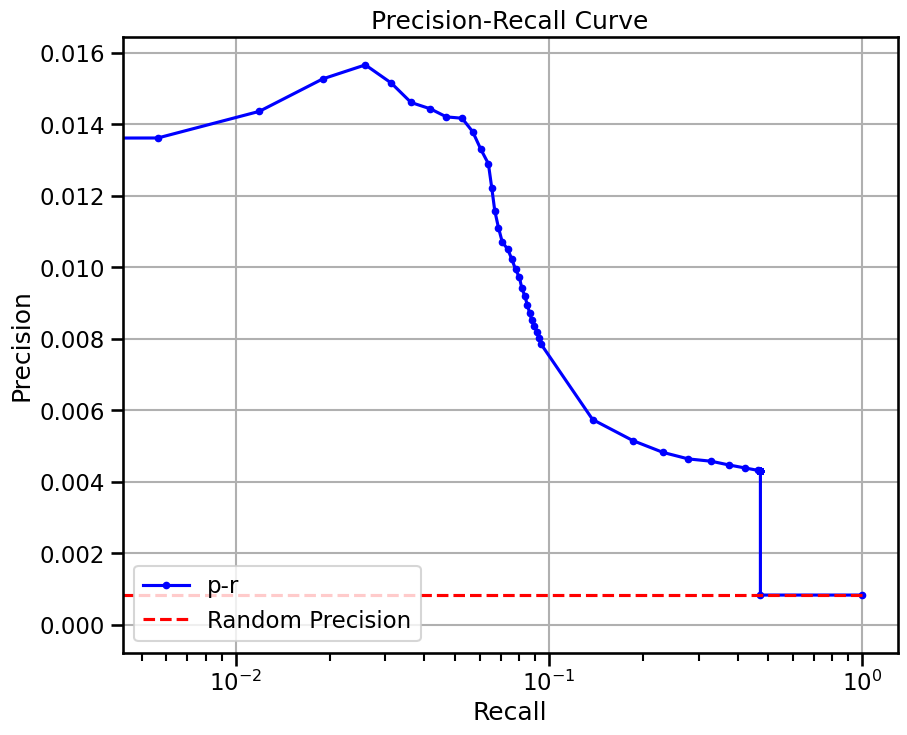


  0%|          | 0/11 [00:00<?, ?it/s]


  9%|▉         | 1/11 [00:02<00:21,  2.11s/it]


 18%|█▊        | 2/11 [00:03<00:12,  1.41s/it]


 27%|██▋       | 3/11 [00:04<00:09,  1.25s/it]


 36%|███▋      | 4/11 [00:05<00:08,  1.15s/it]


 45%|████▌     | 5/11 [00:06<00:06,  1.08s/it]


 55%|█████▍    | 6/11 [00:06<00:05,  1.03s/it]


 64%|██████▎   | 7/11 [00:07<00:04,  1.00s/it]


 73%|███████▎  | 8/11 [00:08<00:02,  1.02it/s]


 82%|████████▏ | 9/11 [00:09<00:01,  1.03it/s]


 91%|█████████ | 10/11 [00:10<00:00,  1.05it/s]


100%|██████████| 11/11 [00:11<00:00,  1.10it/s]


100%|██████████| 11/11 [00:11<00:00,  1.07s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


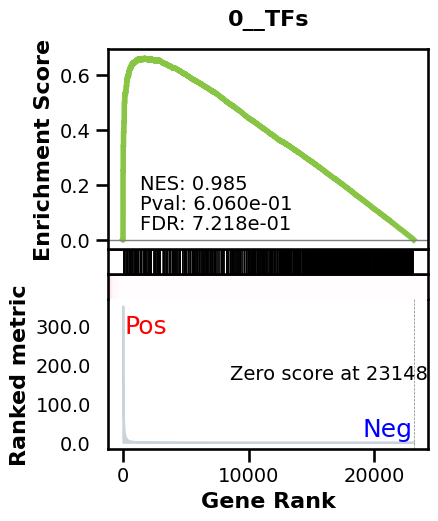

_________________________________________
TF specific enrichment


found some significant results for  66.96428571428571 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:34,  3.71it/s]


  2%|▏         | 2/128 [00:00<00:31,  3.94it/s]


  2%|▏         | 3/128 [00:00<00:31,  4.02it/s]


  3%|▎         | 4/128 [00:01<00:30,  4.04it/s]


  4%|▍         | 5/128 [00:01<00:30,  4.07it/s]


  5%|▍         | 6/128 [00:01<00:29,  4.11it/s]


  5%|▌         | 7/128 [00:01<00:29,  4.11it/s]


  6%|▋         | 8/128 [00:01<00:29,  4.11it/s]


  7%|▋         | 9/128 [00:02<00:28,  4.12it/s]


  8%|▊         | 10/128 [00:02<00:28,  4.13it/s]


  9%|▊         | 11/128 [00:02<00:28,  4.14it/s]


  9%|▉         | 12/128 [00:02<00:28,  4.14it/s]


 10%|█         | 13/128 [00:03<00:27,  4.14it/s]


 11%|█         | 14/128 [00:03<00:27,  4.15it/s]


 12%|█▏        | 15/128 [00:03<00:27,  4.15it/s]


 12%|█▎        | 16/128 [00:03<00:26,  4.15it/s]


 13%|█▎        | 17/128 [00:04<00:26,  4.15it/s]


 14%|█▍        | 18/128 [00:04<00:26,  4.14it/s]


 15%|█▍        | 19/128 [00:04<00:26,  4.14it/s]


 16%|█▌        | 20/128 [00:04<00:26,  4.13it/s]


 16%|█▋        | 21/128 [00:05<00:25,  4.14it/s]


 17%|█▋        | 22/128 [00:05<00:25,  4.12it/s]


 18%|█▊        | 23/128 [00:05<00:25,  4.10it/s]


 19%|█▉        | 24/128 [00:05<00:25,  4.09it/s]


 20%|█▉        | 25/128 [00:06<00:25,  4.10it/s]


 20%|██        | 26/128 [00:06<00:24,  4.11it/s]


 21%|██        | 27/128 [00:06<00:24,  4.12it/s]


 22%|██▏       | 28/128 [00:06<00:24,  4.12it/s]


 23%|██▎       | 29/128 [00:07<00:24,  4.12it/s]


 23%|██▎       | 30/128 [00:07<00:23,  4.12it/s]


 24%|██▍       | 31/128 [00:07<00:23,  4.12it/s]


 25%|██▌       | 32/128 [00:07<00:23,  4.13it/s]


 26%|██▌       | 33/128 [00:08<00:23,  4.12it/s]


 27%|██▋       | 34/128 [00:08<00:22,  4.11it/s]


 27%|██▋       | 35/128 [00:08<00:22,  4.10it/s]


 28%|██▊       | 36/128 [00:08<00:22,  4.09it/s]


 29%|██▉       | 37/128 [00:09<00:22,  4.10it/s]


 30%|██▉       | 38/128 [00:09<00:21,  4.10it/s]


 30%|███       | 39/128 [00:09<00:21,  4.11it/s]


 31%|███▏      | 40/128 [00:09<00:21,  4.12it/s]


 32%|███▏      | 41/128 [00:09<00:21,  4.13it/s]


 33%|███▎      | 42/128 [00:10<00:20,  4.11it/s]


 34%|███▎      | 43/128 [00:10<00:20,  4.12it/s]


 34%|███▍      | 44/128 [00:10<00:20,  4.12it/s]


 35%|███▌      | 45/128 [00:10<00:20,  4.12it/s]


 36%|███▌      | 46/128 [00:11<00:19,  4.12it/s]


 37%|███▋      | 47/128 [00:11<00:19,  4.12it/s]


 38%|███▊      | 48/128 [00:11<00:19,  4.13it/s]


 38%|███▊      | 49/128 [00:11<00:19,  4.13it/s]


 39%|███▉      | 50/128 [00:12<00:18,  4.14it/s]


 40%|███▉      | 51/128 [00:12<00:18,  4.13it/s]


 41%|████      | 52/128 [00:12<00:18,  4.13it/s]


 41%|████▏     | 53/128 [00:12<00:18,  4.14it/s]


 42%|████▏     | 54/128 [00:13<00:18,  4.03it/s]


 43%|████▎     | 55/128 [00:13<00:18,  4.03it/s]


 44%|████▍     | 56/128 [00:13<00:17,  4.07it/s]


 45%|████▍     | 57/128 [00:13<00:17,  4.10it/s]


 45%|████▌     | 58/128 [00:14<00:17,  4.10it/s]


 46%|████▌     | 59/128 [00:14<00:16,  4.11it/s]


 47%|████▋     | 60/128 [00:14<00:16,  4.11it/s]


 48%|████▊     | 61/128 [00:14<00:16,  4.11it/s]


 48%|████▊     | 62/128 [00:15<00:16,  4.10it/s]


 49%|████▉     | 63/128 [00:15<00:15,  4.11it/s]


 50%|█████     | 64/128 [00:15<00:15,  4.11it/s]


 51%|█████     | 65/128 [00:15<00:15,  4.12it/s]


 52%|█████▏    | 66/128 [00:16<00:14,  4.14it/s]


 52%|█████▏    | 67/128 [00:16<00:14,  4.14it/s]


 53%|█████▎    | 68/128 [00:16<00:14,  4.12it/s]


 54%|█████▍    | 69/128 [00:16<00:14,  4.12it/s]


 55%|█████▍    | 70/128 [00:17<00:14,  4.11it/s]


 55%|█████▌    | 71/128 [00:17<00:13,  4.12it/s]


 56%|█████▋    | 72/128 [00:17<00:13,  4.13it/s]


 57%|█████▋    | 73/128 [00:17<00:13,  4.12it/s]


 58%|█████▊    | 74/128 [00:17<00:13,  4.12it/s]


 59%|█████▊    | 75/128 [00:18<00:12,  4.10it/s]


 59%|█████▉    | 76/128 [00:18<00:12,  4.12it/s]


 60%|██████    | 77/128 [00:18<00:12,  4.12it/s]


 61%|██████    | 78/128 [00:18<00:12,  4.13it/s]


 62%|██████▏   | 79/128 [00:19<00:11,  4.14it/s]


 62%|██████▎   | 80/128 [00:19<00:11,  4.14it/s]


 63%|██████▎   | 81/128 [00:19<00:11,  4.14it/s]


 64%|██████▍   | 82/128 [00:19<00:11,  4.14it/s]


 65%|██████▍   | 83/128 [00:20<00:10,  4.14it/s]


 66%|██████▌   | 84/128 [00:20<00:10,  4.13it/s]


 66%|██████▋   | 85/128 [00:20<00:10,  4.12it/s]


 67%|██████▋   | 86/128 [00:20<00:10,  4.13it/s]


 68%|██████▊   | 87/128 [00:21<00:09,  4.13it/s]


 69%|██████▉   | 88/128 [00:21<00:09,  4.13it/s]


 70%|██████▉   | 89/128 [00:21<00:09,  4.13it/s]


 70%|███████   | 90/128 [00:21<00:09,  4.14it/s]


 71%|███████   | 91/128 [00:22<00:08,  4.11it/s]


 72%|███████▏  | 92/128 [00:22<00:08,  4.13it/s]


 73%|███████▎  | 93/128 [00:22<00:08,  4.12it/s]


 73%|███████▎  | 94/128 [00:22<00:08,  4.14it/s]


 74%|███████▍  | 95/128 [00:23<00:07,  4.15it/s]


 75%|███████▌  | 96/128 [00:23<00:07,  4.14it/s]


 76%|███████▌  | 97/128 [00:23<00:07,  4.15it/s]


 77%|███████▋  | 98/128 [00:23<00:07,  4.14it/s]


 77%|███████▋  | 99/128 [00:24<00:06,  4.15it/s]


 78%|███████▊  | 100/128 [00:24<00:06,  4.16it/s]


 79%|███████▉  | 101/128 [00:24<00:06,  4.16it/s]


 80%|███████▉  | 102/128 [00:24<00:06,  4.16it/s]


 80%|████████  | 103/128 [00:25<00:06,  4.15it/s]


 81%|████████▏ | 104/128 [00:25<00:05,  4.15it/s]


 82%|████████▏ | 105/128 [00:25<00:05,  4.15it/s]


 83%|████████▎ | 106/128 [00:25<00:05,  4.16it/s]


 84%|████████▎ | 107/128 [00:25<00:05,  4.16it/s]


 84%|████████▍ | 108/128 [00:26<00:04,  4.17it/s]


 85%|████████▌ | 109/128 [00:26<00:04,  4.17it/s]


 86%|████████▌ | 110/128 [00:26<00:04,  4.16it/s]


 87%|████████▋ | 111/128 [00:26<00:04,  4.14it/s]


 88%|████████▊ | 112/128 [00:27<00:03,  4.13it/s]


 88%|████████▊ | 113/128 [00:27<00:03,  4.13it/s]


 89%|████████▉ | 114/128 [00:27<00:03,  4.13it/s]


 90%|████████▉ | 115/128 [00:27<00:03,  4.14it/s]


 91%|█████████ | 116/128 [00:28<00:02,  4.13it/s]


 91%|█████████▏| 117/128 [00:28<00:02,  4.11it/s]


 92%|█████████▏| 118/128 [00:28<00:02,  4.10it/s]


 93%|█████████▎| 119/128 [00:28<00:02,  4.08it/s]


 94%|█████████▍| 120/128 [00:29<00:01,  4.09it/s]


 95%|█████████▍| 121/128 [00:29<00:01,  4.10it/s]


 95%|█████████▌| 122/128 [00:29<00:01,  3.96it/s]


 96%|█████████▌| 123/128 [00:29<00:01,  4.02it/s]


 97%|█████████▋| 124/128 [00:30<00:00,  4.07it/s]


 98%|█████████▊| 125/128 [00:30<00:00,  4.08it/s]


 98%|█████████▊| 126/128 [00:30<00:00,  4.08it/s]


 99%|█████████▉| 127/128 [00:30<00:00,  4.07it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:31<00:00,  4.10it/s]


100%|██████████| 128/128 [00:31<00:00,  4.12it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010264660372258537


EPR: 1.8352008526185457


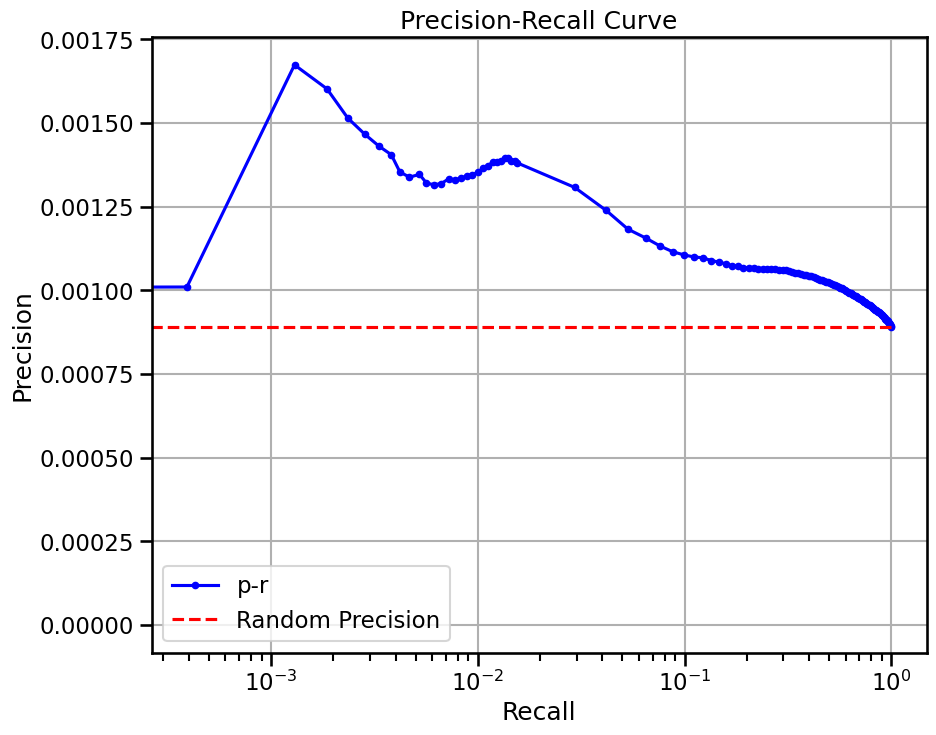


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:02<00:52,  2.52s/it]


  9%|▉         | 2/22 [00:03<00:36,  1.81s/it]


 14%|█▎        | 3/22 [00:05<00:29,  1.57s/it]


 18%|█▊        | 4/22 [00:06<00:26,  1.46s/it]


 23%|██▎       | 5/22 [00:07<00:25,  1.49s/it]


 27%|██▋       | 6/22 [00:09<00:22,  1.41s/it]


 32%|███▏      | 7/22 [00:10<00:20,  1.35s/it]


 36%|███▋      | 8/22 [00:11<00:17,  1.27s/it]


 41%|████      | 9/22 [00:12<00:15,  1.22s/it]


 45%|████▌     | 10/22 [00:13<00:14,  1.20s/it]


 50%|█████     | 11/22 [00:14<00:12,  1.18s/it]


 55%|█████▍    | 12/22 [00:16<00:11,  1.16s/it]


 59%|█████▉    | 13/22 [00:17<00:10,  1.14s/it]


 64%|██████▎   | 14/22 [00:18<00:09,  1.14s/it]


 68%|██████▊   | 15/22 [00:19<00:07,  1.13s/it]


 73%|███████▎  | 16/22 [00:20<00:06,  1.12s/it]


 77%|███████▋  | 17/22 [00:21<00:05,  1.11s/it]


 82%|████████▏ | 18/22 [00:22<00:04,  1.10s/it]


 86%|████████▋ | 19/22 [00:23<00:03,  1.12s/it]


 91%|█████████ | 20/22 [00:24<00:02,  1.12s/it]


 95%|█████████▌| 21/22 [00:26<00:01,  1.11s/it]


100%|██████████| 22/22 [00:26<00:00,  1.01s/it]


100%|██████████| 22/22 [00:27<00:00,  1.23s/it]

base enrichment


Top central genes: []


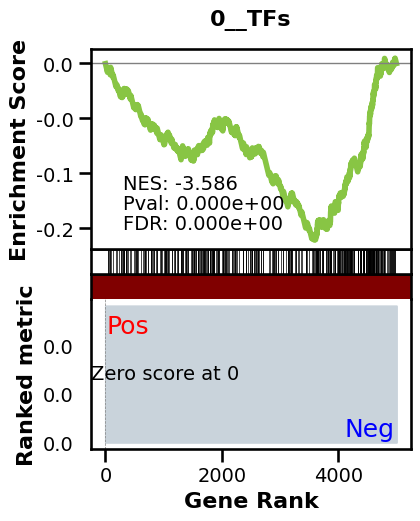

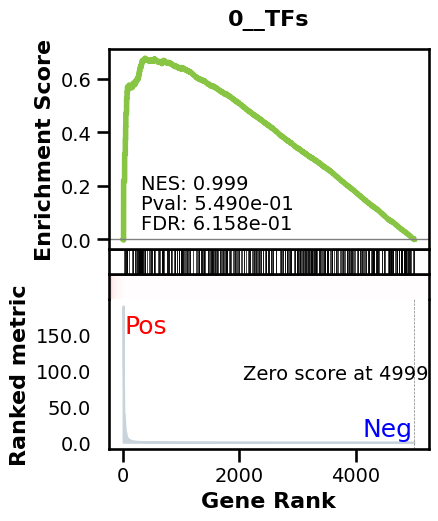

_________________________________________
TF specific enrichment


found some significant results for  15.625 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.83it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.81it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.34it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.60it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.81it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.85it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.98it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.07it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.96it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.06it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.16it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.06it/s]


 61%|██████    | 78/128 [00:01<00:00, 56.19it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.14it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.03it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.13it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.20it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.14it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.19it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.24it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.22it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.01it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0013994279508707103


EPR: 0.7134623715815356


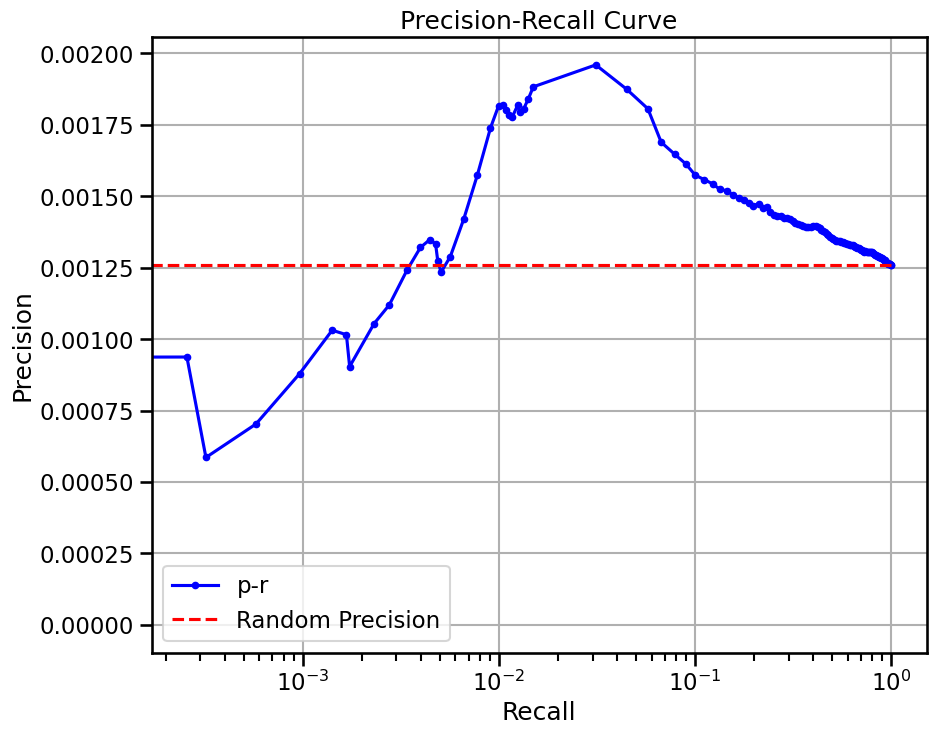

base enrichment


Top central genes: []


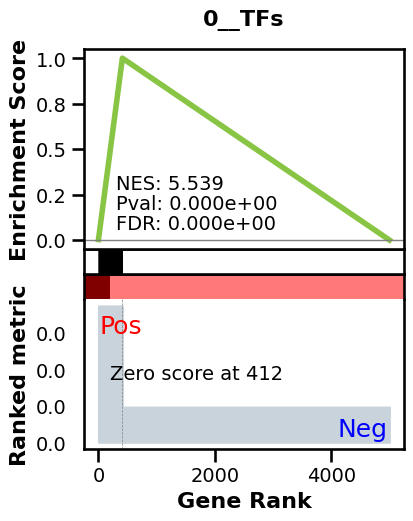

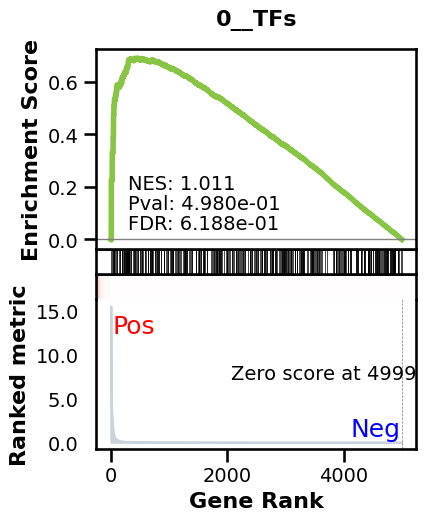

_________________________________________
TF specific enrichment


found some significant results for  9.375 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.005945748396004223 
recall:  0.4700179763739086 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.06it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.92it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.88it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.72it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.78it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.86it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.77it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.86it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.91it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.83it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.91it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.88it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.81it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.89it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.93it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.83it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.75it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.78it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.88it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.95it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.60it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004011650195614572
EPR: 7.304393703429819


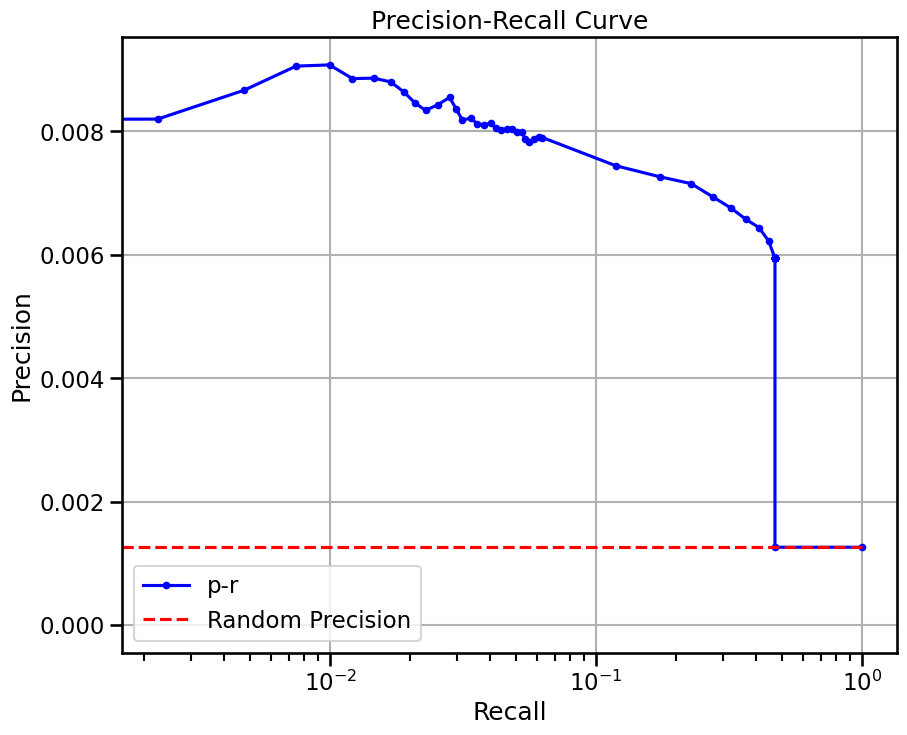

base enrichment


Top central genes: []


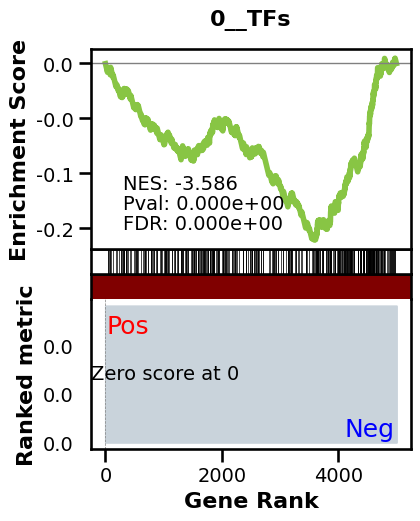

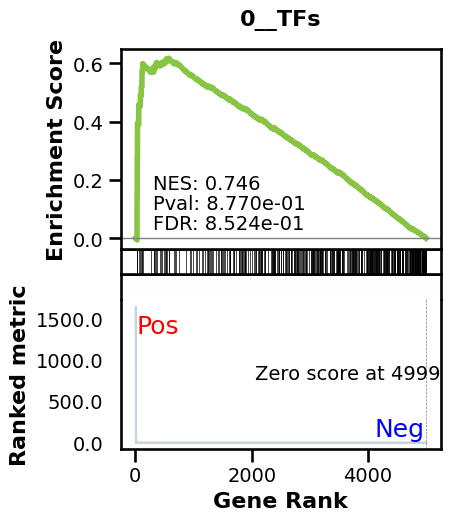

_________________________________________
TF specific enrichment


found some significant results for  6.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.30it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.48it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.19it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.37it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.99it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.49it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.82it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.97it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.46it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.34it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.54it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.83it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.98it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.54it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.48it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.54it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.78it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.33it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.53it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.78it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.73it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.60it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018894344532951646
EPR: 1.7371594010847209


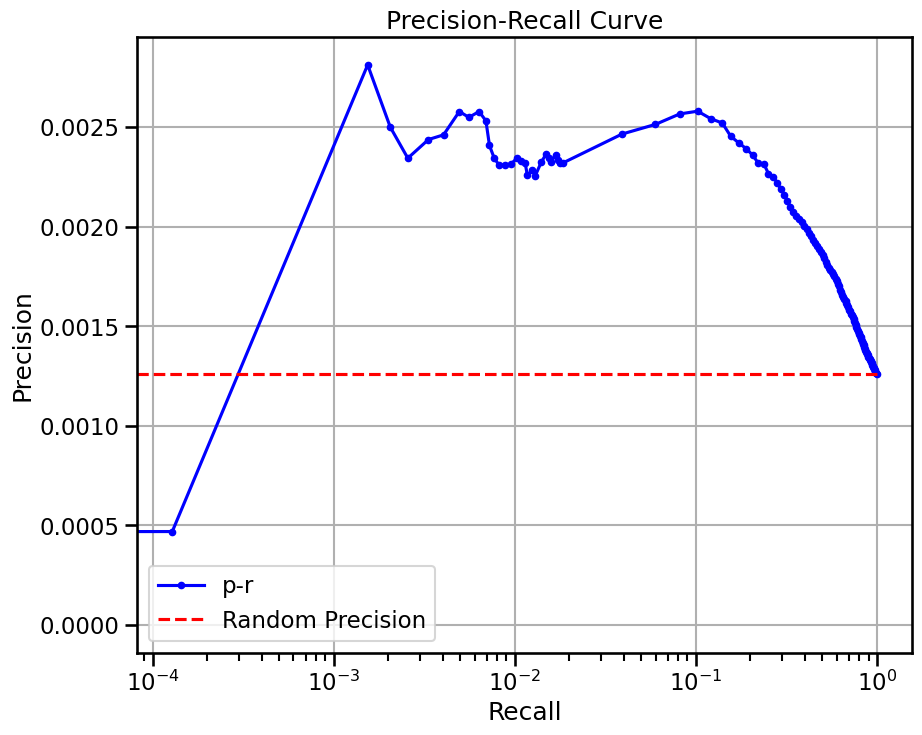

base enrichment


Top central genes: []


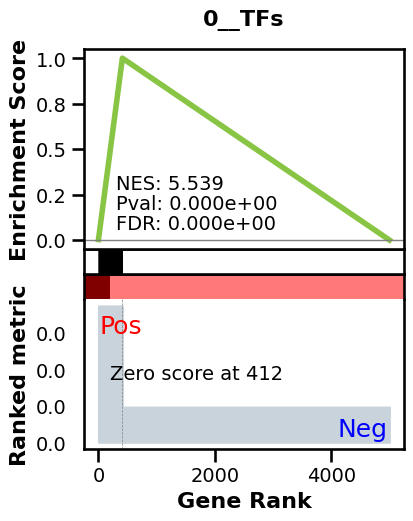

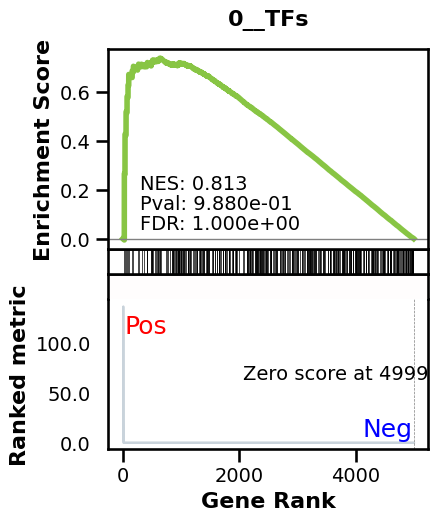

_________________________________________
TF specific enrichment


found some significant results for  4.6875 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.005945748396004223 
recall:  0.4700179763739086 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.99it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.04it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.97it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.66it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.52it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.69it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.73it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.90it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.96it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.98it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.97it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.01it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.90it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.86it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.85it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.66it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.86it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.89it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.92it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.93it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.66it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.78it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005570685819748773
EPR: 12.3237295387727


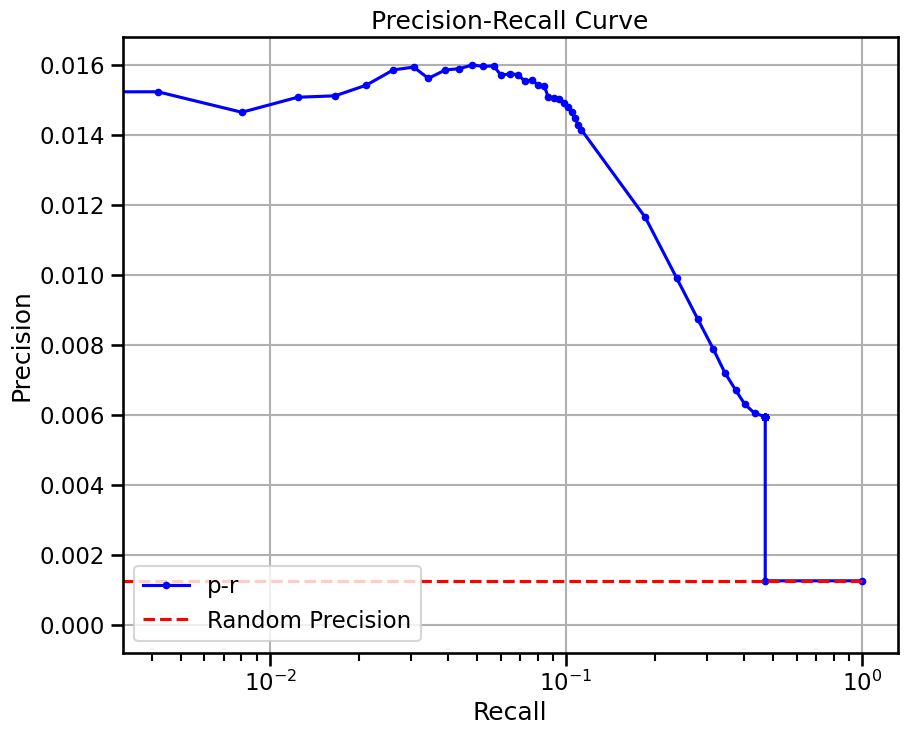


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

avg link count: 99940009, sparsity: 1.0


base enrichment


Top central genes: []


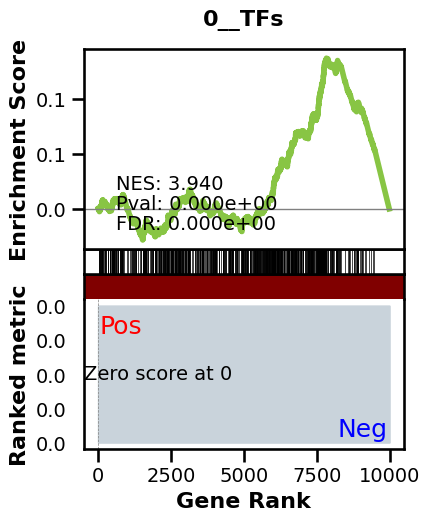

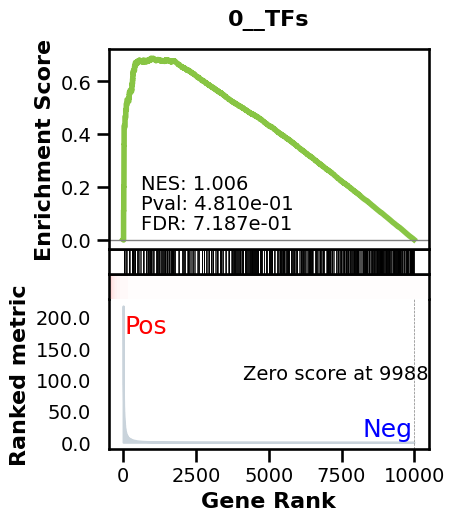

_________________________________________
TF specific enrichment


found some significant results for  36.0655737704918 % TFs

_________________________________________
loading GT,  omnipath


intersection of 5837 genes
intersection pct: 0.5843427770547602
precision:  0.0010819895611370624 
recall:  1.0 
random precision: 0.001082174960307922



  0%|          | 0/128 [00:00<?, ?it/s]


  2%|▏         | 2/128 [00:00<00:06, 18.84it/s]


  3%|▎         | 4/128 [00:00<00:06, 19.20it/s]


  5%|▍         | 6/128 [00:00<00:06, 19.32it/s]


  6%|▋         | 8/128 [00:00<00:06, 19.21it/s]


  8%|▊         | 10/128 [00:00<00:06, 19.18it/s]


  9%|▉         | 12/128 [00:00<00:06, 19.19it/s]


 11%|█         | 14/128 [00:00<00:05, 19.20it/s]


 12%|█▎        | 16/128 [00:00<00:05, 19.22it/s]


 14%|█▍        | 18/128 [00:00<00:05, 19.35it/s]


 16%|█▌        | 20/128 [00:01<00:05, 19.44it/s]


 17%|█▋        | 22/128 [00:01<00:05, 19.46it/s]


 19%|█▉        | 24/128 [00:01<00:05, 19.48it/s]


 20%|██        | 26/128 [00:01<00:05, 19.52it/s]


 22%|██▏       | 28/128 [00:01<00:05, 19.55it/s]


 23%|██▎       | 30/128 [00:01<00:05, 19.56it/s]


 25%|██▌       | 32/128 [00:01<00:04, 19.45it/s]


 27%|██▋       | 34/128 [00:01<00:04, 19.40it/s]


 28%|██▊       | 36/128 [00:01<00:04, 19.40it/s]


 30%|██▉       | 38/128 [00:01<00:04, 18.95it/s]


 31%|███▏      | 40/128 [00:02<00:04, 19.11it/s]


 33%|███▎      | 42/128 [00:02<00:04, 19.29it/s]


 34%|███▍      | 44/128 [00:02<00:04, 19.37it/s]


 36%|███▌      | 46/128 [00:02<00:04, 19.41it/s]


 38%|███▊      | 48/128 [00:02<00:04, 19.34it/s]


 39%|███▉      | 50/128 [00:02<00:04, 19.10it/s]


 41%|████      | 52/128 [00:02<00:04, 17.73it/s]


 42%|████▏     | 54/128 [00:02<00:04, 18.05it/s]


 44%|████▍     | 56/128 [00:02<00:03, 18.26it/s]


 45%|████▌     | 58/128 [00:03<00:03, 18.44it/s]


 47%|████▋     | 60/128 [00:03<00:03, 18.55it/s]


 48%|████▊     | 62/128 [00:03<00:03, 18.56it/s]


 50%|█████     | 64/128 [00:03<00:03, 18.31it/s]


 52%|█████▏    | 66/128 [00:03<00:03, 18.43it/s]


 53%|█████▎    | 68/128 [00:03<00:03, 18.69it/s]


 55%|█████▍    | 70/128 [00:03<00:03, 18.97it/s]


 56%|█████▋    | 72/128 [00:03<00:02, 19.09it/s]


 58%|█████▊    | 74/128 [00:03<00:02, 19.25it/s]


 59%|█████▉    | 76/128 [00:03<00:02, 19.17it/s]


 61%|██████    | 78/128 [00:04<00:02, 19.16it/s]


 62%|██████▎   | 80/128 [00:04<00:02, 19.07it/s]


 64%|██████▍   | 82/128 [00:04<00:02, 19.09it/s]


 66%|██████▌   | 84/128 [00:04<00:02, 19.20it/s]


 67%|██████▋   | 86/128 [00:04<00:02, 19.29it/s]


 69%|██████▉   | 88/128 [00:04<00:02, 19.39it/s]


 70%|███████   | 90/128 [00:04<00:01, 19.38it/s]


 72%|███████▏  | 92/128 [00:04<00:01, 19.30it/s]


 73%|███████▎  | 94/128 [00:04<00:01, 19.19it/s]


 75%|███████▌  | 96/128 [00:05<00:01, 19.14it/s]


 77%|███████▋  | 98/128 [00:05<00:01, 19.04it/s]


 78%|███████▊  | 100/128 [00:05<00:01, 18.93it/s]


 80%|███████▉  | 102/128 [00:05<00:01, 18.88it/s]


 81%|████████▏ | 104/128 [00:05<00:01, 18.91it/s]


 83%|████████▎ | 106/128 [00:05<00:01, 18.85it/s]


 84%|████████▍ | 108/128 [00:05<00:01, 18.76it/s]


 86%|████████▌ | 110/128 [00:05<00:00, 18.83it/s]


 88%|████████▊ | 112/128 [00:05<00:00, 19.00it/s]


 89%|████████▉ | 114/128 [00:05<00:00, 19.11it/s]


 91%|█████████ | 116/128 [00:06<00:00, 18.94it/s]


 92%|█████████▏| 118/128 [00:06<00:00, 18.92it/s]


 94%|█████████▍| 120/128 [00:06<00:00, 18.98it/s]


 95%|█████████▌| 122/128 [00:06<00:00, 18.97it/s]


 97%|█████████▋| 124/128 [00:06<00:00, 19.01it/s]


 98%|█████████▊| 126/128 [00:06<00:00, 18.97it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:06<00:00, 18.95it/s]


100%|██████████| 128/128 [00:06<00:00, 19.04it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011855164206997625


EPR: 1.0026805053840666


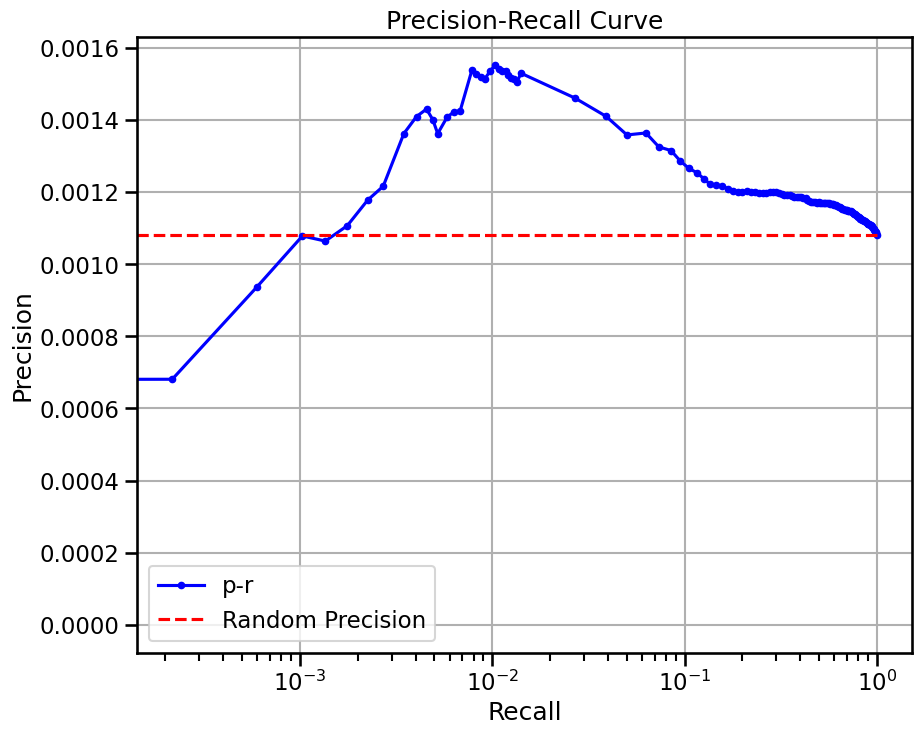


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

base enrichment


Top central genes: []


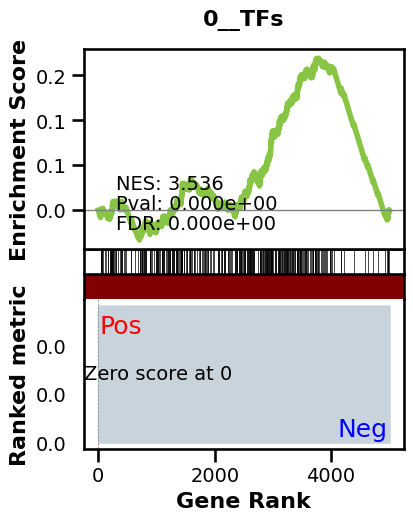

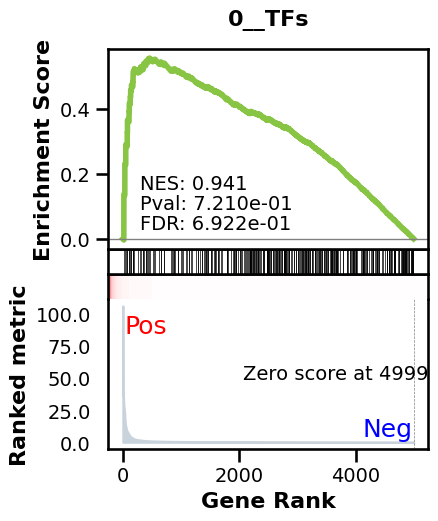

_________________________________________
TF specific enrichment


found some significant results for  34.375 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 90.72it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.42it/s]


 23%|██▎       | 30/128 [00:00<00:01, 90.27it/s]


 31%|███▏      | 40/128 [00:00<00:00, 89.88it/s]


 38%|███▊      | 49/128 [00:00<00:00, 89.87it/s]


 46%|████▌     | 59/128 [00:00<00:00, 90.05it/s]


 54%|█████▍    | 69/128 [00:00<00:00, 90.17it/s]


 62%|██████▏   | 79/128 [00:00<00:00, 90.41it/s]


 70%|██████▉   | 89/128 [00:00<00:00, 90.25it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 90.14it/s]


 85%|████████▌ | 109/128 [00:01<00:00, 89.76it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 89.94it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 89.94it/s]


100%|██████████| 128/128 [00:01<00:00, 90.03it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001294134691136309
EPR: 0.579328785979101


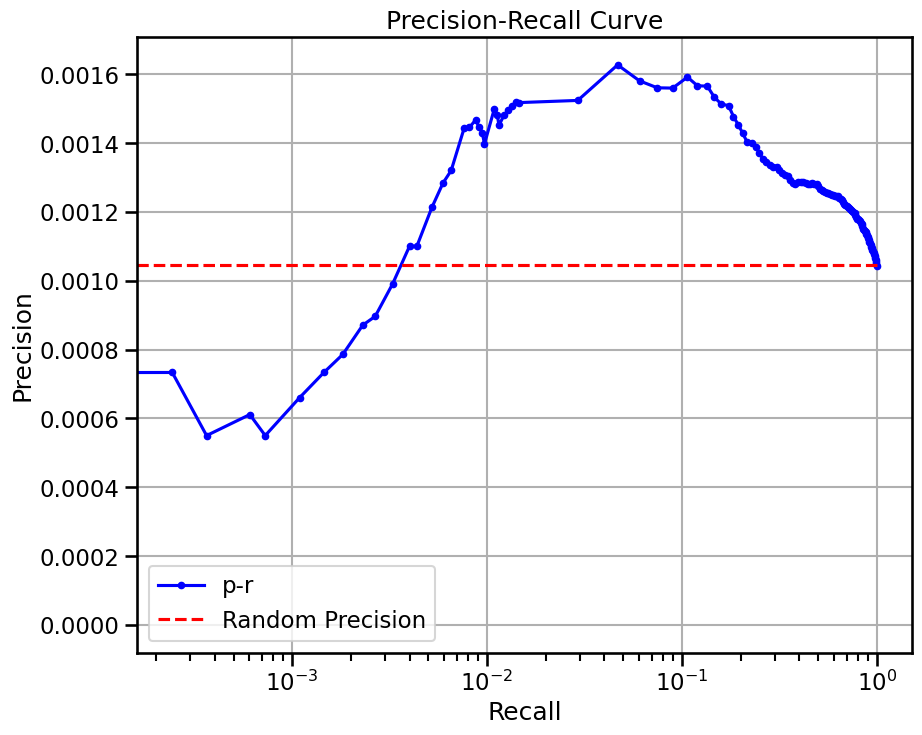

base enrichment


Top central genes: []


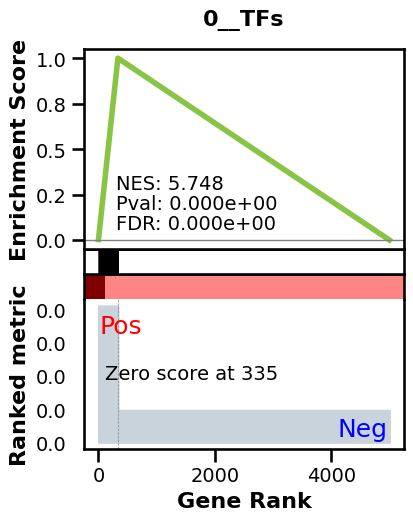

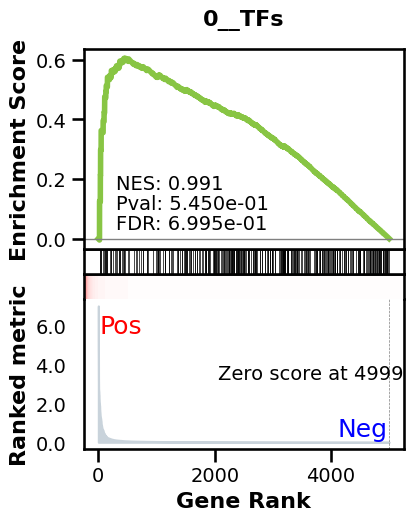

_________________________________________
TF specific enrichment


found some significant results for  6.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.005769883888623644 
recall:  0.5679505813953488 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 90.15it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.30it/s]


 23%|██▎       | 30/128 [00:00<00:01, 90.05it/s]


 31%|███▏      | 40/128 [00:00<00:00, 90.42it/s]


 39%|███▉      | 50/128 [00:00<00:00, 90.72it/s]


 47%|████▋     | 60/128 [00:00<00:00, 90.65it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 90.40it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 90.27it/s]


 70%|███████   | 90/128 [00:00<00:00, 90.50it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 90.46it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 90.19it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 90.28it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 90.33it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005068345665492707
EPR: 10.646251378675727


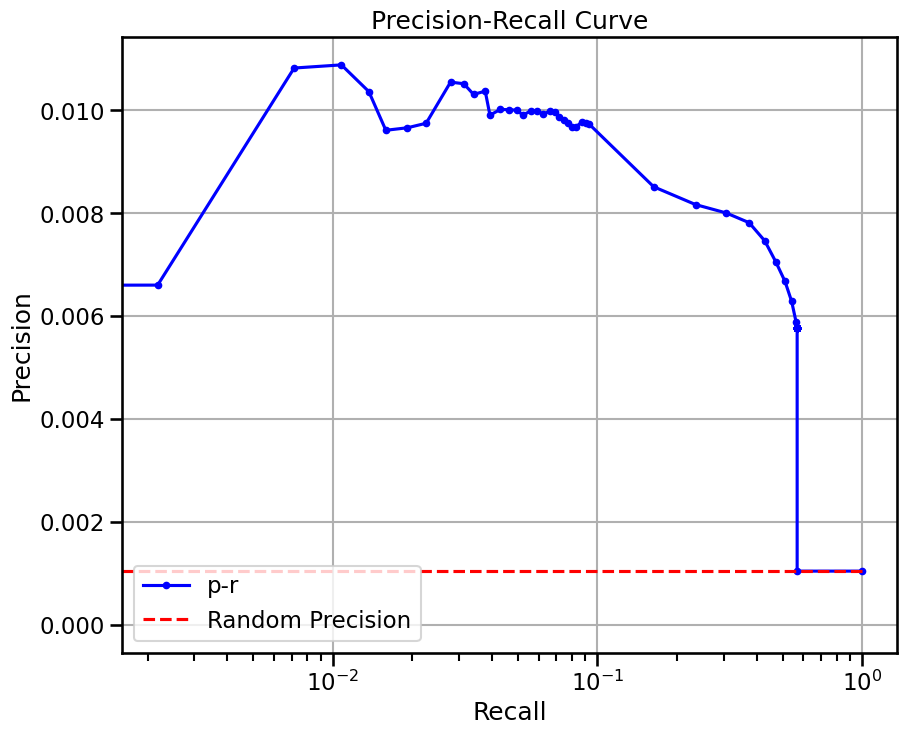

base enrichment


Top central genes: []


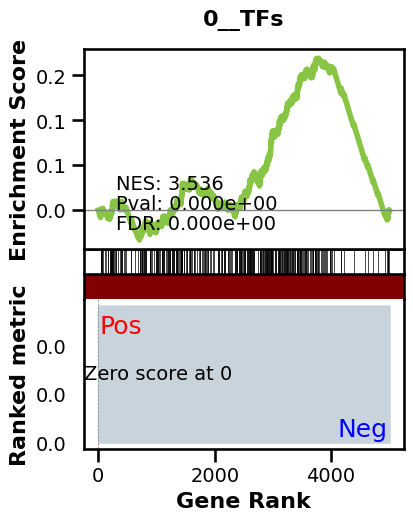

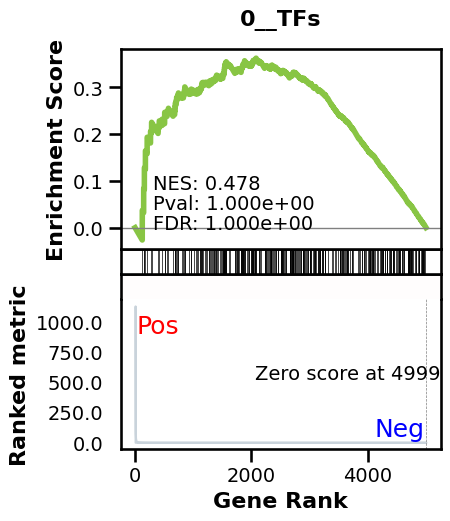

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 91.06it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.72it/s]


 23%|██▎       | 30/128 [00:00<00:01, 90.33it/s]


 31%|███▏      | 40/128 [00:00<00:00, 90.54it/s]


 39%|███▉      | 50/128 [00:00<00:00, 90.57it/s]


 47%|████▋     | 60/128 [00:00<00:00, 90.44it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 90.62it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 90.35it/s]


 70%|███████   | 90/128 [00:00<00:00, 90.27it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 89.79it/s]


 85%|████████▌ | 109/128 [00:01<00:00, 89.34it/s]


 92%|█████████▏| 118/128 [00:01<00:00, 89.44it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 89.65it/s]


100%|██████████| 128/128 [00:01<00:00, 90.02it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001144369960223768
EPR: 2.2089430445794345


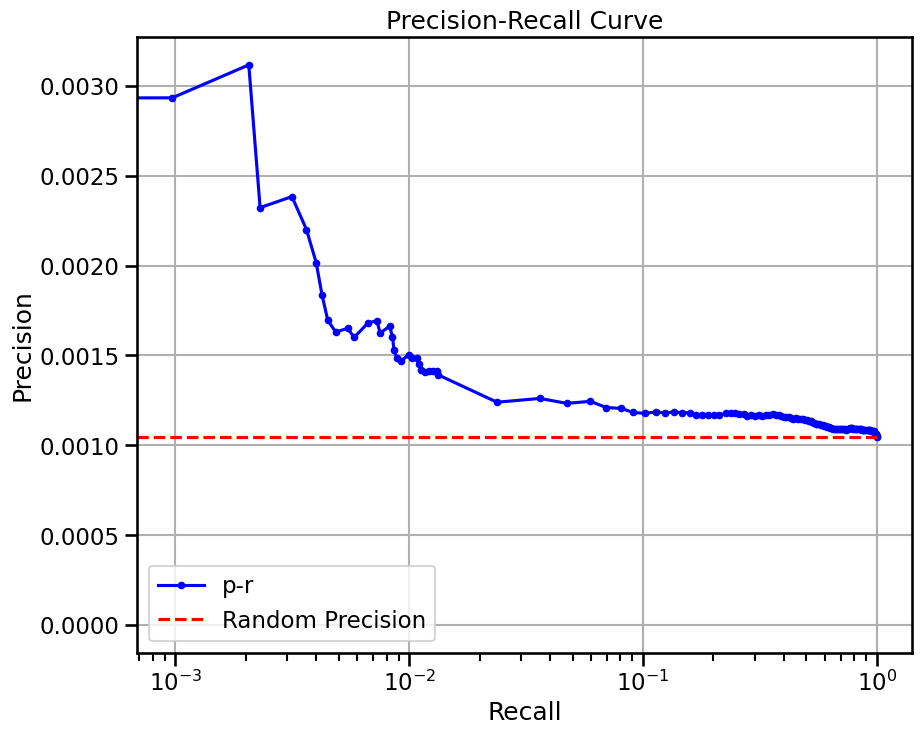

base enrichment


Top central genes: []


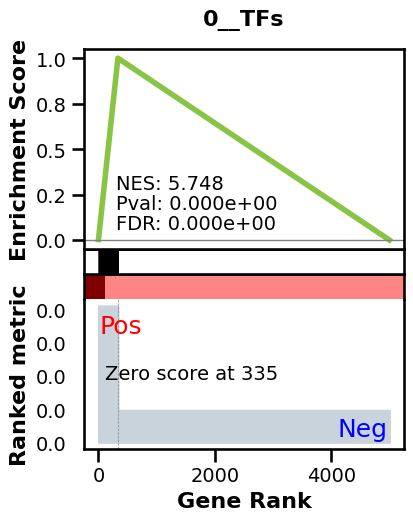

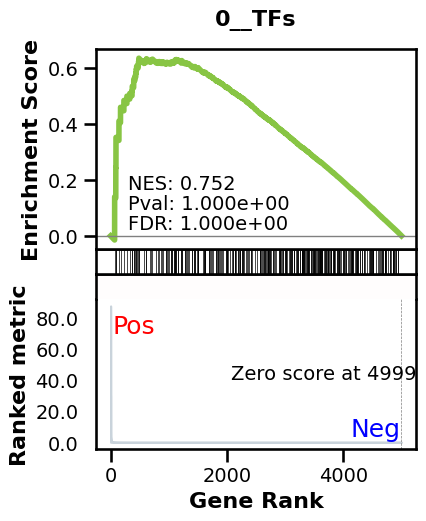

_________________________________________
TF specific enrichment


found some significant results for  3.125 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.005769883888623644 
recall:  0.5679505813953488 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 90.88it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.57it/s]


 23%|██▎       | 30/128 [00:00<00:01, 90.41it/s]


 31%|███▏      | 40/128 [00:00<00:00, 90.75it/s]


 39%|███▉      | 50/128 [00:00<00:00, 90.53it/s]


 47%|████▋     | 60/128 [00:00<00:00, 90.47it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 90.61it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 90.62it/s]


 70%|███████   | 90/128 [00:00<00:00, 90.51it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 90.79it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 90.55it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 90.62it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 90.59it/s]

Area Under Precision-Recall Curve (AUPRC):  0.003852185026080777
EPR: 7.403313006704824


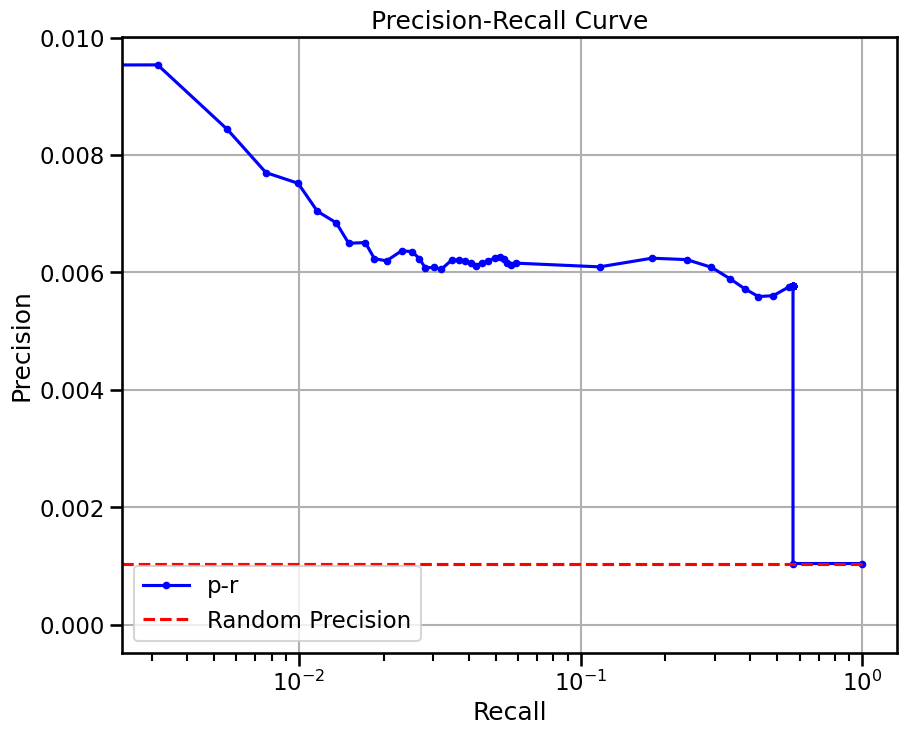


  0%|          | 0/7 [00:00<?, ?it/s]


 14%|█▍        | 1/7 [00:02<00:14,  2.48s/it]


 29%|██▊       | 2/7 [00:03<00:07,  1.56s/it]


 43%|████▎     | 3/7 [00:04<00:05,  1.27s/it]


 57%|█████▋    | 4/7 [00:05<00:03,  1.13s/it]


 71%|███████▏  | 5/7 [00:06<00:02,  1.07s/it]


 86%|████████▌ | 6/7 [00:07<00:01,  1.03s/it]


100%|██████████| 7/7 [00:07<00:00,  1.04it/s]


100%|██████████| 7/7 [00:08<00:00,  1.19s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


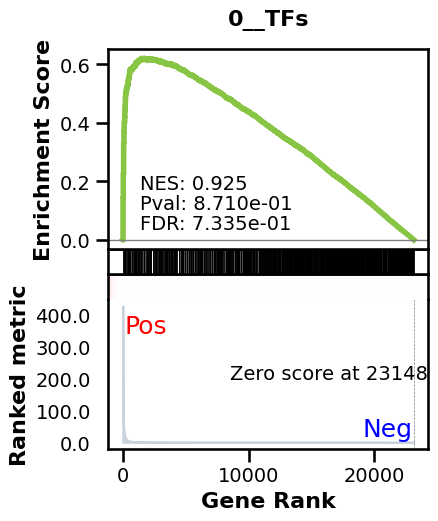

_________________________________________
TF specific enrichment


found some significant results for  70.53571428571429 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:29,  4.37it/s]


  2%|▏         | 2/128 [00:00<00:29,  4.32it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.34it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.31it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.33it/s]


  5%|▍         | 6/128 [00:01<00:28,  4.34it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.33it/s]


  6%|▋         | 8/128 [00:01<00:28,  4.15it/s]


  7%|▋         | 9/128 [00:02<00:28,  4.19it/s]


  8%|▊         | 10/128 [00:02<00:27,  4.22it/s]


  9%|▊         | 11/128 [00:02<00:27,  4.21it/s]


  9%|▉         | 12/128 [00:02<00:27,  4.25it/s]


 10%|█         | 13/128 [00:03<00:26,  4.27it/s]


 11%|█         | 14/128 [00:03<00:26,  4.29it/s]


 12%|█▏        | 15/128 [00:03<00:26,  4.28it/s]


 12%|█▎        | 16/128 [00:03<00:26,  4.27it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.28it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.28it/s]


 15%|█▍        | 19/128 [00:04<00:25,  4.26it/s]


 16%|█▌        | 20/128 [00:04<00:25,  4.27it/s]


 16%|█▋        | 21/128 [00:04<00:25,  4.26it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.26it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.26it/s]


 19%|█▉        | 24/128 [00:05<00:24,  4.26it/s]


 20%|█▉        | 25/128 [00:05<00:24,  4.28it/s]


 20%|██        | 26/128 [00:06<00:23,  4.27it/s]


 21%|██        | 27/128 [00:06<00:23,  4.26it/s]


 22%|██▏       | 28/128 [00:06<00:23,  4.29it/s]


 23%|██▎       | 29/128 [00:06<00:23,  4.29it/s]


 23%|██▎       | 30/128 [00:07<00:23,  4.25it/s]


 24%|██▍       | 31/128 [00:07<00:23,  4.12it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.19it/s]


 26%|██▌       | 33/128 [00:07<00:22,  4.23it/s]


 27%|██▋       | 34/128 [00:07<00:22,  4.17it/s]


 27%|██▋       | 35/128 [00:08<00:22,  4.06it/s]


 28%|██▊       | 36/128 [00:08<00:22,  4.12it/s]


 29%|██▉       | 37/128 [00:08<00:21,  4.17it/s]


 30%|██▉       | 38/128 [00:09<00:22,  3.99it/s]


 30%|███       | 39/128 [00:09<00:21,  4.07it/s]


 31%|███▏      | 40/128 [00:09<00:21,  4.13it/s]


 32%|███▏      | 41/128 [00:09<00:20,  4.20it/s]


 33%|███▎      | 42/128 [00:09<00:20,  4.23it/s]


 34%|███▎      | 43/128 [00:10<00:20,  4.25it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.27it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.27it/s]


 36%|███▌      | 46/128 [00:10<00:19,  4.30it/s]


 37%|███▋      | 47/128 [00:11<00:18,  4.31it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.30it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.30it/s]


 39%|███▉      | 50/128 [00:11<00:18,  4.29it/s]


 40%|███▉      | 51/128 [00:12<00:17,  4.30it/s]


 41%|████      | 52/128 [00:12<00:17,  4.30it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.32it/s]


 42%|████▏     | 54/128 [00:12<00:17,  4.33it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.31it/s]


 44%|████▍     | 56/128 [00:13<00:16,  4.34it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.31it/s]


 45%|████▌     | 58/128 [00:13<00:16,  4.32it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.33it/s]


 47%|████▋     | 60/128 [00:14<00:15,  4.33it/s]


 48%|████▊     | 61/128 [00:14<00:15,  4.33it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.29it/s]


 49%|████▉     | 63/128 [00:14<00:15,  4.30it/s]


 50%|█████     | 64/128 [00:15<00:14,  4.28it/s]


 51%|█████     | 65/128 [00:15<00:14,  4.28it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.27it/s]


 52%|█████▏    | 67/128 [00:15<00:14,  4.28it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.30it/s]


 54%|█████▍    | 69/128 [00:16<00:13,  4.30it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.30it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.30it/s]


 56%|█████▋    | 72/128 [00:16<00:13,  4.30it/s]


 57%|█████▋    | 73/128 [00:17<00:12,  4.31it/s]


 58%|█████▊    | 74/128 [00:17<00:12,  4.31it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.31it/s]


 59%|█████▉    | 76/128 [00:17<00:12,  4.32it/s]


 60%|██████    | 77/128 [00:18<00:11,  4.29it/s]


 61%|██████    | 78/128 [00:18<00:11,  4.30it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.30it/s]


 62%|██████▎   | 80/128 [00:18<00:11,  4.31it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.30it/s]


 64%|██████▍   | 82/128 [00:19<00:10,  4.31it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.29it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.28it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.31it/s]


 67%|██████▋   | 86/128 [00:20<00:09,  4.31it/s]


 68%|██████▊   | 87/128 [00:20<00:09,  4.30it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.28it/s]


 70%|██████▉   | 89/128 [00:20<00:09,  4.29it/s]


 70%|███████   | 90/128 [00:21<00:08,  4.27it/s]


 71%|███████   | 91/128 [00:21<00:08,  4.29it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.30it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.31it/s]


 73%|███████▎  | 94/128 [00:22<00:07,  4.30it/s]


 74%|███████▍  | 95/128 [00:22<00:07,  4.29it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.29it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.28it/s]


 77%|███████▋  | 98/128 [00:22<00:07,  4.28it/s]


 77%|███████▋  | 99/128 [00:23<00:06,  4.28it/s]


 78%|███████▊  | 100/128 [00:23<00:06,  4.29it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.28it/s]


 80%|███████▉  | 102/128 [00:23<00:06,  4.30it/s]


 80%|████████  | 103/128 [00:24<00:05,  4.29it/s]


 81%|████████▏ | 104/128 [00:24<00:05,  4.30it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.29it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.31it/s]


 84%|████████▎ | 107/128 [00:25<00:04,  4.30it/s]


 84%|████████▍ | 108/128 [00:25<00:04,  4.32it/s]


 85%|████████▌ | 109/128 [00:25<00:04,  4.30it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.31it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.31it/s]


 88%|████████▊ | 112/128 [00:26<00:03,  4.30it/s]


 88%|████████▊ | 113/128 [00:26<00:03,  4.31it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.30it/s]


 90%|████████▉ | 115/128 [00:26<00:03,  4.29it/s]


 91%|█████████ | 116/128 [00:27<00:02,  4.30it/s]


 91%|█████████▏| 117/128 [00:27<00:02,  4.29it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.29it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.27it/s]


 94%|█████████▍| 120/128 [00:28<00:01,  4.27it/s]


 95%|█████████▍| 121/128 [00:28<00:01,  4.30it/s]


 95%|█████████▌| 122/128 [00:28<00:01,  4.30it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.28it/s]


 97%|█████████▋| 124/128 [00:29<00:00,  4.27it/s]


 98%|█████████▊| 125/128 [00:29<00:00,  4.26it/s]


 98%|█████████▊| 126/128 [00:29<00:00,  4.29it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.29it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.27it/s]


100%|██████████| 128/128 [00:29<00:00,  4.27it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001059188687100562


EPR: 1.908858366793333


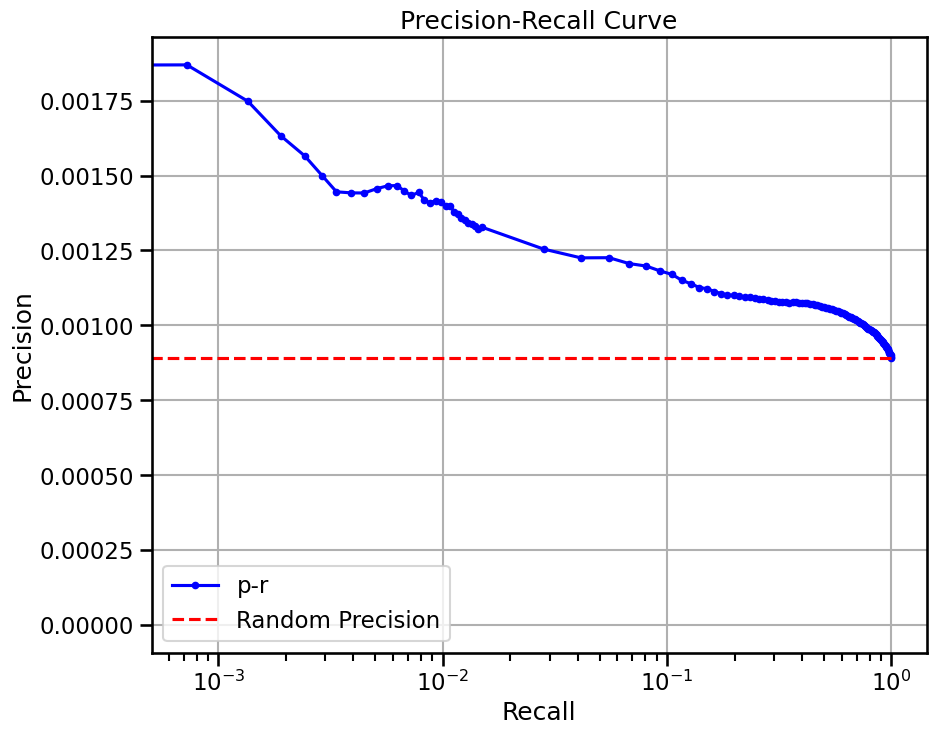


  0%|          | 0/14 [00:00<?, ?it/s]


  7%|▋         | 1/14 [00:02<00:38,  2.94s/it]


 14%|█▍        | 2/14 [00:04<00:24,  2.08s/it]


 21%|██▏       | 3/14 [00:05<00:19,  1.75s/it]


 29%|██▊       | 4/14 [00:07<00:15,  1.59s/it]


 36%|███▌      | 5/14 [00:09<00:16,  1.81s/it]


 43%|████▎     | 6/14 [00:10<00:13,  1.63s/it]


 50%|█████     | 7/14 [00:11<00:10,  1.51s/it]


 57%|█████▋    | 8/14 [00:13<00:08,  1.44s/it]


 64%|██████▍   | 9/14 [00:14<00:06,  1.39s/it]


 71%|███████▏  | 10/14 [00:15<00:05,  1.36s/it]


 79%|███████▊  | 11/14 [00:16<00:03,  1.33s/it]


 86%|████████▌ | 12/14 [00:18<00:02,  1.31s/it]


 93%|█████████▎| 13/14 [00:19<00:01,  1.30s/it]


100%|██████████| 14/14 [00:20<00:00,  1.18s/it]


100%|██████████| 14/14 [00:20<00:00,  1.49s/it]

base enrichment


Top central genes: []


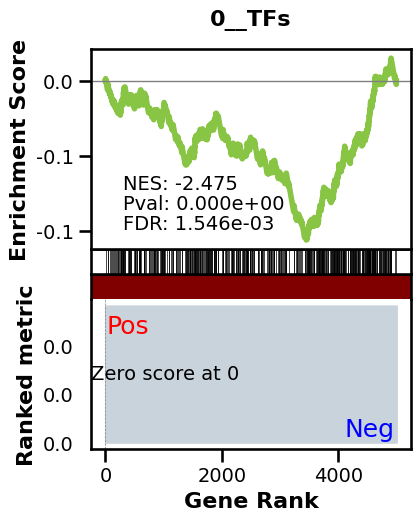

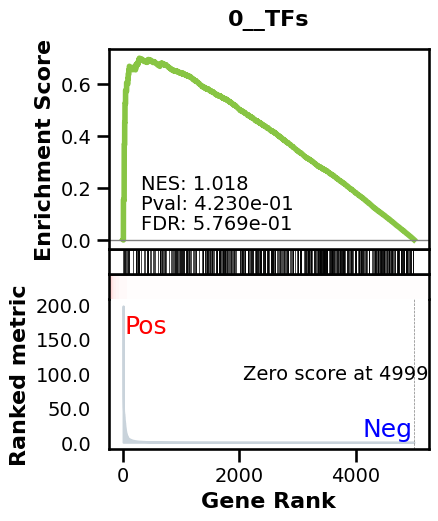

_________________________________________
TF specific enrichment


found some significant results for  29.09090909090909 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 50.37it/s]


  9%|▉         | 12/128 [00:00<00:02, 50.39it/s]


 14%|█▍        | 18/128 [00:00<00:02, 50.49it/s]


 19%|█▉        | 24/128 [00:00<00:02, 50.52it/s]


 23%|██▎       | 30/128 [00:00<00:01, 50.47it/s]


 28%|██▊       | 36/128 [00:00<00:01, 50.46it/s]


 33%|███▎      | 42/128 [00:00<00:01, 50.54it/s]


 38%|███▊      | 48/128 [00:00<00:01, 50.45it/s]


 42%|████▏     | 54/128 [00:01<00:01, 50.50it/s]


 47%|████▋     | 60/128 [00:01<00:01, 50.43it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 50.46it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 50.53it/s]


 61%|██████    | 78/128 [00:01<00:00, 50.33it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 50.41it/s]


 70%|███████   | 90/128 [00:01<00:00, 50.43it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 50.41it/s]


 80%|███████▉  | 102/128 [00:02<00:00, 50.52it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 50.49it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 50.50it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 50.48it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 50.57it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 50.46it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001736668534407967
EPR: 1.618165553046366


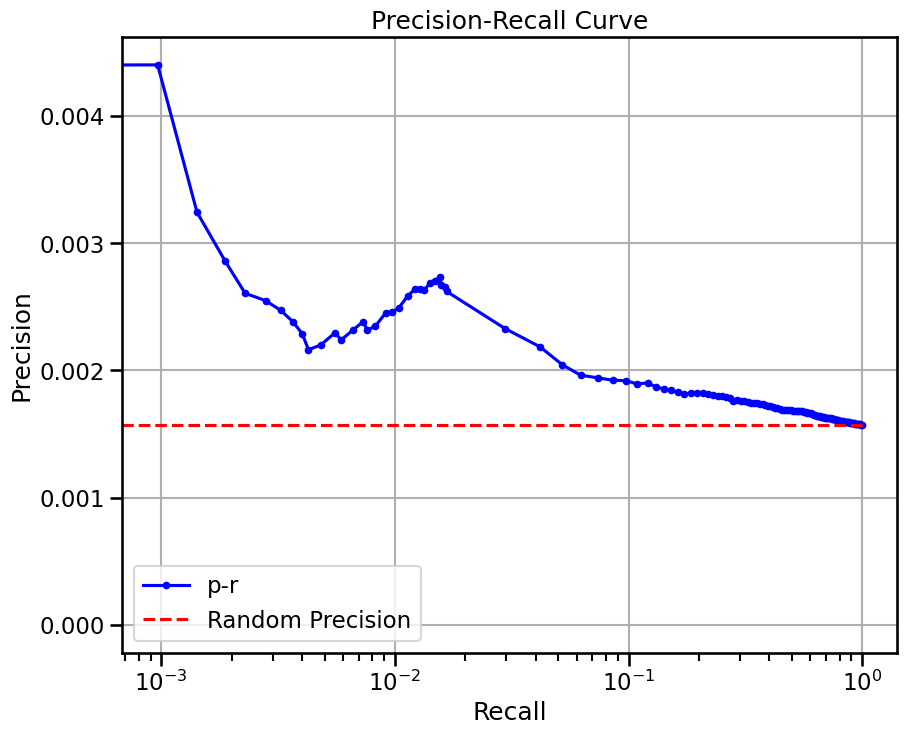

base enrichment


Top central genes: []


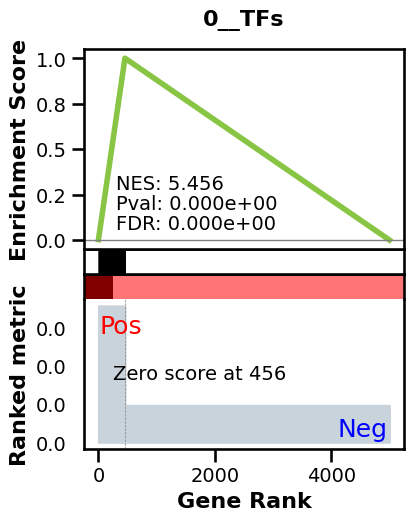

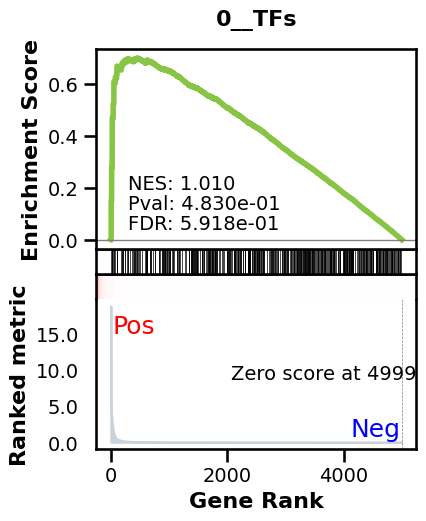

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.007216602122232253 
recall:  0.5214652237971854 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 53.92it/s]


  9%|▉         | 12/128 [00:00<00:02, 53.50it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.39it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.43it/s]


 23%|██▎       | 30/128 [00:00<00:01, 53.40it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.39it/s]


 33%|███▎      | 42/128 [00:00<00:01, 53.34it/s]


 38%|███▊      | 48/128 [00:00<00:01, 53.42it/s]


 42%|████▏     | 54/128 [00:01<00:01, 53.47it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.01it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.23it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.42it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.52it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.47it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.70it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.67it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.58it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 53.59it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.62it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.63it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.64it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 53.48it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005075542948873533
EPR: 7.582059873710058


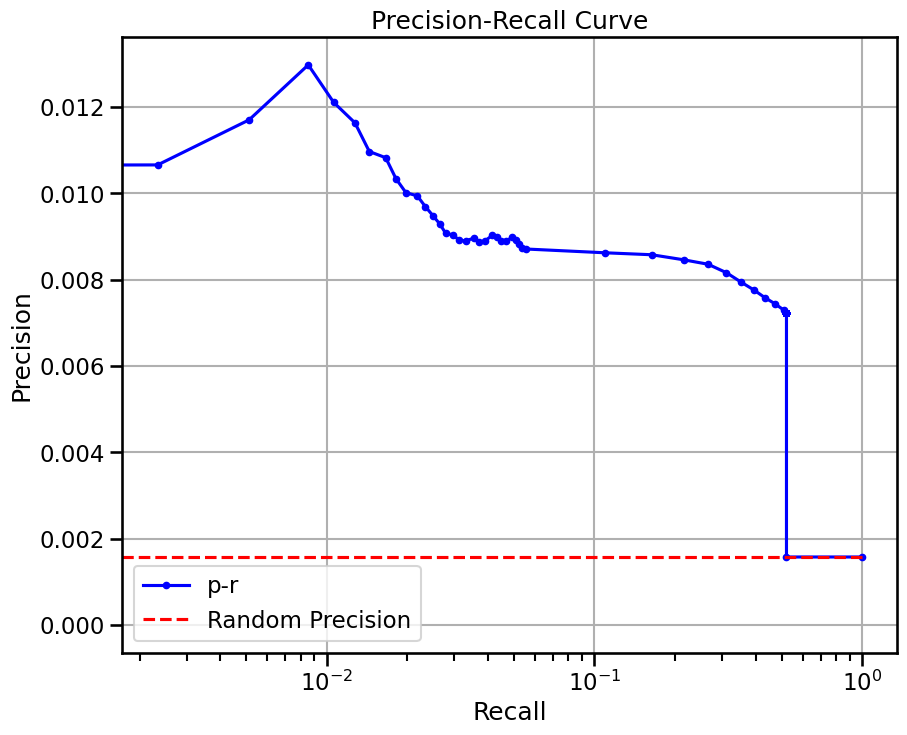

base enrichment


Top central genes: []


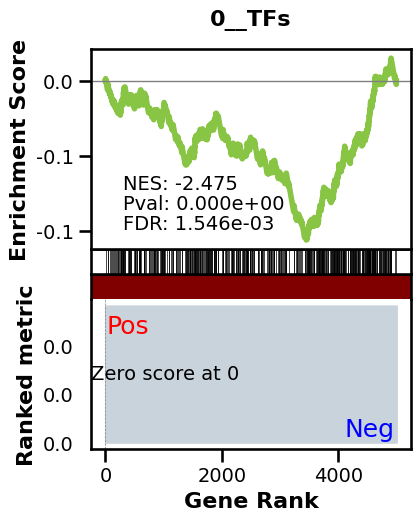

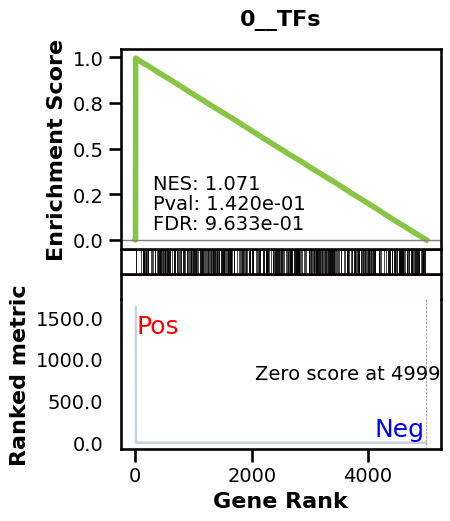

_________________________________________
TF specific enrichment


found some significant results for  14.545454545454545 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.23it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.11it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.08it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.05it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.00it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.99it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.09it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.09it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.08it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.10it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.04it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.99it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.08it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.95it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.01it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.11it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.05it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.02it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.12it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.12it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.08it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.04it/s]

Area Under Precision-Recall Curve (AUPRC):  0.002032308960959235
EPR: 2.0089823089392


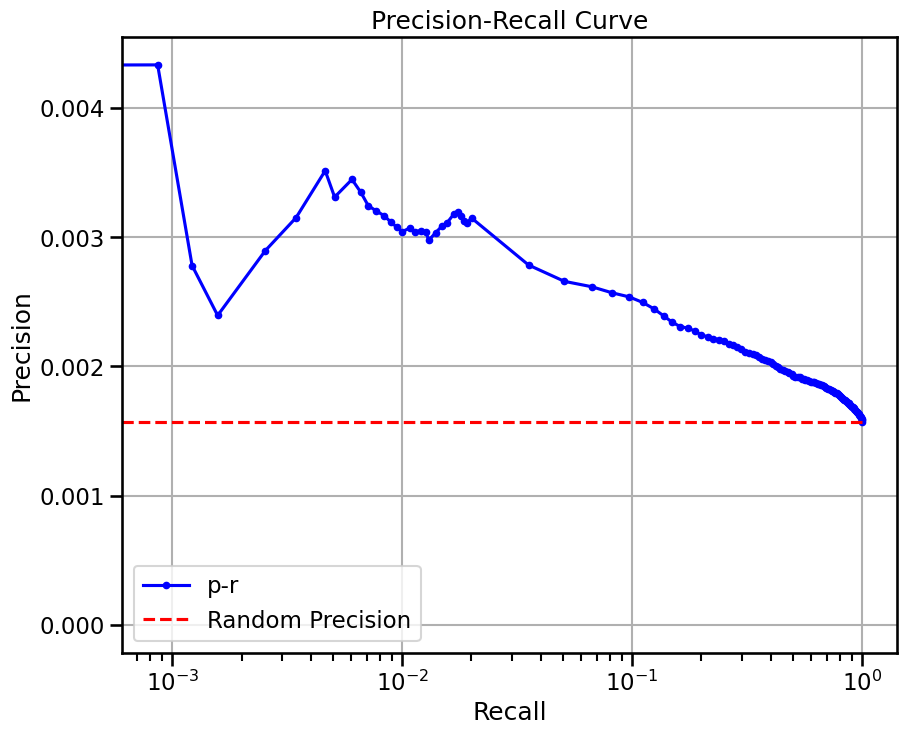

base enrichment


Top central genes: []


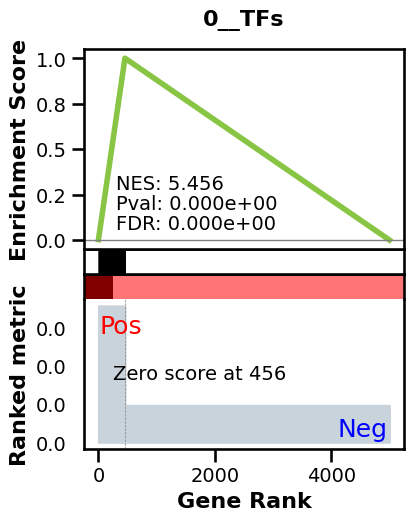

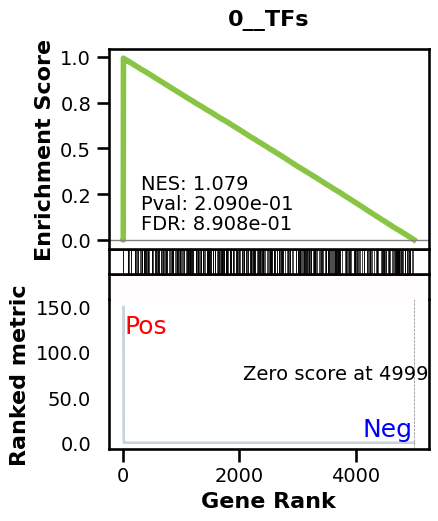

_________________________________________
TF specific enrichment


found some significant results for  7.2727272727272725 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.007216602122232253 
recall:  0.5214652237971854 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.08it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.02it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.89it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.96it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.00it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.92it/s]


 33%|███▎      | 42/128 [00:00<00:01, 53.70it/s]


 38%|███▊      | 48/128 [00:00<00:01, 53.68it/s]


 42%|████▏     | 54/128 [00:01<00:01, 53.72it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.61it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.81it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.70it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.66it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.56it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.61it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.53it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.67it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 53.33it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.34it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.48it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.51it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 53.63it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00573239588002909
EPR: 9.073572668362264


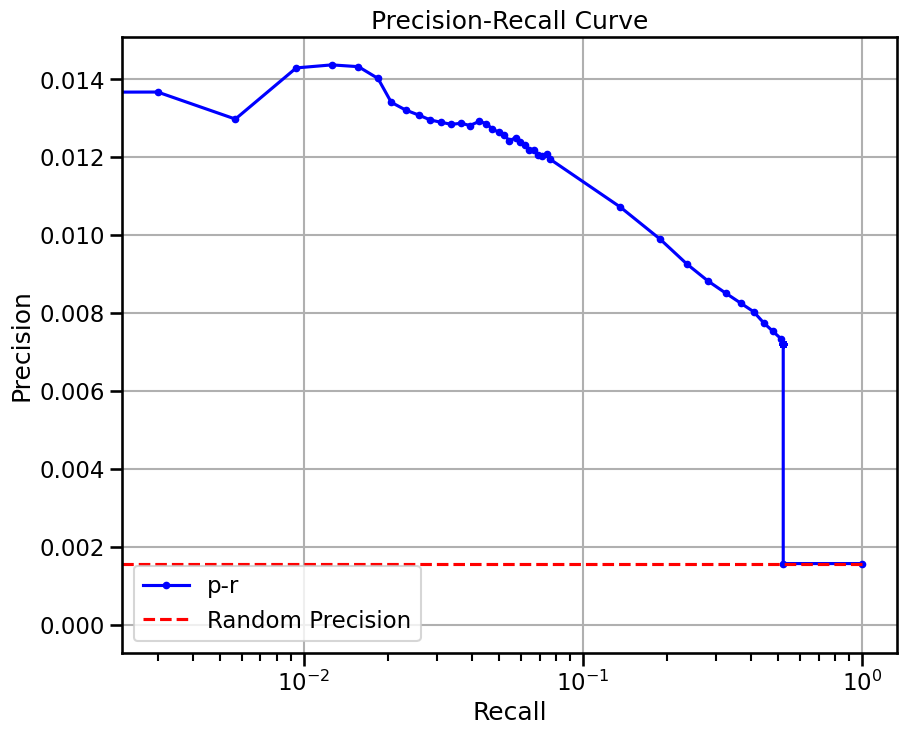


  0%|          | 0/11 [00:00<?, ?it/s]


  9%|▉         | 1/11 [00:02<00:24,  2.41s/it]


 18%|█▊        | 2/11 [00:03<00:13,  1.55s/it]


 27%|██▋       | 3/11 [00:04<00:10,  1.27s/it]


 36%|███▋      | 4/11 [00:05<00:07,  1.14s/it]


 45%|████▌     | 5/11 [00:06<00:06,  1.07s/it]


 55%|█████▍    | 6/11 [00:08<00:07,  1.44s/it]


 64%|██████▎   | 7/11 [00:09<00:05,  1.28s/it]


 73%|███████▎  | 8/11 [00:10<00:03,  1.16s/it]


 82%|████████▏ | 9/11 [00:11<00:02,  1.09s/it]


 91%|█████████ | 10/11 [00:12<00:01,  1.03s/it]


100%|██████████| 11/11 [00:12<00:00,  1.01it/s]


100%|██████████| 11/11 [00:13<00:00,  1.20s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


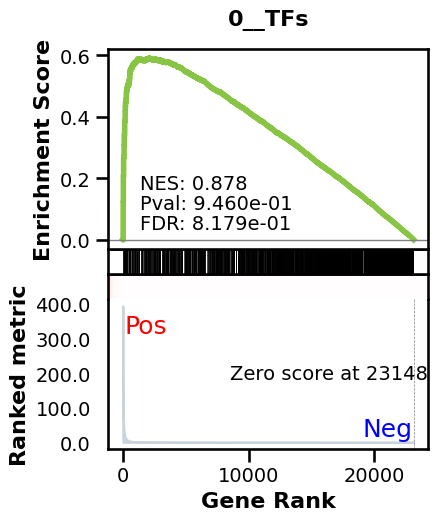

_________________________________________
TF specific enrichment


found some significant results for  60.714285714285715 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:29,  4.30it/s]


  2%|▏         | 2/128 [00:00<00:29,  4.28it/s]


  2%|▏         | 3/128 [00:00<00:29,  4.30it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.28it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.26it/s]


  5%|▍         | 6/128 [00:01<00:28,  4.28it/s]


  5%|▌         | 7/128 [00:01<00:28,  4.28it/s]


  6%|▋         | 8/128 [00:01<00:28,  4.28it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.30it/s]


  8%|▊         | 10/128 [00:02<00:27,  4.29it/s]


  9%|▊         | 11/128 [00:02<00:27,  4.29it/s]


  9%|▉         | 12/128 [00:02<00:27,  4.27it/s]


 10%|█         | 13/128 [00:03<00:26,  4.27it/s]


 11%|█         | 14/128 [00:03<00:26,  4.28it/s]


 12%|█▏        | 15/128 [00:03<00:26,  4.30it/s]


 12%|█▎        | 16/128 [00:03<00:26,  4.29it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.29it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.29it/s]


 15%|█▍        | 19/128 [00:04<00:25,  4.31it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.33it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.33it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.31it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.30it/s]


 19%|█▉        | 24/128 [00:05<00:24,  4.30it/s]


 20%|█▉        | 25/128 [00:05<00:24,  4.29it/s]


 20%|██        | 26/128 [00:06<00:23,  4.28it/s]


 21%|██        | 27/128 [00:06<00:23,  4.29it/s]


 22%|██▏       | 28/128 [00:06<00:23,  4.28it/s]


 23%|██▎       | 29/128 [00:06<00:23,  4.28it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.30it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.29it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.27it/s]


 26%|██▌       | 33/128 [00:07<00:22,  4.27it/s]


 27%|██▋       | 34/128 [00:07<00:22,  4.26it/s]


 27%|██▋       | 35/128 [00:08<00:21,  4.28it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.29it/s]


 29%|██▉       | 37/128 [00:08<00:21,  4.30it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.32it/s]


 30%|███       | 39/128 [00:09<00:20,  4.33it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.31it/s]


 32%|███▏      | 41/128 [00:09<00:20,  4.31it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.31it/s]


 34%|███▎      | 43/128 [00:10<00:19,  4.33it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.31it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.31it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.32it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.32it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.32it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.33it/s]


 39%|███▉      | 50/128 [00:11<00:18,  4.32it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.32it/s]


 41%|████      | 52/128 [00:12<00:17,  4.32it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.31it/s]


 42%|████▏     | 54/128 [00:12<00:17,  4.30it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.30it/s]


 44%|████▍     | 56/128 [00:13<00:16,  4.29it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.30it/s]


 45%|████▌     | 58/128 [00:13<00:16,  4.30it/s]


 46%|████▌     | 59/128 [00:13<00:16,  4.30it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.30it/s]


 48%|████▊     | 61/128 [00:14<00:15,  4.30it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.29it/s]


 49%|████▉     | 63/128 [00:14<00:15,  4.29it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.27it/s]


 51%|█████     | 65/128 [00:15<00:14,  4.29it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.27it/s]


 52%|█████▏    | 67/128 [00:15<00:14,  4.30it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.30it/s]


 54%|█████▍    | 69/128 [00:16<00:13,  4.31it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.31it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.31it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.32it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.32it/s]


 58%|█████▊    | 74/128 [00:17<00:12,  4.32it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.33it/s]


 59%|█████▉    | 76/128 [00:17<00:12,  4.31it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.31it/s]


 61%|██████    | 78/128 [00:18<00:11,  4.31it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.31it/s]


 62%|██████▎   | 80/128 [00:18<00:11,  4.32it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.33it/s]


 64%|██████▍   | 82/128 [00:19<00:10,  4.34it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.32it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.31it/s]


 66%|██████▋   | 85/128 [00:19<00:10,  4.27it/s]


 67%|██████▋   | 86/128 [00:20<00:09,  4.27it/s]


 68%|██████▊   | 87/128 [00:20<00:09,  4.28it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.30it/s]


 70%|██████▉   | 89/128 [00:20<00:09,  4.32it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.31it/s]


 71%|███████   | 91/128 [00:21<00:08,  4.32it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.33it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.32it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.30it/s]


 74%|███████▍  | 95/128 [00:22<00:07,  4.31it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.31it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.32it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.31it/s]


 77%|███████▋  | 99/128 [00:23<00:06,  4.29it/s]


 78%|███████▊  | 100/128 [00:23<00:06,  4.30it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.29it/s]


 80%|███████▉  | 102/128 [00:23<00:06,  4.29it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.29it/s]


 81%|████████▏ | 104/128 [00:24<00:05,  4.31it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.30it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.31it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.30it/s]


 84%|████████▍ | 108/128 [00:25<00:04,  4.29it/s]


 85%|████████▌ | 109/128 [00:25<00:04,  4.30it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.30it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.28it/s]


 88%|████████▊ | 112/128 [00:26<00:03,  4.27it/s]


 88%|████████▊ | 113/128 [00:26<00:03,  4.26it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.28it/s]


 90%|████████▉ | 115/128 [00:26<00:03,  4.28it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.27it/s]


 91%|█████████▏| 117/128 [00:27<00:02,  4.28it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.30it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.28it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.27it/s]


 95%|█████████▍| 121/128 [00:28<00:01,  4.29it/s]


 95%|█████████▌| 122/128 [00:28<00:01,  4.28it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.29it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.29it/s]


 98%|█████████▊| 125/128 [00:29<00:00,  4.17it/s]


 98%|█████████▊| 126/128 [00:29<00:00,  4.22it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.25it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.27it/s]


100%|██████████| 128/128 [00:29<00:00,  4.30it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010292649524363219


EPR: 1.647052362499381


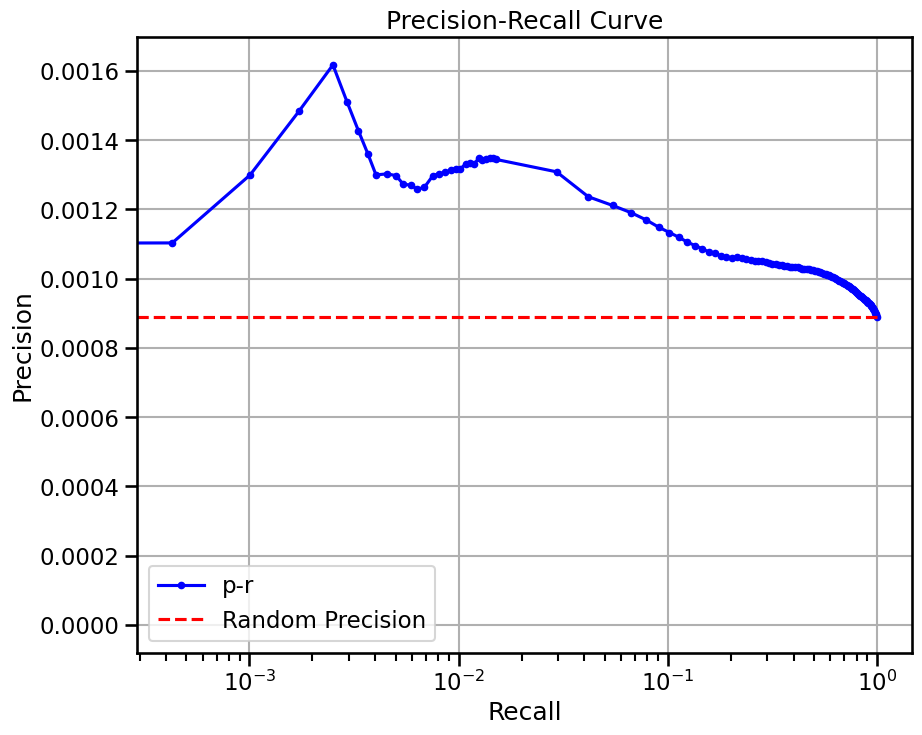


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:02<00:59,  2.83s/it]


  9%|▉         | 2/22 [00:04<00:37,  1.89s/it]


 14%|█▎        | 3/22 [00:05<00:30,  1.58s/it]


 18%|█▊        | 4/22 [00:06<00:25,  1.43s/it]


 23%|██▎       | 5/22 [00:07<00:23,  1.36s/it]


 27%|██▋       | 6/22 [00:08<00:21,  1.32s/it]


 32%|███▏      | 7/22 [00:10<00:19,  1.29s/it]


 36%|███▋      | 8/22 [00:11<00:17,  1.26s/it]


 41%|████      | 9/22 [00:12<00:16,  1.25s/it]


 45%|████▌     | 10/22 [00:13<00:14,  1.24s/it]


 50%|█████     | 11/22 [00:15<00:13,  1.23s/it]


 55%|█████▍    | 12/22 [00:16<00:12,  1.22s/it]


 59%|█████▉    | 13/22 [00:17<00:10,  1.22s/it]


 64%|██████▎   | 14/22 [00:18<00:09,  1.22s/it]


 68%|██████▊   | 15/22 [00:19<00:08,  1.21s/it]


 73%|███████▎  | 16/22 [00:21<00:07,  1.20s/it]


 77%|███████▋  | 17/22 [00:22<00:06,  1.20s/it]


 82%|████████▏ | 18/22 [00:23<00:04,  1.20s/it]


 86%|████████▋ | 19/22 [00:24<00:03,  1.20s/it]


 91%|█████████ | 20/22 [00:25<00:02,  1.20s/it]


 95%|█████████▌| 21/22 [00:27<00:01,  1.20s/it]


100%|██████████| 22/22 [00:28<00:00,  1.19s/it]


100%|██████████| 22/22 [00:28<00:00,  1.30s/it]

base enrichment


Top central genes: []


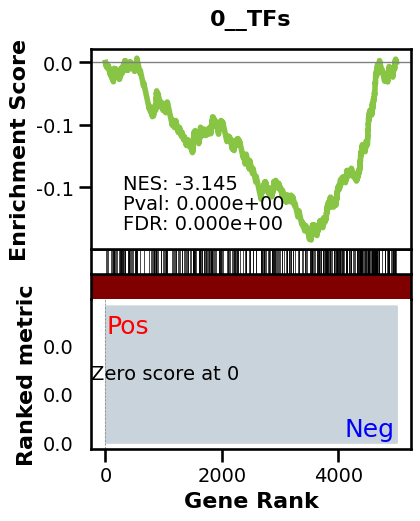

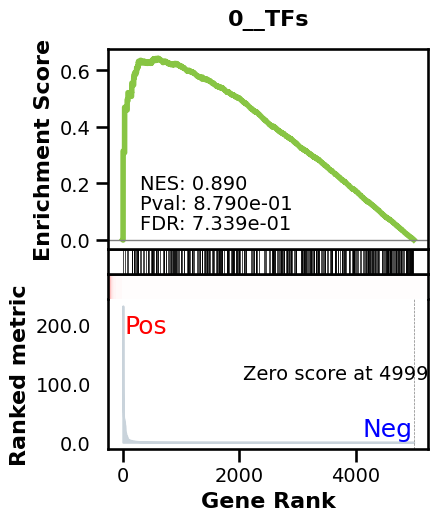

_________________________________________
TF specific enrichment


found some significant results for  22.916666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 51.06it/s]


  9%|▉         | 12/128 [00:00<00:02, 51.37it/s]


 14%|█▍        | 18/128 [00:00<00:02, 51.36it/s]


 19%|█▉        | 24/128 [00:00<00:02, 51.33it/s]


 23%|██▎       | 30/128 [00:00<00:01, 51.42it/s]


 28%|██▊       | 36/128 [00:00<00:01, 51.43it/s]


 33%|███▎      | 42/128 [00:00<00:01, 51.20it/s]


 38%|███▊      | 48/128 [00:00<00:01, 51.23it/s]


 42%|████▏     | 54/128 [00:01<00:01, 51.02it/s]


 47%|████▋     | 60/128 [00:01<00:01, 51.10it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 50.98it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 51.10it/s]


 61%|██████    | 78/128 [00:01<00:00, 51.08it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 51.21it/s]


 70%|███████   | 90/128 [00:01<00:00, 51.09it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 51.02it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 51.12it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 51.02it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 51.22it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 51.19it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 51.20it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 51.12it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00152182807740365


EPR: 1.1764091504742658


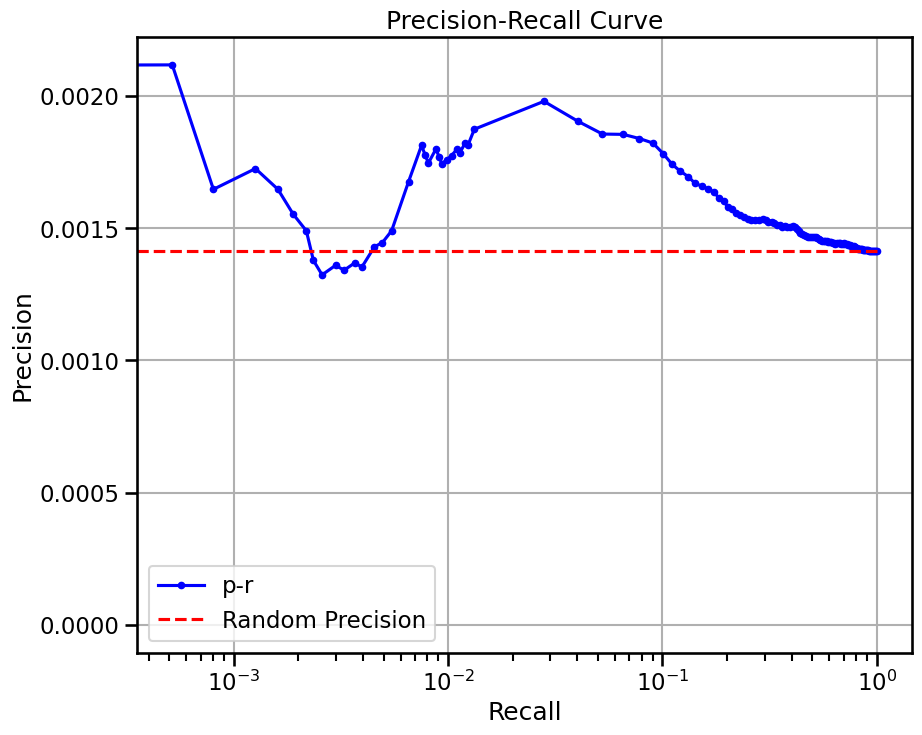

base enrichment


Top central genes: []


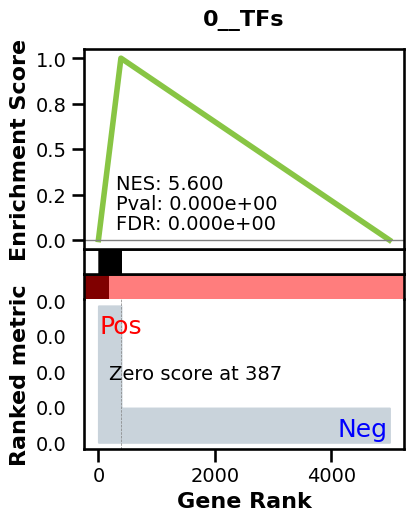

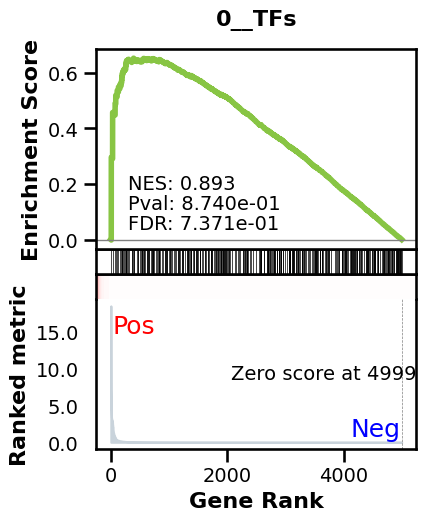

_________________________________________
TF specific enrichment


found some significant results for  4.166666666666667 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.007612673505194292 
recall:  0.50745669381668 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 52.60it/s]


  9%|▉         | 12/128 [00:00<00:02, 52.62it/s]


 14%|█▍        | 18/128 [00:00<00:02, 52.52it/s]


 19%|█▉        | 24/128 [00:00<00:01, 52.52it/s]


 23%|██▎       | 30/128 [00:00<00:01, 52.54it/s]


 28%|██▊       | 36/128 [00:00<00:01, 52.35it/s]


 33%|███▎      | 42/128 [00:00<00:01, 52.38it/s]


 38%|███▊      | 48/128 [00:00<00:01, 52.41it/s]


 42%|████▏     | 54/128 [00:01<00:01, 51.79it/s]


 47%|████▋     | 60/128 [00:01<00:01, 51.98it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 52.07it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 52.09it/s]


 61%|██████    | 78/128 [00:01<00:00, 52.25it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 52.25it/s]


 70%|███████   | 90/128 [00:01<00:00, 52.16it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 52.09it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 51.62it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 51.44it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 51.53it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 51.56it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 51.50it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 51.97it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005065184535349827
EPR: 9.123769079747344


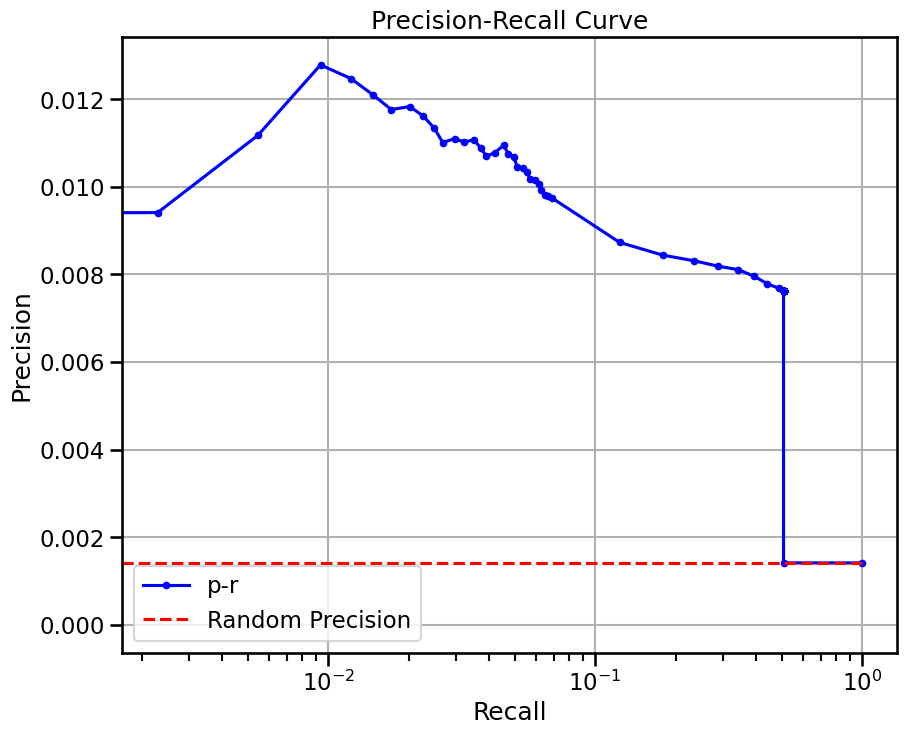

base enrichment


Top central genes: []


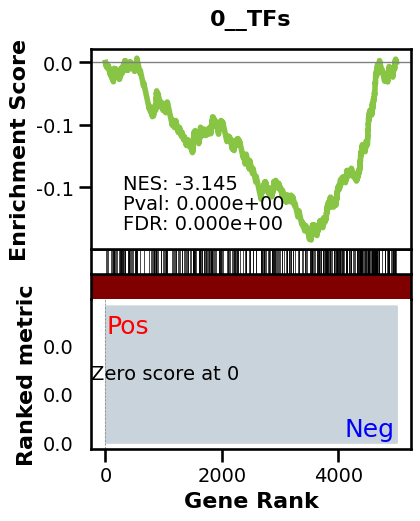

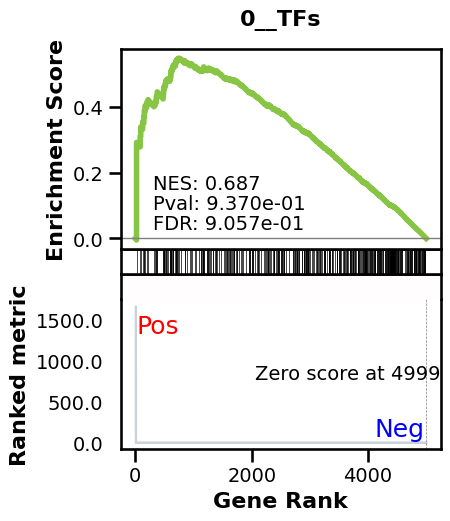

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.27it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.15it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.26it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.44it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.59it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.67it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.64it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.64it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.52it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.45it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.53it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.55it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.55it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.61it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.56it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.54it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.58it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.57it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.59it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.40it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.58it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.52it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018685022603467556
EPR: 1.7471423519160048


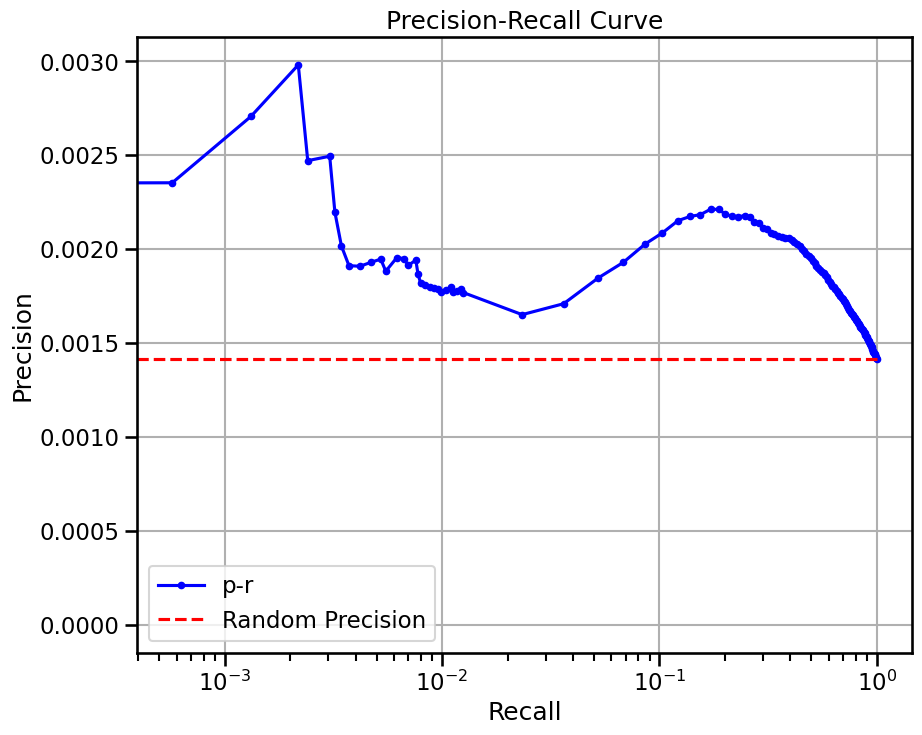

base enrichment


Top central genes: []


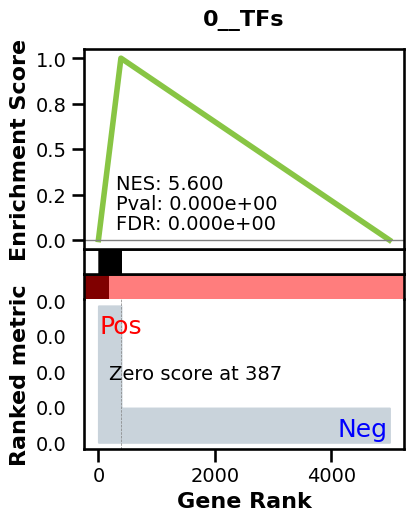

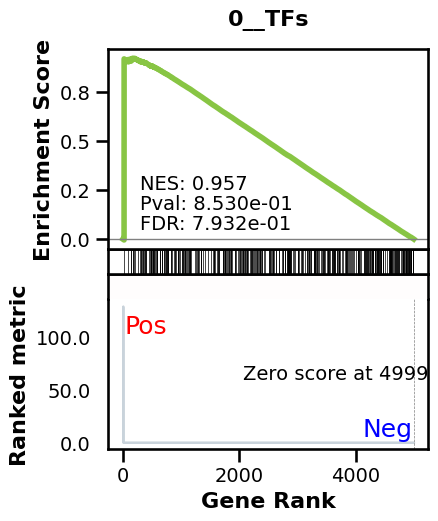

_________________________________________
TF specific enrichment


found some significant results for  2.0833333333333335 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.007612673505194292 
recall:  0.50745669381668 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.35it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.32it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.44it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.41it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.37it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.47it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.58it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.55it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.48it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.43it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.35it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.39it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.32it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.35it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.35it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.26it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.40it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.30it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.31it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.34it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.38it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.34it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0072502405470152385
EPR: 16.012405615818103


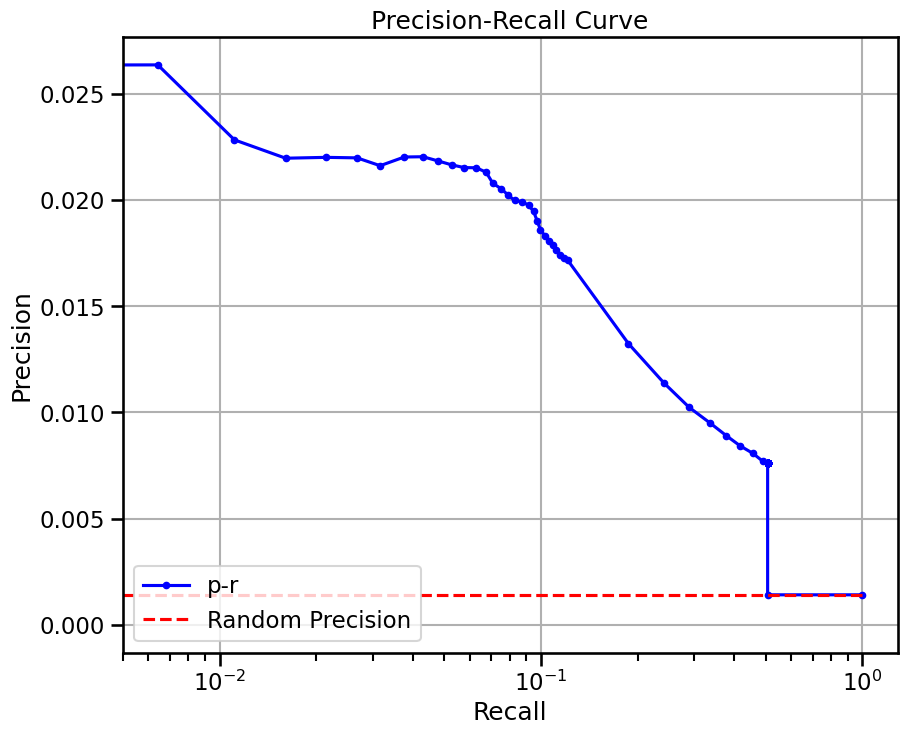


  0%|          | 0/2 [00:00<?, ?it/s]


 50%|█████     | 1/2 [00:02<00:02,  2.36s/it]


100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

avg link count: 488763664, sparsity: 1.0


base enrichment


too many genes for central computation


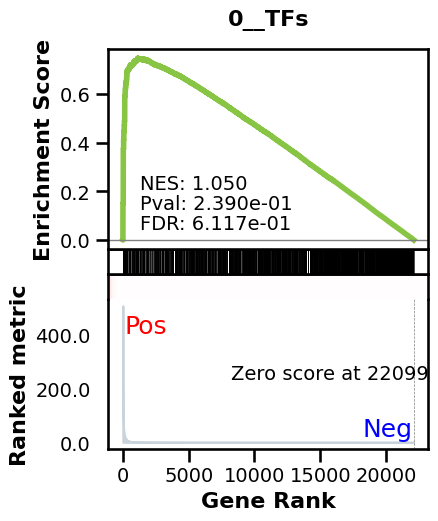

_________________________________________
TF specific enrichment


found some significant results for  61.26126126126126 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12035 genes
intersection pct: 0.5445701357466063


precision:  0.0008871576445172982 
recall:  1.0 
random precision: 0.000887231365445046



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:27,  4.64it/s]


  2%|▏         | 2/128 [00:00<00:27,  4.59it/s]


  2%|▏         | 3/128 [00:00<00:27,  4.59it/s]


  3%|▎         | 4/128 [00:00<00:27,  4.59it/s]


  4%|▍         | 5/128 [00:01<00:26,  4.60it/s]


  5%|▍         | 6/128 [00:01<00:26,  4.62it/s]


  5%|▌         | 7/128 [00:01<00:26,  4.64it/s]


  6%|▋         | 8/128 [00:01<00:25,  4.63it/s]


  7%|▋         | 9/128 [00:01<00:25,  4.62it/s]


  8%|▊         | 10/128 [00:02<00:25,  4.63it/s]


  9%|▊         | 11/128 [00:02<00:25,  4.63it/s]


  9%|▉         | 12/128 [00:02<00:24,  4.64it/s]


 10%|█         | 13/128 [00:02<00:24,  4.62it/s]


 11%|█         | 14/128 [00:03<00:24,  4.63it/s]


 12%|█▏        | 15/128 [00:03<00:24,  4.63it/s]


 12%|█▎        | 16/128 [00:03<00:24,  4.64it/s]


 13%|█▎        | 17/128 [00:03<00:23,  4.64it/s]


 14%|█▍        | 18/128 [00:03<00:23,  4.64it/s]


 15%|█▍        | 19/128 [00:04<00:23,  4.61it/s]


 16%|█▌        | 20/128 [00:04<00:23,  4.60it/s]


 16%|█▋        | 21/128 [00:04<00:23,  4.60it/s]


 17%|█▋        | 22/128 [00:04<00:23,  4.61it/s]


 18%|█▊        | 23/128 [00:04<00:22,  4.62it/s]


 19%|█▉        | 24/128 [00:05<00:22,  4.63it/s]


 20%|█▉        | 25/128 [00:05<00:22,  4.64it/s]


 20%|██        | 26/128 [00:05<00:21,  4.64it/s]


 21%|██        | 27/128 [00:05<00:21,  4.62it/s]


 22%|██▏       | 28/128 [00:06<00:21,  4.61it/s]


 23%|██▎       | 29/128 [00:06<00:21,  4.61it/s]


 23%|██▎       | 30/128 [00:06<00:21,  4.62it/s]


 24%|██▍       | 31/128 [00:06<00:20,  4.62it/s]


 25%|██▌       | 32/128 [00:06<00:20,  4.63it/s]


 26%|██▌       | 33/128 [00:07<00:20,  4.62it/s]


 27%|██▋       | 34/128 [00:07<00:20,  4.63it/s]


 27%|██▋       | 35/128 [00:07<00:20,  4.64it/s]


 28%|██▊       | 36/128 [00:07<00:19,  4.64it/s]


 29%|██▉       | 37/128 [00:08<00:19,  4.63it/s]


 30%|██▉       | 38/128 [00:08<00:19,  4.63it/s]


 30%|███       | 39/128 [00:08<00:19,  4.61it/s]


 31%|███▏      | 40/128 [00:08<00:19,  4.61it/s]


 32%|███▏      | 41/128 [00:08<00:18,  4.60it/s]


 33%|███▎      | 42/128 [00:09<00:18,  4.62it/s]


 34%|███▎      | 43/128 [00:09<00:18,  4.62it/s]


 34%|███▍      | 44/128 [00:09<00:18,  4.63it/s]


 35%|███▌      | 45/128 [00:09<00:17,  4.61it/s]


 36%|███▌      | 46/128 [00:09<00:17,  4.61it/s]


 37%|███▋      | 47/128 [00:10<00:17,  4.60it/s]


 38%|███▊      | 48/128 [00:10<00:17,  4.61it/s]


 38%|███▊      | 49/128 [00:10<00:17,  4.60it/s]


 39%|███▉      | 50/128 [00:10<00:16,  4.61it/s]


 40%|███▉      | 51/128 [00:11<00:16,  4.62it/s]


 41%|████      | 52/128 [00:11<00:16,  4.63it/s]


 41%|████▏     | 53/128 [00:11<00:16,  4.51it/s]


 42%|████▏     | 54/128 [00:11<00:16,  4.48it/s]


 43%|████▎     | 55/128 [00:11<00:16,  4.51it/s]


 44%|████▍     | 56/128 [00:12<00:15,  4.55it/s]


 45%|████▍     | 57/128 [00:12<00:15,  4.58it/s]


 45%|████▌     | 58/128 [00:12<00:15,  4.58it/s]


 46%|████▌     | 59/128 [00:12<00:15,  4.60it/s]


 47%|████▋     | 60/128 [00:13<00:14,  4.59it/s]


 48%|████▊     | 61/128 [00:13<00:14,  4.59it/s]


 48%|████▊     | 62/128 [00:13<00:14,  4.60it/s]


 49%|████▉     | 63/128 [00:13<00:14,  4.62it/s]


 50%|█████     | 64/128 [00:13<00:13,  4.62it/s]


 51%|█████     | 65/128 [00:14<00:13,  4.61it/s]


 52%|█████▏    | 66/128 [00:14<00:13,  4.58it/s]


 52%|█████▏    | 67/128 [00:14<00:13,  4.59it/s]


 53%|█████▎    | 68/128 [00:14<00:13,  4.61it/s]


 54%|█████▍    | 69/128 [00:14<00:12,  4.60it/s]


 55%|█████▍    | 70/128 [00:15<00:12,  4.60it/s]


 55%|█████▌    | 71/128 [00:15<00:12,  4.61it/s]


 56%|█████▋    | 72/128 [00:15<00:12,  4.61it/s]


 57%|█████▋    | 73/128 [00:15<00:12,  4.56it/s]


 58%|█████▊    | 74/128 [00:16<00:11,  4.57it/s]


 59%|█████▊    | 75/128 [00:16<00:11,  4.56it/s]


 59%|█████▉    | 76/128 [00:16<00:11,  4.57it/s]


 60%|██████    | 77/128 [00:16<00:11,  4.59it/s]


 61%|██████    | 78/128 [00:16<00:10,  4.59it/s]


 62%|██████▏   | 79/128 [00:17<00:10,  4.61it/s]


 62%|██████▎   | 80/128 [00:17<00:10,  4.61it/s]


 63%|██████▎   | 81/128 [00:17<00:10,  4.62it/s]


 64%|██████▍   | 82/128 [00:17<00:09,  4.64it/s]


 65%|██████▍   | 83/128 [00:18<00:09,  4.65it/s]


 66%|██████▌   | 84/128 [00:18<00:09,  4.66it/s]


 66%|██████▋   | 85/128 [00:18<00:09,  4.65it/s]


 67%|██████▋   | 86/128 [00:18<00:09,  4.64it/s]


 68%|██████▊   | 87/128 [00:18<00:08,  4.61it/s]


 69%|██████▉   | 88/128 [00:19<00:08,  4.62it/s]


 70%|██████▉   | 89/128 [00:19<00:08,  4.65it/s]


 70%|███████   | 90/128 [00:19<00:08,  4.63it/s]


 71%|███████   | 91/128 [00:19<00:08,  4.62it/s]


 72%|███████▏  | 92/128 [00:19<00:07,  4.64it/s]


 73%|███████▎  | 93/128 [00:20<00:07,  4.56it/s]


 73%|███████▎  | 94/128 [00:20<00:07,  4.40it/s]


 74%|███████▍  | 95/128 [00:20<00:07,  4.47it/s]


 75%|███████▌  | 96/128 [00:20<00:07,  4.53it/s]


 76%|███████▌  | 97/128 [00:21<00:06,  4.57it/s]


 77%|███████▋  | 98/128 [00:21<00:06,  4.59it/s]


 77%|███████▋  | 99/128 [00:21<00:06,  4.60it/s]


 78%|███████▊  | 100/128 [00:21<00:06,  4.53it/s]


 79%|███████▉  | 101/128 [00:21<00:06,  4.36it/s]


 80%|███████▉  | 102/128 [00:22<00:05,  4.44it/s]


 80%|████████  | 103/128 [00:22<00:05,  4.50it/s]


 81%|████████▏ | 104/128 [00:22<00:05,  4.55it/s]


 82%|████████▏ | 105/128 [00:22<00:05,  4.58it/s]


 83%|████████▎ | 106/128 [00:23<00:04,  4.61it/s]


 84%|████████▎ | 107/128 [00:23<00:04,  4.47it/s]


 84%|████████▍ | 108/128 [00:23<00:04,  4.51it/s]


 85%|████████▌ | 109/128 [00:23<00:04,  4.56it/s]


 86%|████████▌ | 110/128 [00:23<00:03,  4.58it/s]


 87%|████████▋ | 111/128 [00:24<00:03,  4.58it/s]


 88%|████████▊ | 112/128 [00:24<00:03,  4.59it/s]


 88%|████████▊ | 113/128 [00:24<00:03,  4.61it/s]


 89%|████████▉ | 114/128 [00:24<00:03,  4.63it/s]


 90%|████████▉ | 115/128 [00:25<00:02,  4.63it/s]


 91%|█████████ | 116/128 [00:25<00:02,  4.64it/s]


 91%|█████████▏| 117/128 [00:25<00:02,  4.64it/s]


 92%|█████████▏| 118/128 [00:25<00:02,  4.64it/s]


 93%|█████████▎| 119/128 [00:25<00:01,  4.63it/s]


 94%|█████████▍| 120/128 [00:26<00:01,  4.64it/s]


 95%|█████████▍| 121/128 [00:26<00:01,  4.64it/s]


 95%|█████████▌| 122/128 [00:26<00:01,  4.64it/s]


 96%|█████████▌| 123/128 [00:26<00:01,  4.64it/s]


 97%|█████████▋| 124/128 [00:26<00:00,  4.66it/s]


 98%|█████████▊| 125/128 [00:27<00:00,  4.65it/s]


 98%|█████████▊| 126/128 [00:27<00:00,  4.63it/s]


 99%|█████████▉| 127/128 [00:27<00:00,  4.65it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:27<00:00,  4.64it/s]


100%|██████████| 128/128 [00:27<00:00,  4.60it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010273085385639018


EPR: 1.5012467748811809


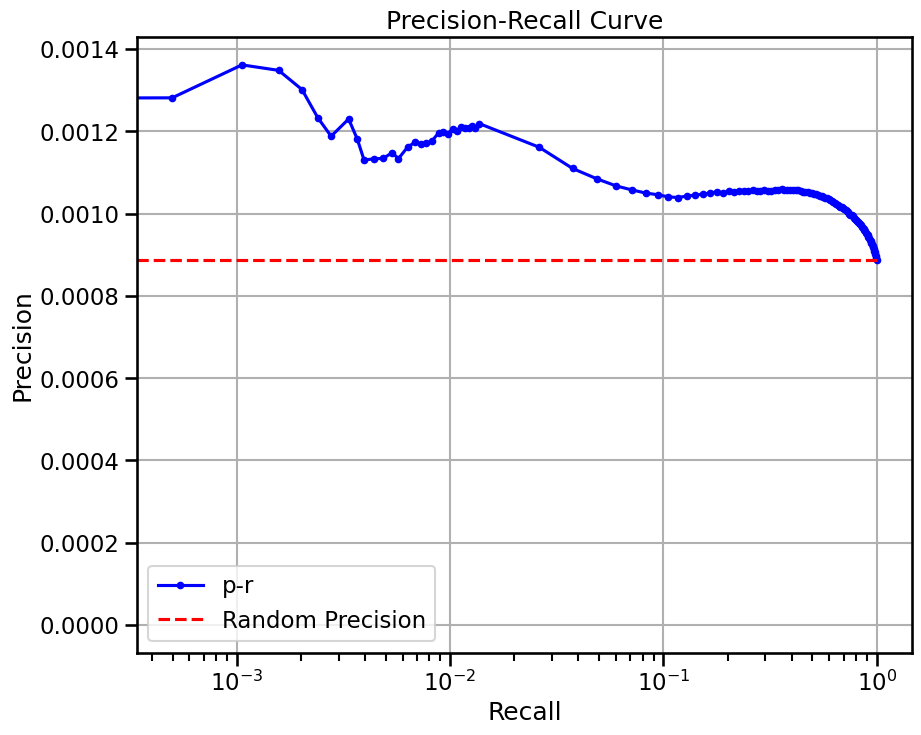


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:02<00:05,  2.93s/it]


 67%|██████▋   | 2/3 [00:05<00:02,  2.69s/it]


100%|██████████| 3/3 [00:06<00:00,  2.02s/it]


100%|██████████| 3/3 [00:06<00:00,  2.33s/it]

base enrichment


Top central genes: []


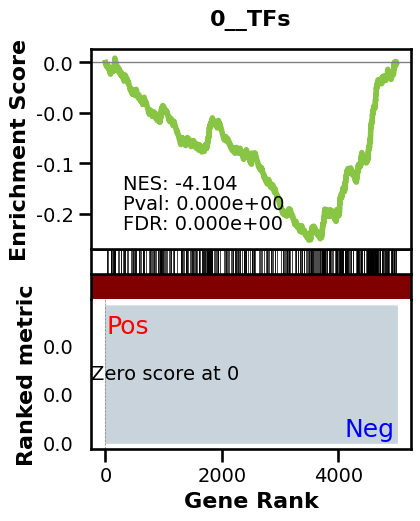

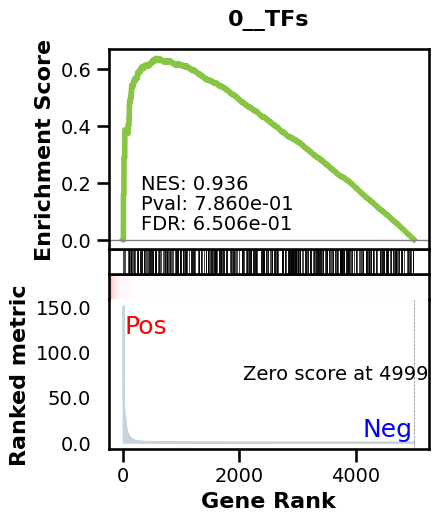

_________________________________________
TF specific enrichment


found some significant results for  28.571428571428573 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.69it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.28it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.33it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.36it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.23it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.33it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.34it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.42it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.36it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.47it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.41it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.33it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.25it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.36it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.99it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.53it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.05it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 53.67it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.47it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.74it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.11it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.74it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015010808477868317


EPR: 0.7007539009125866


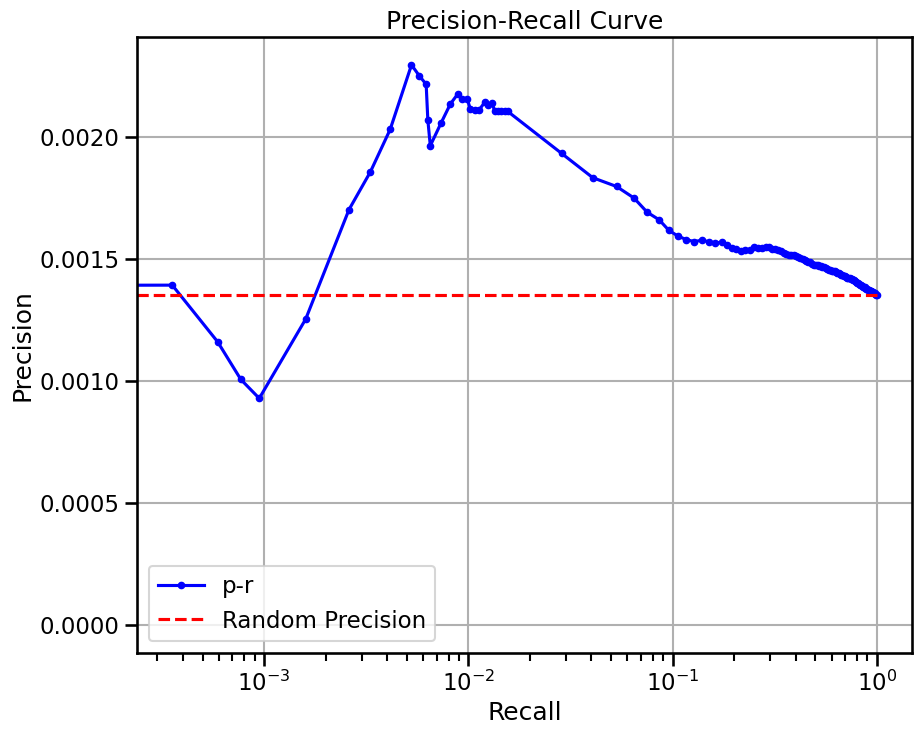

base enrichment


Top central genes: []


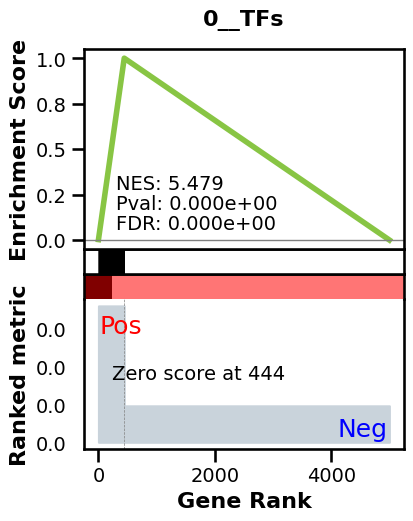

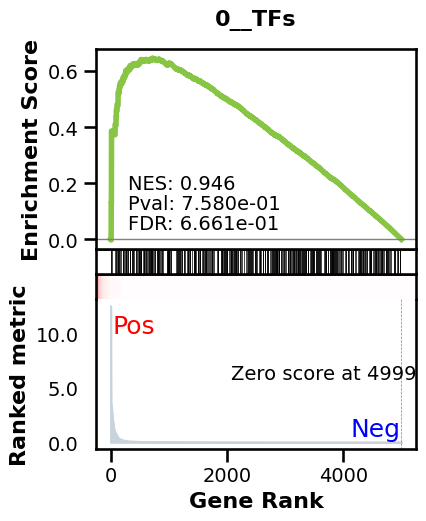

_________________________________________
TF specific enrichment


found some significant results for  14.285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.006564024211083035 
recall:  0.5291644460235684 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.42it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.12it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.21it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.20it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.23it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.22it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.32it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.25it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.33it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.39it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.44it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.26it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.21it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.24it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.88it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.92it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.80it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.98it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.02it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.05it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.18it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.15it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004813471944866269
EPR: 8.816314024356315


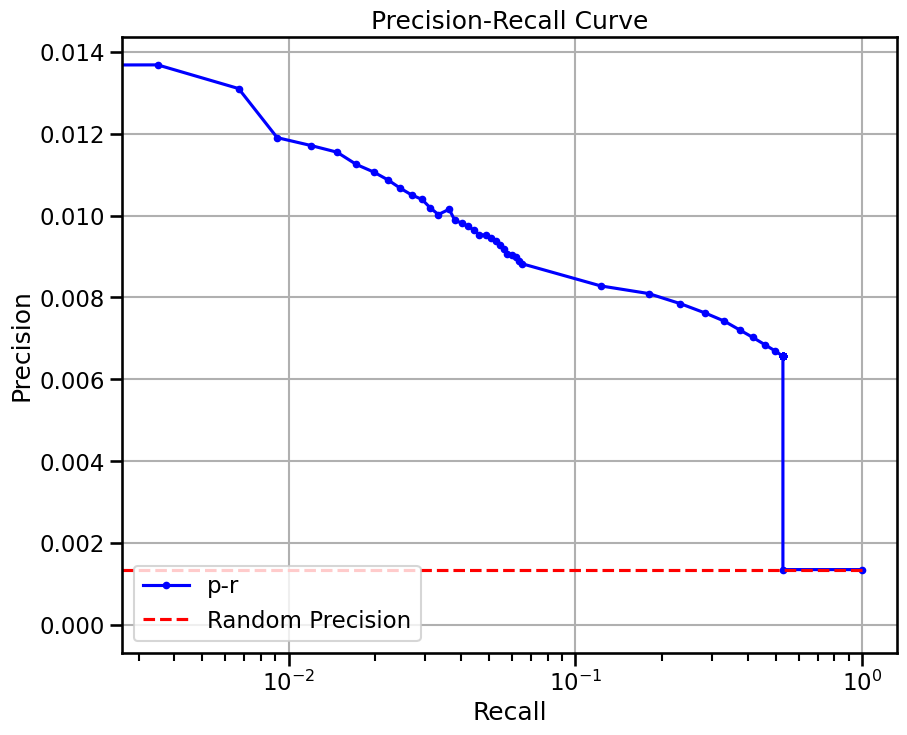

base enrichment


Top central genes: []


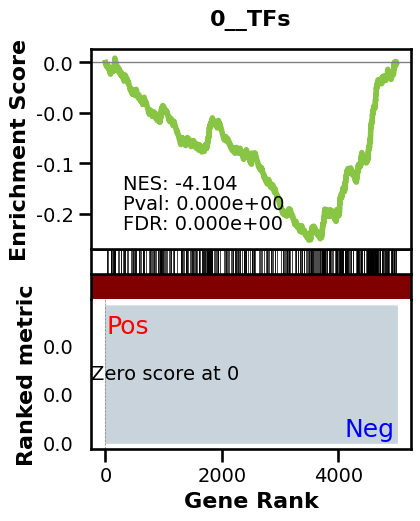

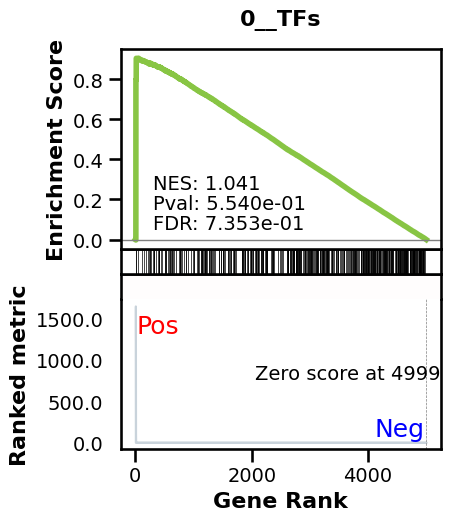

_________________________________________
TF specific enrichment


found some significant results for  11.904761904761905 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.86it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.10it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.03it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.05it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.99it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.17it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.15it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.11it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.15it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.21it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.27it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.32it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.26it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.13it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.23it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.17it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.17it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.20it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.22it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.12it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.15it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.12it/s]

Area Under Precision-Recall Curve (AUPRC):  0.002008126922430076
EPR: 2.5529365914315325


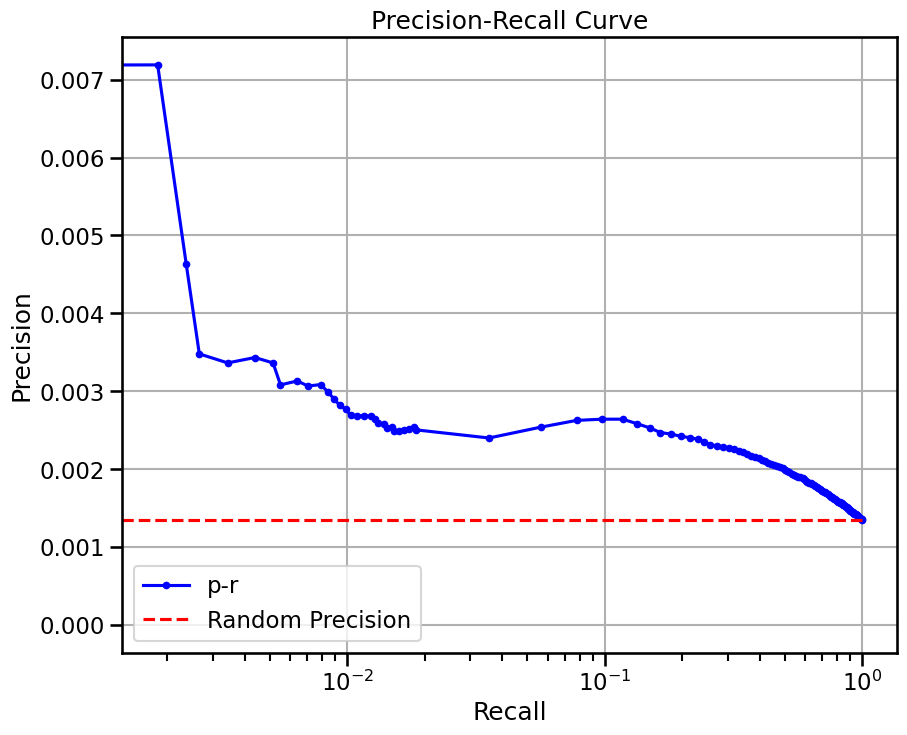

base enrichment


Top central genes: []


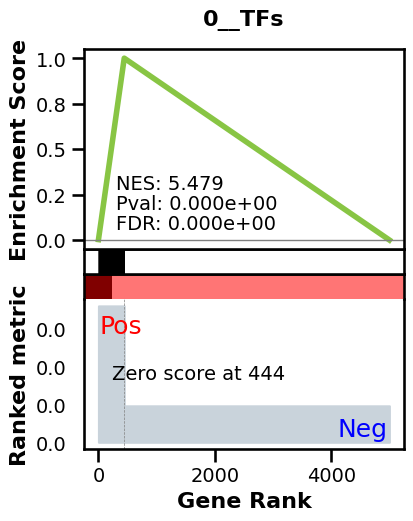

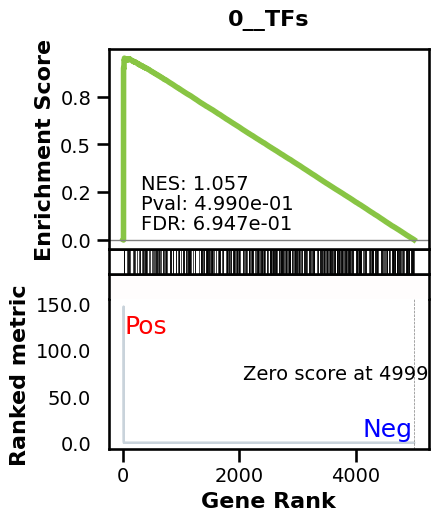

_________________________________________
TF specific enrichment


found some significant results for  9.523809523809524 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.006564024211083035 
recall:  0.5291644460235684 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.60it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.80it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.66it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.64it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.62it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.52it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.60it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.63it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.68it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.67it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.51it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.50it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.57it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.49it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.56it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.51it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.56it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.59it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.22it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.35it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.46it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.51it/s]

Area Under Precision-Recall Curve (AUPRC):  0.007608480097048152
EPR: 20.229272014048046


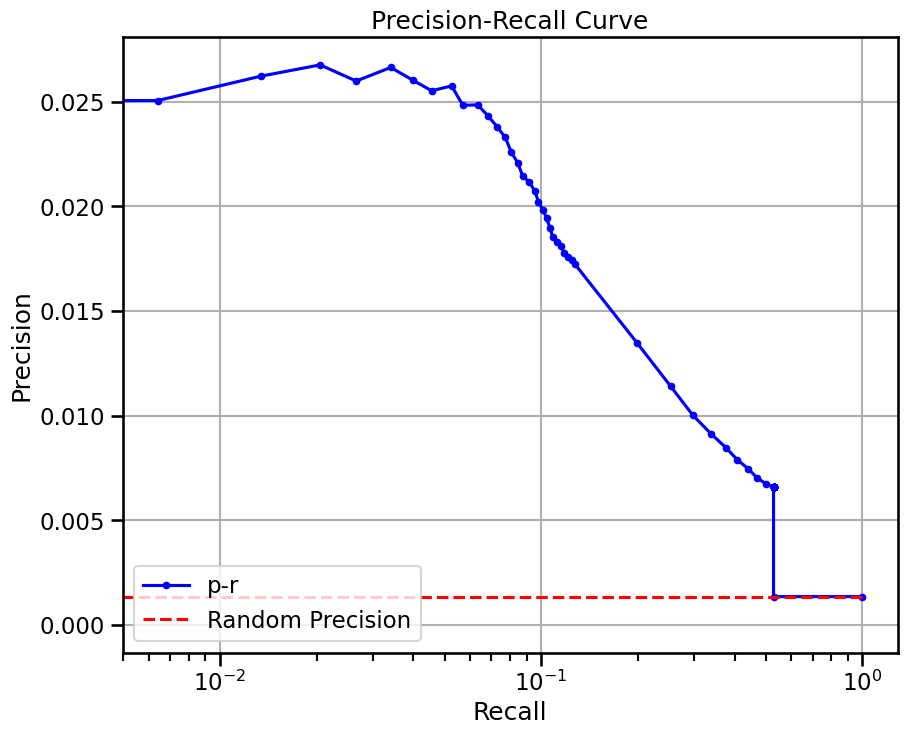


  0%|          | 0/8 [00:00<?, ?it/s]


 12%|█▎        | 1/8 [00:02<00:16,  2.39s/it]


 25%|██▌       | 2/8 [00:03<00:09,  1.52s/it]


 38%|███▊      | 3/8 [00:04<00:06,  1.24s/it]


 50%|█████     | 4/8 [00:05<00:04,  1.11s/it]


 62%|██████▎   | 5/8 [00:06<00:03,  1.04s/it]


 75%|███████▌  | 6/8 [00:08<00:03,  1.62s/it]


 88%|████████▊ | 7/8 [00:09<00:01,  1.39s/it]


100%|██████████| 8/8 [00:10<00:00,  1.21s/it]


100%|██████████| 8/8 [00:10<00:00,  1.35s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


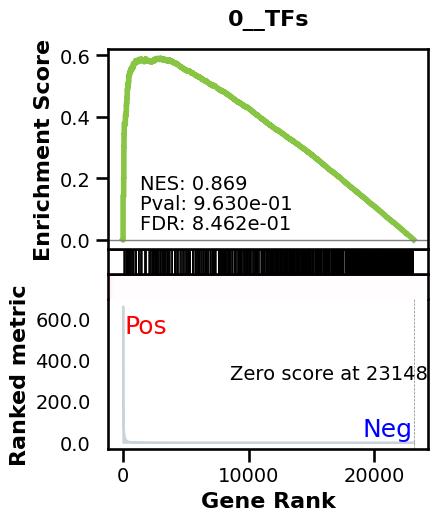

_________________________________________
TF specific enrichment


found some significant results for  68.75 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:44,  2.84it/s]


  2%|▏         | 2/128 [00:00<00:35,  3.58it/s]


  2%|▏         | 3/128 [00:00<00:32,  3.89it/s]


  3%|▎         | 4/128 [00:01<00:30,  4.07it/s]


  4%|▍         | 5/128 [00:01<00:29,  4.17it/s]


  5%|▍         | 6/128 [00:01<00:28,  4.24it/s]


  5%|▌         | 7/128 [00:01<00:28,  4.26it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.30it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.33it/s]


  8%|▊         | 10/128 [00:02<00:27,  4.33it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.34it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.35it/s]


 10%|█         | 13/128 [00:03<00:26,  4.36it/s]


 11%|█         | 14/128 [00:03<00:26,  4.35it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.35it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.35it/s]


 13%|█▎        | 17/128 [00:04<00:25,  4.35it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.35it/s]


 15%|█▍        | 19/128 [00:04<00:24,  4.37it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.37it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.36it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.36it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.35it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.36it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.35it/s]


 20%|██        | 26/128 [00:06<00:23,  4.36it/s]


 21%|██        | 27/128 [00:06<00:23,  4.36it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.37it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.35it/s]


 23%|██▎       | 30/128 [00:07<00:22,  4.36it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.37it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.36it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.37it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.36it/s]


 27%|██▋       | 35/128 [00:08<00:21,  4.37it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.35it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.37it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.36it/s]


 30%|███       | 39/128 [00:09<00:20,  4.37it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.36it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.37it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.35it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.35it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.37it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.36it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.37it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.36it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.37it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.36it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.36it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.36it/s]


 41%|████      | 52/128 [00:12<00:17,  4.36it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.36it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.35it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.37it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.36it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.37it/s]


 45%|████▌     | 58/128 [00:13<00:16,  4.37it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.37it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.36it/s]


 48%|████▊     | 61/128 [00:14<00:15,  4.36it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.37it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.36it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.37it/s]


 51%|█████     | 65/128 [00:15<00:14,  4.36it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.36it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.36it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.36it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.35it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.35it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.35it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.36it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.36it/s]


 58%|█████▊    | 74/128 [00:17<00:12,  4.36it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.36it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.35it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.36it/s]


 61%|██████    | 78/128 [00:18<00:11,  4.35it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.36it/s]


 62%|██████▎   | 80/128 [00:18<00:10,  4.37it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.36it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.36it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.37it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.36it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.35it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.36it/s]


 68%|██████▊   | 87/128 [00:20<00:09,  4.36it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.35it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.34it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.36it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.36it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.37it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.36it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.36it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.36it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.35it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.35it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.36it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.36it/s]


 78%|███████▊  | 100/128 [00:23<00:06,  4.36it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.37it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.36it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.36it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.36it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.36it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.36it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.36it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.37it/s]


 85%|████████▌ | 109/128 [00:25<00:04,  4.36it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.37it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.36it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.37it/s]


 88%|████████▊ | 113/128 [00:26<00:03,  4.36it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.35it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.35it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.34it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.35it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.34it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.35it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.36it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.36it/s]


 95%|█████████▌| 122/128 [00:28<00:01,  4.37it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.37it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.36it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.37it/s]


 98%|█████████▊| 126/128 [00:29<00:00,  4.38it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.36it/s]


100%|██████████| 128/128 [00:29<00:00,  4.34it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001065638419246908


EPR: 2.1545224126406977


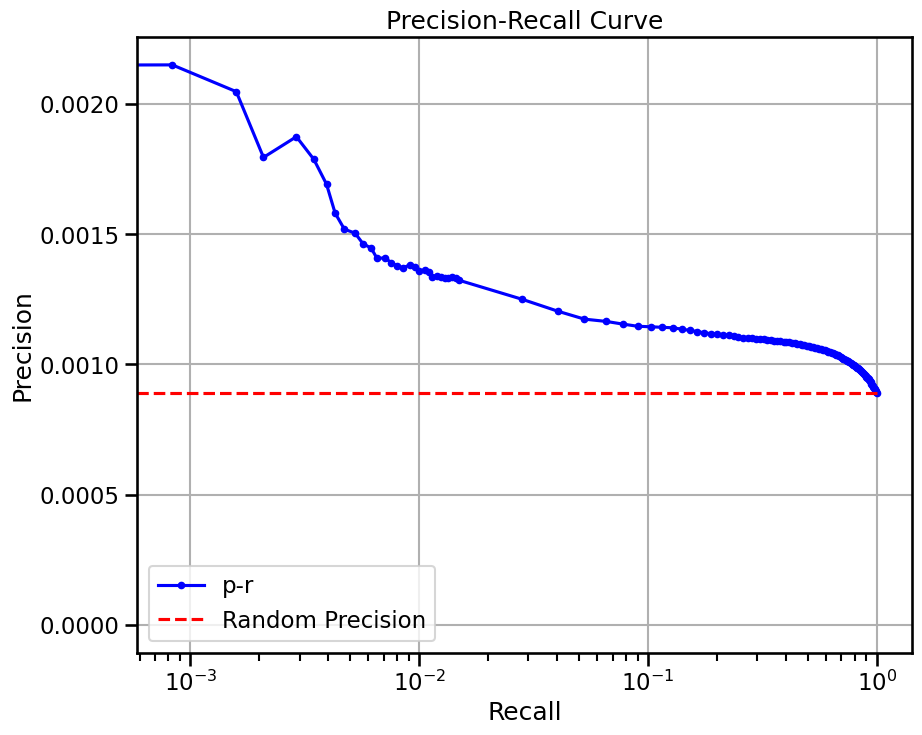


  0%|          | 0/16 [00:00<?, ?it/s]


  6%|▋         | 1/16 [00:02<00:42,  2.86s/it]


 12%|█▎        | 2/16 [00:04<00:26,  1.93s/it]


 19%|█▉        | 3/16 [00:07<00:34,  2.64s/it]


 25%|██▌       | 4/16 [00:08<00:25,  2.09s/it]


 31%|███▏      | 5/16 [00:10<00:19,  1.79s/it]


 38%|███▊      | 6/16 [00:11<00:16,  1.61s/it]


 44%|████▍     | 7/16 [00:12<00:13,  1.49s/it]


 50%|█████     | 8/16 [00:13<00:11,  1.42s/it]


 56%|█████▋    | 9/16 [00:15<00:09,  1.36s/it]


 62%|██████▎   | 10/16 [00:16<00:07,  1.30s/it]


 69%|██████▉   | 11/16 [00:17<00:06,  1.26s/it]


 75%|███████▌  | 12/16 [00:18<00:04,  1.22s/it]


 81%|████████▏ | 13/16 [00:19<00:03,  1.19s/it]


 88%|████████▊ | 14/16 [00:20<00:02,  1.19s/it]


 94%|█████████▍| 15/16 [00:22<00:01,  1.17s/it]


100%|██████████| 16/16 [00:22<00:00,  1.10s/it]


100%|██████████| 16/16 [00:23<00:00,  1.45s/it]

base enrichment


Top central genes: []


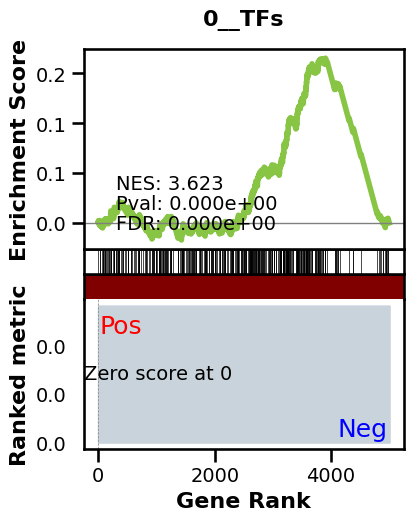

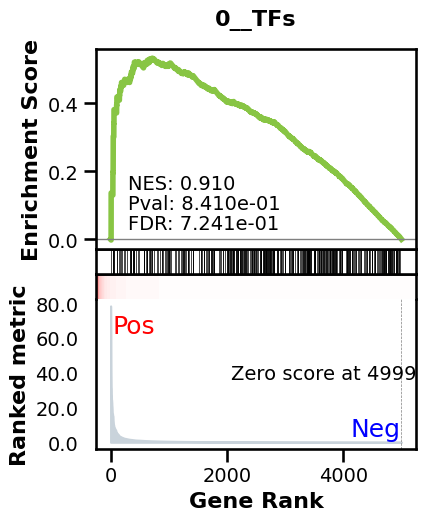

_________________________________________
TF specific enrichment


found some significant results for  45.833333333333336 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 91.65it/s]


 16%|█▌        | 20/128 [00:00<00:01, 92.31it/s]


 23%|██▎       | 30/128 [00:00<00:01, 91.86it/s]


 31%|███▏      | 40/128 [00:00<00:00, 92.12it/s]


 39%|███▉      | 50/128 [00:00<00:00, 92.24it/s]


 47%|████▋     | 60/128 [00:00<00:00, 92.24it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 92.41it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 92.30it/s]


 70%|███████   | 90/128 [00:00<00:00, 92.51it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 92.34it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 92.38it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 92.44it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 92.28it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016117640288171066
EPR: 1.2380216095418752


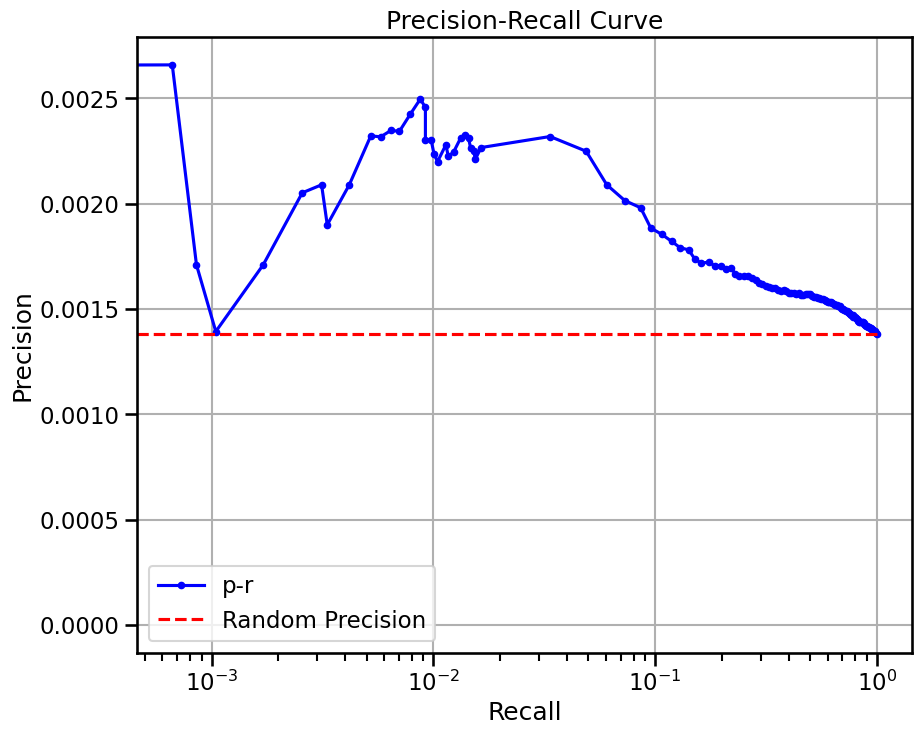

base enrichment


Top central genes: []


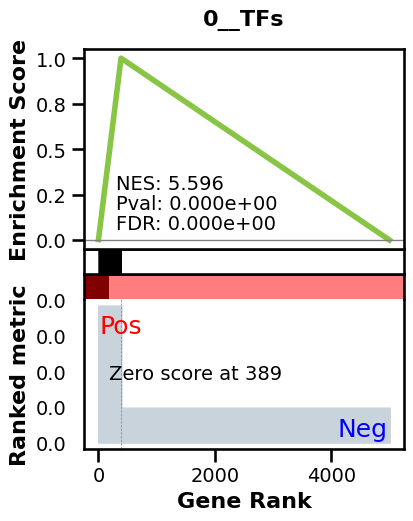

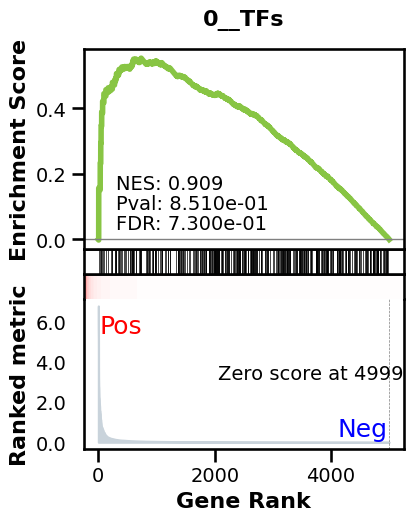

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.007077897576199607 
recall:  0.6106102306159248 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 91.49it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.71it/s]


 23%|██▎       | 30/128 [00:00<00:01, 91.61it/s]


 31%|███▏      | 40/128 [00:00<00:00, 92.03it/s]


 39%|███▉      | 50/128 [00:00<00:00, 92.32it/s]


 47%|████▋     | 60/128 [00:00<00:00, 92.54it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 92.57it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 92.49it/s]


 70%|███████   | 90/128 [00:00<00:00, 92.48it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 92.64it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 92.49it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 92.61it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 92.28it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005504694829964445
EPR: 8.847008524053855


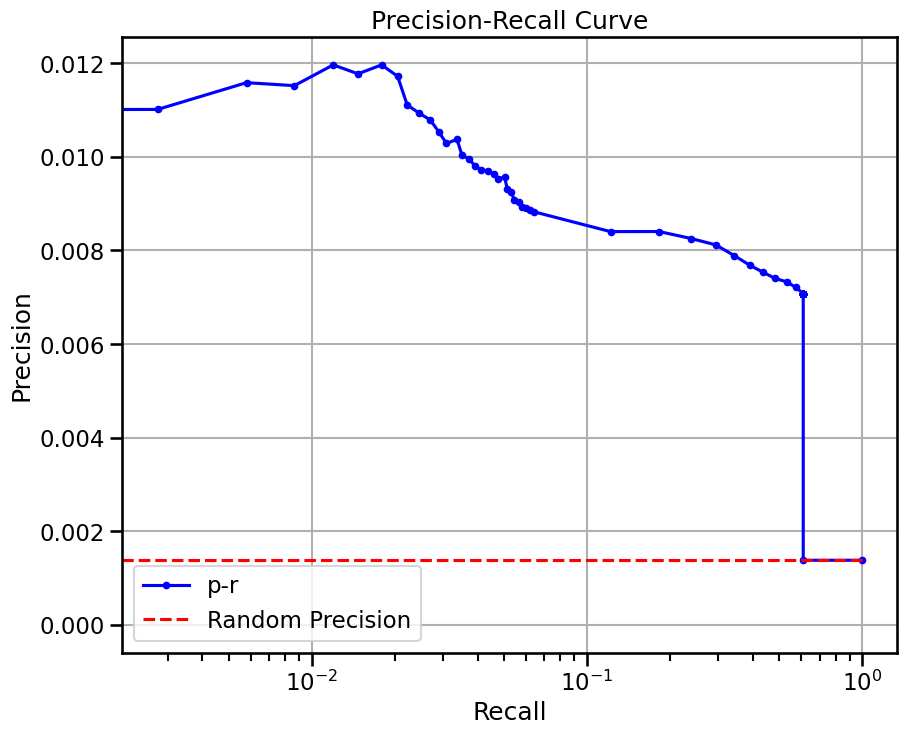

base enrichment


Top central genes: []


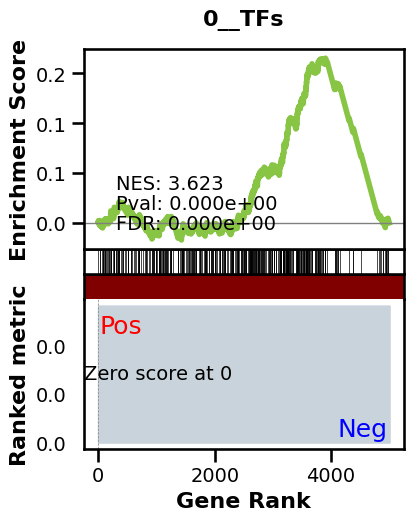

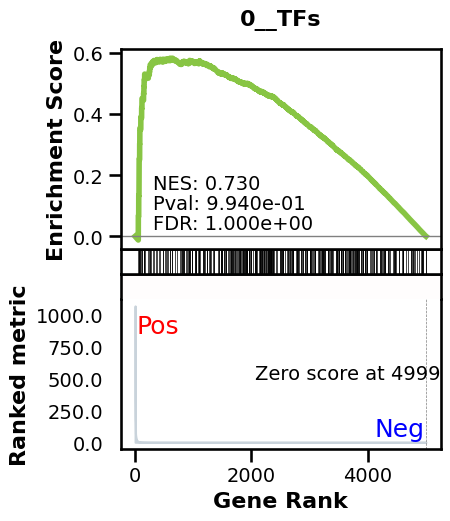

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 93.04it/s]


 16%|█▌        | 20/128 [00:00<00:01, 93.05it/s]


 23%|██▎       | 30/128 [00:00<00:01, 93.30it/s]


 31%|███▏      | 40/128 [00:00<00:00, 93.07it/s]


 39%|███▉      | 50/128 [00:00<00:00, 93.09it/s]


 47%|████▋     | 60/128 [00:00<00:00, 93.05it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 92.98it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 93.13it/s]


 70%|███████   | 90/128 [00:00<00:00, 93.03it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 93.19it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 93.26it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 93.29it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 93.12it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001295494316878427
EPR: 1.1000450161273083


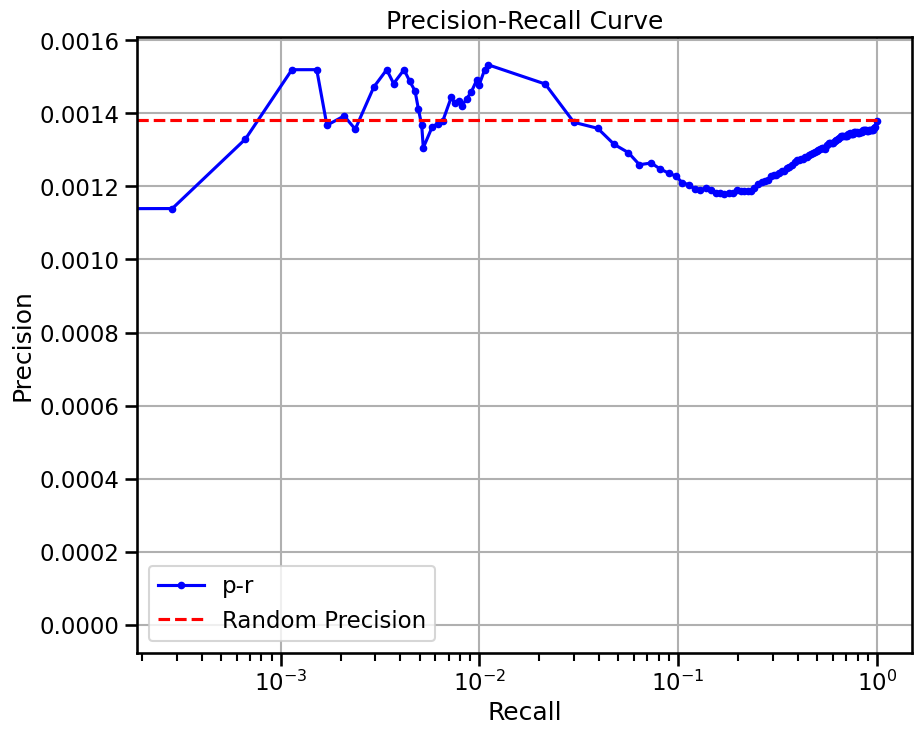

base enrichment


Top central genes: []


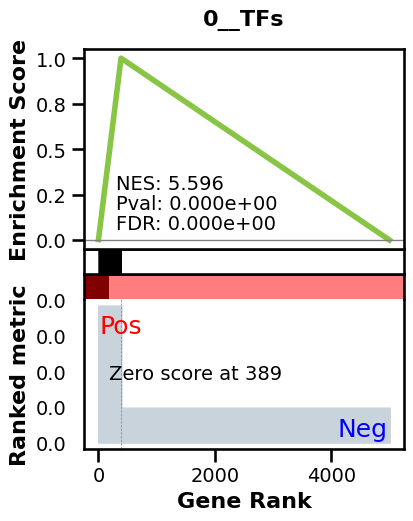

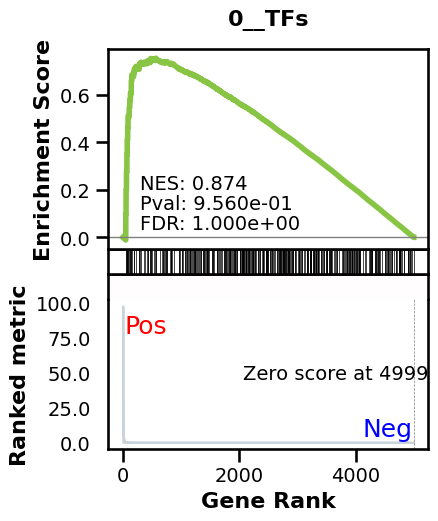

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.007077897576199607 
recall:  0.6106102306159248 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 91.48it/s]


 16%|█▌        | 20/128 [00:00<00:01, 92.42it/s]


 23%|██▎       | 30/128 [00:00<00:01, 92.52it/s]


 31%|███▏      | 40/128 [00:00<00:00, 92.48it/s]


 39%|███▉      | 50/128 [00:00<00:00, 92.69it/s]


 47%|████▋     | 60/128 [00:00<00:00, 92.36it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 92.38it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 92.43it/s]


 70%|███████   | 90/128 [00:00<00:00, 92.05it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 92.18it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 92.45it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 92.63it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 92.34it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004641379276269554
EPR: 5.921456966763229


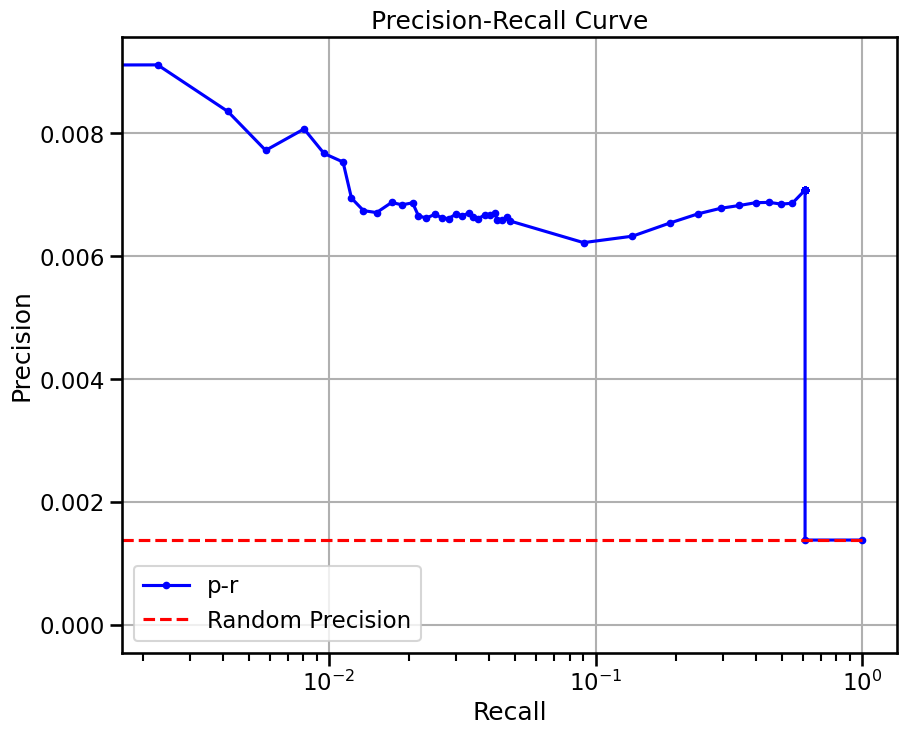


  0%|          | 0/6 [00:00<?, ?it/s]


 17%|█▋        | 1/6 [00:02<00:13,  2.73s/it]


 33%|███▎      | 2/6 [00:03<00:06,  1.66s/it]


 50%|█████     | 3/6 [00:04<00:03,  1.32s/it]


 67%|██████▋   | 4/6 [00:05<00:02,  1.15s/it]


 83%|████████▎ | 5/6 [00:06<00:01,  1.06s/it]


100%|██████████| 6/6 [00:07<00:00,  1.07it/s]


100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


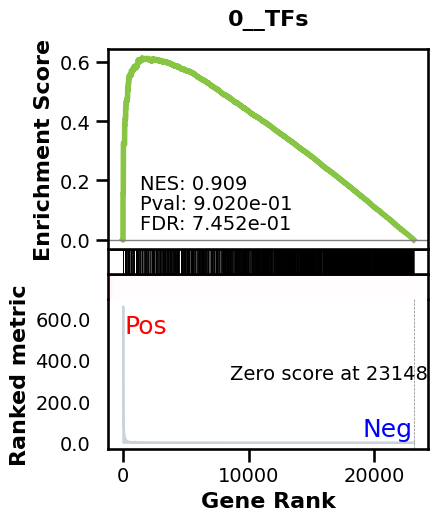

_________________________________________
TF specific enrichment


found some significant results for  62.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:32,  3.96it/s]


  2%|▏         | 2/128 [00:00<00:30,  4.18it/s]


  2%|▏         | 3/128 [00:00<00:29,  4.28it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.31it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.34it/s]


  5%|▍         | 6/128 [00:01<00:28,  4.33it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.34it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.33it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.34it/s]


  8%|▊         | 10/128 [00:02<00:27,  4.35it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.36it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.36it/s]


 10%|█         | 13/128 [00:03<00:26,  4.36it/s]


 11%|█         | 14/128 [00:03<00:26,  4.35it/s]


 12%|█▏        | 15/128 [00:03<00:26,  4.34it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.35it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.34it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.36it/s]


 15%|█▍        | 19/128 [00:04<00:25,  4.36it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.35it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.35it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.36it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.37it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.36it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.36it/s]


 20%|██        | 26/128 [00:05<00:23,  4.35it/s]


 21%|██        | 27/128 [00:06<00:23,  4.36it/s]


 22%|██▏       | 28/128 [00:06<00:23,  4.35it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.35it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.35it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.35it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.36it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.37it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.36it/s]


 27%|██▋       | 35/128 [00:08<00:21,  4.37it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.38it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.36it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.37it/s]


 30%|███       | 39/128 [00:08<00:20,  4.36it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.37it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.36it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.37it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.38it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.37it/s]


 35%|███▌      | 45/128 [00:10<00:18,  4.37it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.37it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.37it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.35it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.36it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.36it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.36it/s]


 41%|████      | 52/128 [00:11<00:17,  4.35it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.36it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.36it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.36it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.36it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.37it/s]


 45%|████▌     | 58/128 [00:13<00:16,  4.36it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.36it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.38it/s]


 48%|████▊     | 61/128 [00:14<00:15,  4.35it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.36it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.36it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.37it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.36it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.36it/s]


 52%|█████▏    | 67/128 [00:15<00:14,  4.35it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.36it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.36it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.36it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.37it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.36it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.36it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.36it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.35it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.36it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.37it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.36it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.36it/s]


 62%|██████▎   | 80/128 [00:18<00:11,  4.36it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.37it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.37it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.36it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.37it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.36it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.36it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.35it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.36it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.36it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.36it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.37it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.37it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.36it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.37it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.36it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.36it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.37it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.36it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.36it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.35it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.37it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.36it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.37it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.37it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.37it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.36it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.36it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.36it/s]


 85%|████████▌ | 109/128 [00:25<00:04,  4.36it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.35it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.35it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.35it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.35it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.36it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.36it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.35it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.36it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.20it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.25it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.28it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.30it/s]


 95%|█████████▌| 122/128 [00:28<00:01,  4.32it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.31it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.18it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.24it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.27it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.30it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.33it/s]


100%|██████████| 128/128 [00:29<00:00,  4.35it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001073464444106215


EPR: 2.0644207585963543


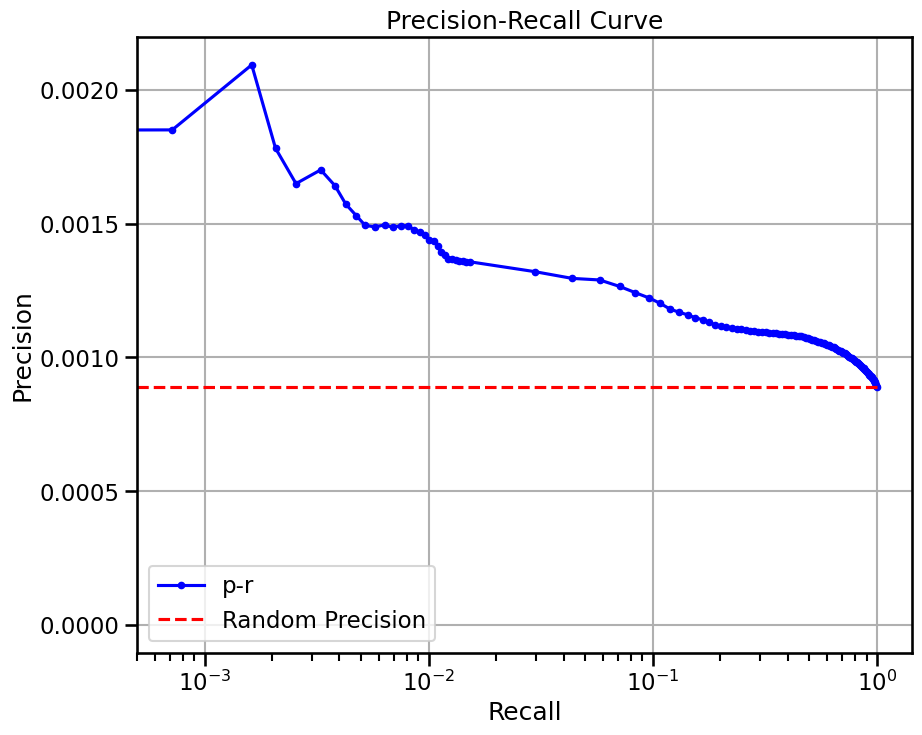


  0%|          | 0/12 [00:00<?, ?it/s]


  8%|▊         | 1/12 [00:03<00:40,  3.72s/it]


 17%|█▋        | 2/12 [00:05<00:23,  2.30s/it]


 25%|██▌       | 3/12 [00:06<00:16,  1.89s/it]


 33%|███▎      | 4/12 [00:07<00:13,  1.65s/it]


 42%|████▏     | 5/12 [00:10<00:14,  2.10s/it]


 50%|█████     | 6/12 [00:12<00:11,  1.96s/it]


 58%|█████▊    | 7/12 [00:13<00:08,  1.77s/it]


 67%|██████▋   | 8/12 [00:14<00:06,  1.60s/it]


 75%|███████▌  | 9/12 [00:16<00:04,  1.48s/it]


 83%|████████▎ | 10/12 [00:17<00:02,  1.40s/it]


 92%|█████████▏| 11/12 [00:18<00:01,  1.34s/it]


100%|██████████| 12/12 [00:19<00:00,  1.12s/it]


100%|██████████| 12/12 [00:19<00:00,  1.62s/it]

base enrichment


Top central genes: []


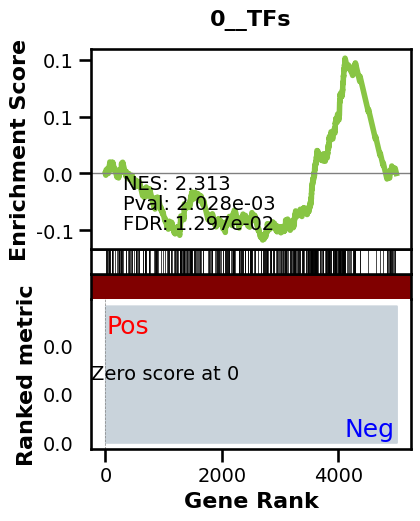

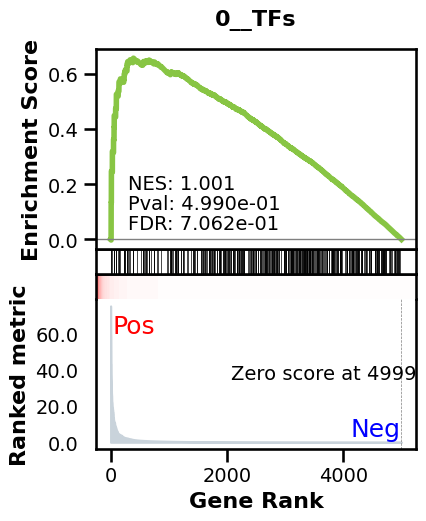

_________________________________________
TF specific enrichment


found some significant results for  16.666666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 62.42it/s]


 11%|█         | 14/128 [00:00<00:01, 61.78it/s]


 16%|█▋        | 21/128 [00:00<00:01, 61.57it/s]


 22%|██▏       | 28/128 [00:00<00:01, 61.35it/s]


 27%|██▋       | 35/128 [00:00<00:01, 61.29it/s]


 33%|███▎      | 42/128 [00:00<00:01, 61.17it/s]


 38%|███▊      | 49/128 [00:00<00:01, 61.10it/s]


 44%|████▍     | 56/128 [00:00<00:01, 61.67it/s]


 49%|████▉     | 63/128 [00:01<00:01, 61.48it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 61.41it/s]


 60%|██████    | 77/128 [00:01<00:00, 61.30it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 61.27it/s]


 71%|███████   | 91/128 [00:01<00:00, 61.33it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 61.26it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 61.58it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 61.63it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 61.65it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 61.71it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 61.45it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017304579596870758
EPR: 1.043394828548237


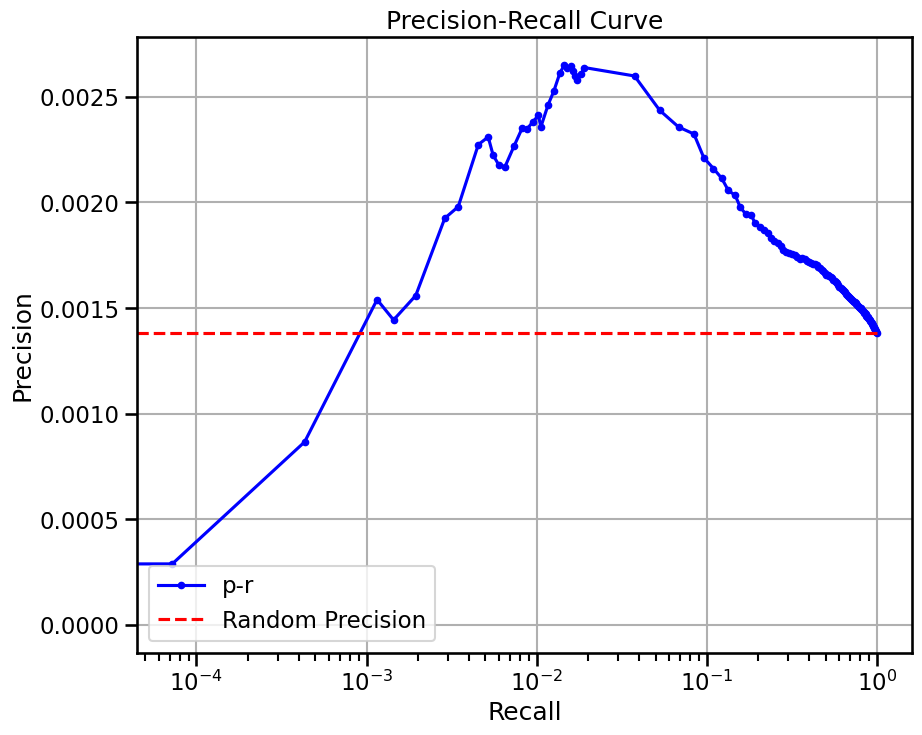

base enrichment


Top central genes: []


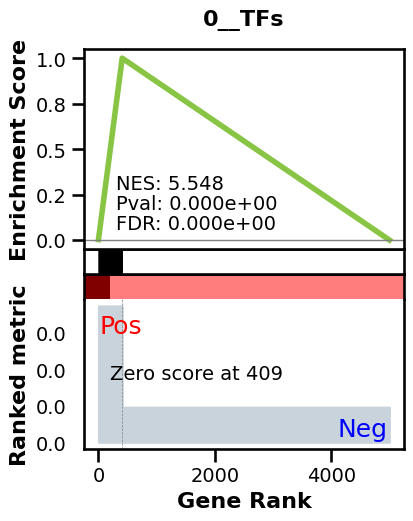

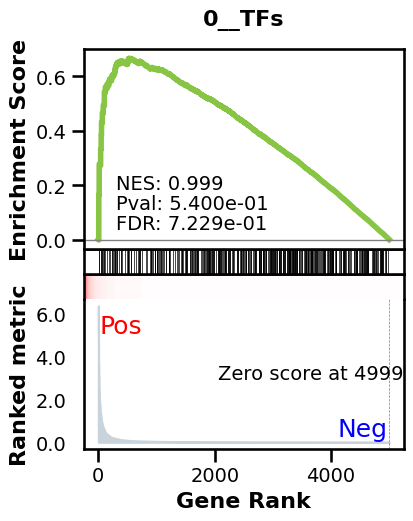

_________________________________________
TF specific enrichment


found some significant results for  1.8518518518518519 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.006449082630843438 
recall:  0.5156058530959418 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 69.17it/s]


 11%|█         | 14/128 [00:00<00:01, 69.14it/s]


 16%|█▋        | 21/128 [00:00<00:01, 69.36it/s]


 22%|██▏       | 28/128 [00:00<00:01, 69.20it/s]


 27%|██▋       | 35/128 [00:00<00:01, 69.23it/s]


 33%|███▎      | 42/128 [00:00<00:01, 69.30it/s]


 38%|███▊      | 49/128 [00:00<00:01, 69.51it/s]


 44%|████▍     | 56/128 [00:00<00:01, 69.37it/s]


 49%|████▉     | 63/128 [00:00<00:00, 69.34it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 69.46it/s]


 60%|██████    | 77/128 [00:01<00:00, 69.30it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 69.45it/s]


 71%|███████   | 91/128 [00:01<00:00, 69.46it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 69.21it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 69.30it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 69.17it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 69.36it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 69.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 69.31it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005010354348306863
EPR: 9.228220400660664


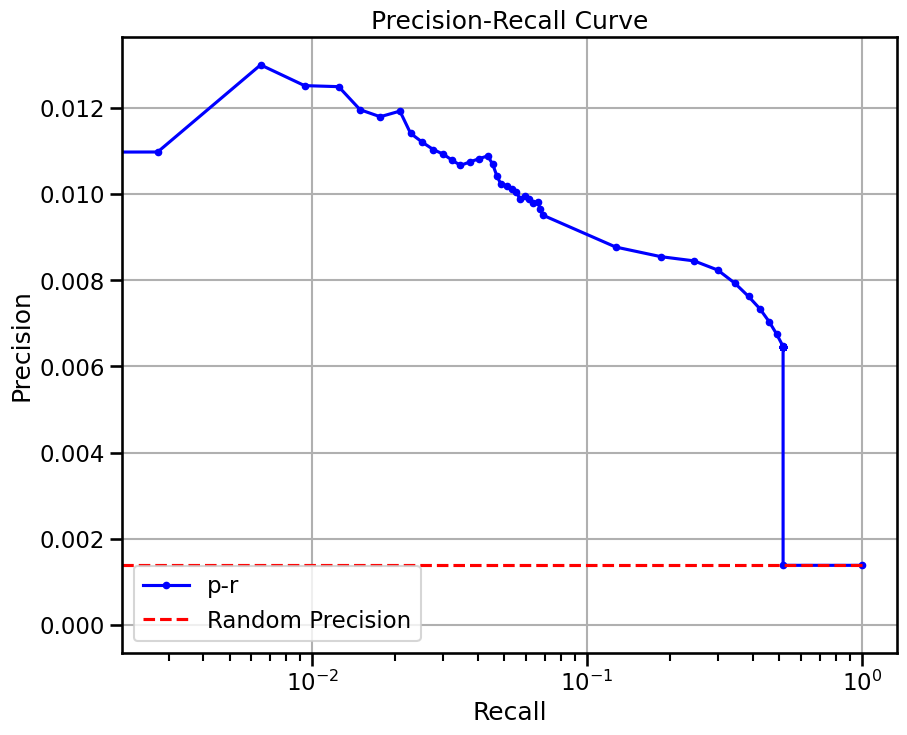

base enrichment


Top central genes: []


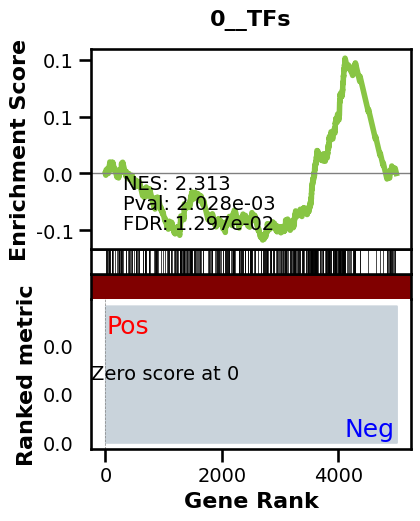

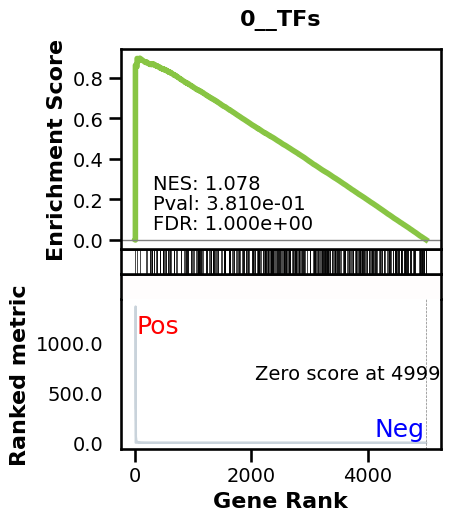

_________________________________________
TF specific enrichment


found some significant results for  7.407407407407407 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 67.31it/s]


 11%|█         | 14/128 [00:00<00:01, 67.74it/s]


 16%|█▋        | 21/128 [00:00<00:01, 67.53it/s]


 22%|██▏       | 28/128 [00:00<00:01, 67.62it/s]


 27%|██▋       | 35/128 [00:00<00:01, 67.72it/s]


 33%|███▎      | 42/128 [00:00<00:01, 67.67it/s]


 38%|███▊      | 49/128 [00:00<00:01, 67.81it/s]


 44%|████▍     | 56/128 [00:00<00:01, 67.65it/s]


 49%|████▉     | 63/128 [00:00<00:00, 67.91it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 67.77it/s]


 60%|██████    | 77/128 [00:01<00:00, 67.69it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 67.68it/s]


 71%|███████   | 91/128 [00:01<00:00, 67.80it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 67.75it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 67.56it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 67.67it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 67.64it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 67.73it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 67.65it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014410464893459727
EPR: 2.989634965619781


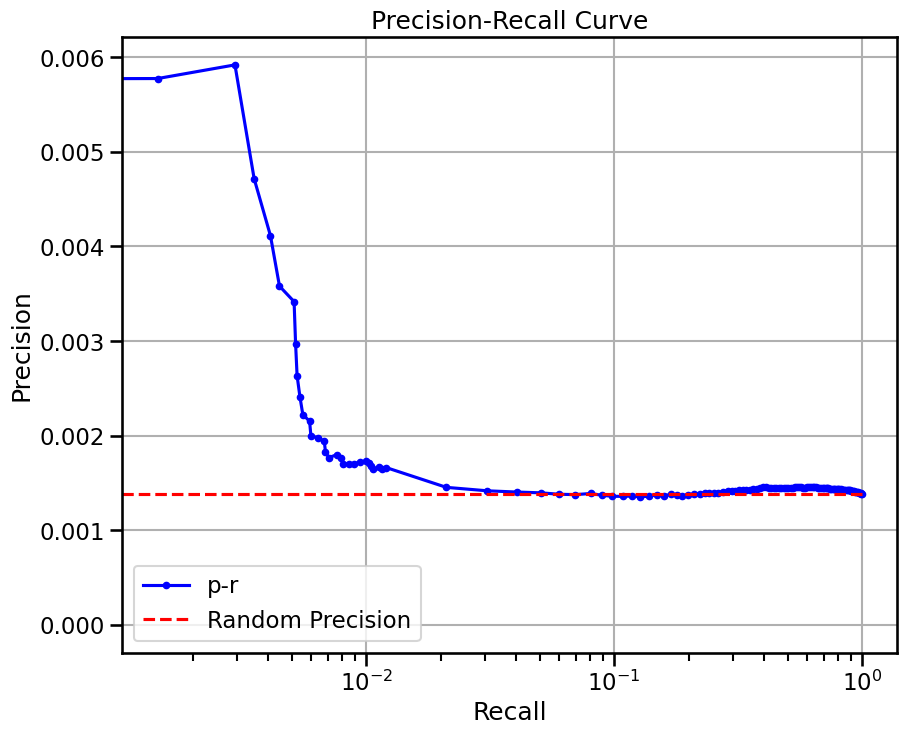

base enrichment


Top central genes: []


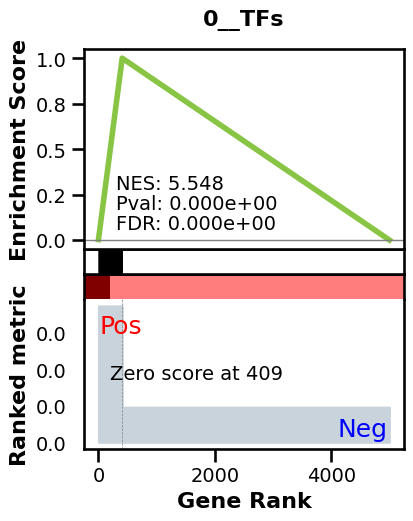

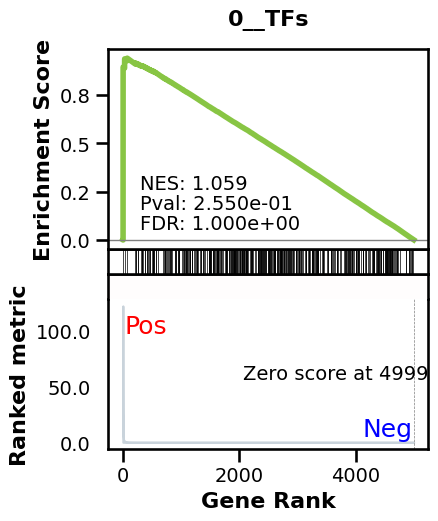

_________________________________________
TF specific enrichment


found some significant results for  7.407407407407407 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.006449082630843438 
recall:  0.5156058530959418 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 69.72it/s]


 12%|█▏        | 15/128 [00:00<00:01, 69.90it/s]


 18%|█▊        | 23/128 [00:00<00:01, 70.01it/s]


 24%|██▍       | 31/128 [00:00<00:01, 70.07it/s]


 30%|███       | 39/128 [00:00<00:01, 70.00it/s]


 37%|███▋      | 47/128 [00:00<00:01, 70.08it/s]


 43%|████▎     | 55/128 [00:00<00:01, 70.08it/s]


 49%|████▉     | 63/128 [00:00<00:00, 69.88it/s]


 55%|█████▌    | 71/128 [00:01<00:00, 69.94it/s]


 61%|██████    | 78/128 [00:01<00:00, 69.85it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 69.89it/s]


 72%|███████▏  | 92/128 [00:01<00:00, 47.45it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 52.38it/s]


 83%|████████▎ | 106/128 [00:01<00:00, 56.52it/s]


 88%|████████▊ | 113/128 [00:01<00:00, 59.93it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 62.59it/s]


 99%|█████████▉| 127/128 [00:01<00:00, 64.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 64.13it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004121969279533667
EPR: 4.796520817419393


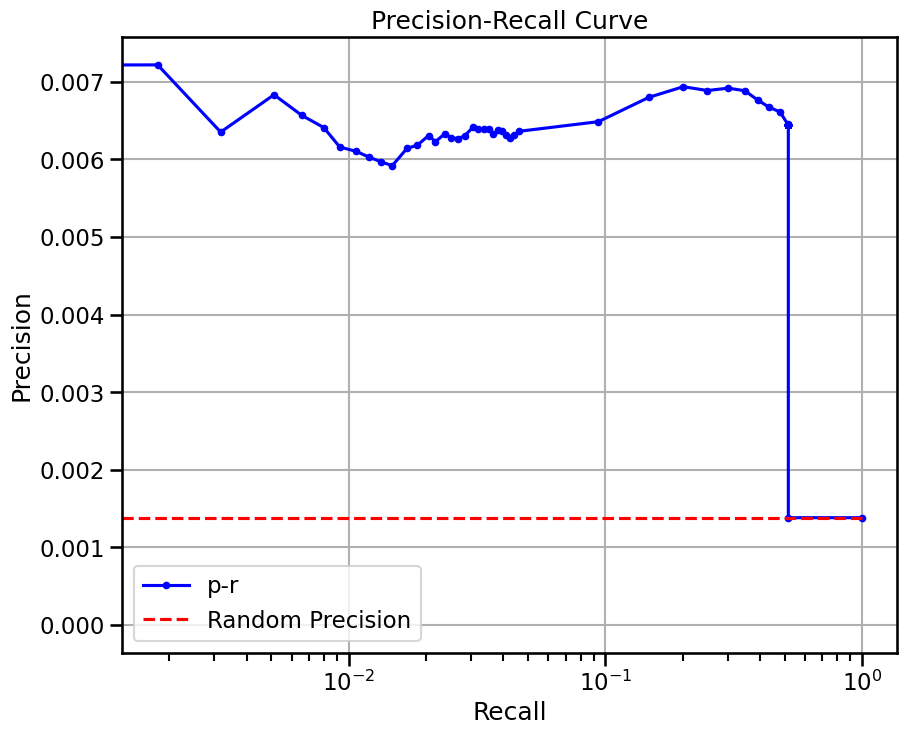


  0%|          | 0/32 [00:00<?, ?it/s]


  3%|▎         | 1/32 [00:02<01:15,  2.44s/it]


  6%|▋         | 2/32 [00:04<01:15,  2.50s/it]


  9%|▉         | 3/32 [00:05<00:51,  1.79s/it]


 12%|█▎        | 4/32 [00:06<00:40,  1.46s/it]


 16%|█▌        | 5/32 [00:07<00:34,  1.27s/it]


 19%|█▉        | 6/32 [00:08<00:30,  1.16s/it]


 22%|██▏       | 7/32 [00:09<00:27,  1.09s/it]


 25%|██▌       | 8/32 [00:10<00:24,  1.04s/it]


 28%|██▊       | 9/32 [00:11<00:23,  1.01s/it]


 31%|███▏      | 10/32 [00:12<00:21,  1.01it/s]


 34%|███▍      | 11/32 [00:13<00:20,  1.03it/s]


 38%|███▊      | 12/32 [00:14<00:19,  1.04it/s]


 41%|████      | 13/32 [00:15<00:18,  1.05it/s]


 44%|████▍     | 14/32 [00:16<00:17,  1.05it/s]


 47%|████▋     | 15/32 [00:17<00:16,  1.06it/s]


 50%|█████     | 16/32 [00:18<00:15,  1.06it/s]


 53%|█████▎    | 17/32 [00:19<00:14,  1.06it/s]


 56%|█████▋    | 18/32 [00:20<00:13,  1.07it/s]


 59%|█████▉    | 19/32 [00:20<00:12,  1.07it/s]


 62%|██████▎   | 20/32 [00:21<00:11,  1.07it/s]


 66%|██████▌   | 21/32 [00:22<00:10,  1.07it/s]


 69%|██████▉   | 22/32 [00:23<00:09,  1.08it/s]


 72%|███████▏  | 23/32 [00:24<00:08,  1.08it/s]


 75%|███████▌  | 24/32 [00:25<00:07,  1.08it/s]


 78%|███████▊  | 25/32 [00:26<00:06,  1.08it/s]


 81%|████████▏ | 26/32 [00:27<00:05,  1.09it/s]


 84%|████████▍ | 27/32 [00:28<00:04,  1.08it/s]


 88%|████████▊ | 28/32 [00:29<00:03,  1.08it/s]


 91%|█████████ | 29/32 [00:30<00:02,  1.08it/s]


 94%|█████████▍| 30/32 [00:31<00:01,  1.08it/s]


 97%|█████████▋| 31/32 [00:32<00:00,  1.08it/s]


100%|██████████| 32/32 [00:32<00:00,  1.08it/s]


100%|██████████| 32/32 [00:33<00:00,  1.04s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


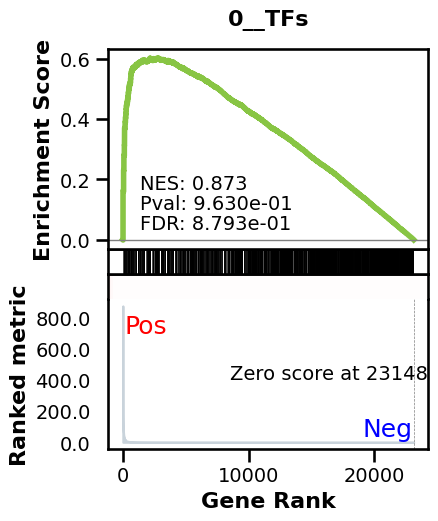

_________________________________________
TF specific enrichment


found some significant results for  64.28571428571429 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:28,  4.41it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.39it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.39it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.39it/s]


  4%|▍         | 5/128 [00:01<00:27,  4.40it/s]


  5%|▍         | 6/128 [00:01<00:27,  4.39it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.40it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.41it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.40it/s]


  8%|▊         | 10/128 [00:02<00:26,  4.40it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.40it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.40it/s]


 10%|█         | 13/128 [00:02<00:26,  4.40it/s]


 11%|█         | 14/128 [00:03<00:25,  4.39it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.39it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.39it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.40it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.40it/s]


 15%|█▍        | 19/128 [00:04<00:24,  4.39it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.39it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.38it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.39it/s]


 18%|█▊        | 23/128 [00:05<00:23,  4.39it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.39it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.38it/s]


 20%|██        | 26/128 [00:05<00:23,  4.39it/s]


 21%|██        | 27/128 [00:06<00:23,  4.39it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.39it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.38it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.38it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.37it/s]


 25%|██▌       | 32/128 [00:07<00:21,  4.38it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.37it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.38it/s]


 27%|██▋       | 35/128 [00:07<00:21,  4.38it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.37it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.37it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.37it/s]


 30%|███       | 39/128 [00:08<00:20,  4.38it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.38it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.38it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.38it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.38it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.38it/s]


 35%|███▌      | 45/128 [00:10<00:18,  4.39it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.40it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.41it/s]


 38%|███▊      | 48/128 [00:10<00:18,  4.40it/s]


 38%|███▊      | 49/128 [00:11<00:17,  4.41it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.41it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.40it/s]


 41%|████      | 52/128 [00:11<00:17,  4.41it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.41it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.41it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.41it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.41it/s]


 45%|████▍     | 57/128 [00:12<00:16,  4.40it/s]


 45%|████▌     | 58/128 [00:13<00:15,  4.41it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.41it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.40it/s]


 48%|████▊     | 61/128 [00:13<00:15,  4.40it/s]


 48%|████▊     | 62/128 [00:14<00:14,  4.41it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.41it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.42it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.42it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.41it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.42it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.42it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.42it/s]


 55%|█████▍    | 70/128 [00:15<00:13,  4.41it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.25it/s]


 56%|█████▋    | 72/128 [00:16<00:13,  4.30it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.33it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.35it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.37it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.38it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.32it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.25it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.30it/s]


 62%|██████▎   | 80/128 [00:18<00:11,  4.33it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.35it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.37it/s]


 65%|██████▍   | 83/128 [00:18<00:10,  4.38it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.39it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.39it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.40it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.38it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.36it/s]


 70%|██████▉   | 89/128 [00:20<00:09,  4.31it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.32it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.31it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.31it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.30it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.31it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.30it/s]


 75%|███████▌  | 96/128 [00:21<00:07,  4.30it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.31it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.34it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.35it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.34it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.35it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.37it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.38it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.38it/s]


 82%|████████▏ | 105/128 [00:23<00:05,  4.39it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.39it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.31it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.19it/s]


 85%|████████▌ | 109/128 [00:24<00:04,  4.26it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.29it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.33it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.36it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.31it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.16it/s]


 90%|████████▉ | 115/128 [00:26<00:03,  4.22it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.28it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.30it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.34it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.35it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.23it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.27it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.31it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.32it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.33it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.33it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.34it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.36it/s]


100%|██████████| 128/128 [00:29<00:00,  4.36it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010839794415234425


EPR: 2.1217548463881286


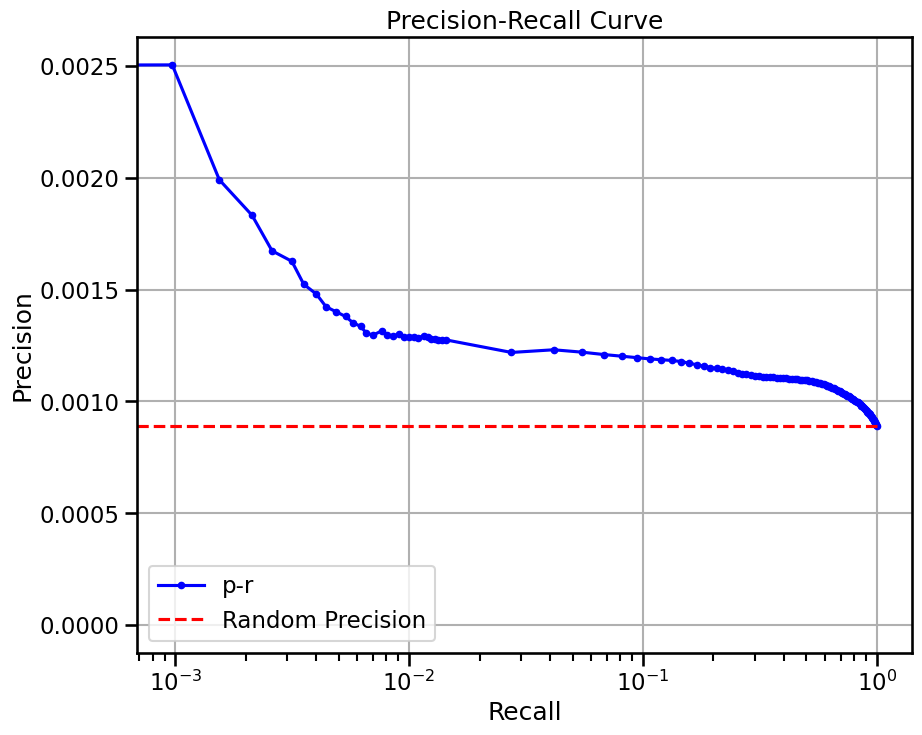


  0%|          | 0/64 [00:00<?, ?it/s]


  2%|▏         | 1/64 [00:07<07:28,  7.12s/it]


  3%|▎         | 2/64 [00:08<03:49,  3.71s/it]


  5%|▍         | 3/64 [00:09<02:39,  2.62s/it]


  6%|▋         | 4/64 [00:11<02:05,  2.09s/it]


  8%|▊         | 5/64 [00:12<01:45,  1.79s/it]


  9%|▉         | 6/64 [00:13<01:33,  1.61s/it]


 11%|█         | 7/64 [00:14<01:25,  1.49s/it]


 12%|█▎        | 8/64 [00:16<01:19,  1.42s/it]


 14%|█▍        | 9/64 [00:17<01:15,  1.37s/it]


 16%|█▌        | 10/64 [00:18<01:11,  1.33s/it]


 17%|█▋        | 11/64 [00:19<01:09,  1.30s/it]


 19%|█▉        | 12/64 [00:21<01:06,  1.28s/it]


 20%|██        | 13/64 [00:22<01:04,  1.26s/it]


 22%|██▏       | 14/64 [00:23<01:02,  1.24s/it]


 23%|██▎       | 15/64 [00:24<01:00,  1.23s/it]


 25%|██▌       | 16/64 [00:25<00:58,  1.22s/it]


 27%|██▋       | 17/64 [00:27<00:57,  1.22s/it]


 28%|██▊       | 18/64 [00:28<00:55,  1.21s/it]


 30%|██▉       | 19/64 [00:29<00:54,  1.21s/it]


 31%|███▏      | 20/64 [00:30<00:53,  1.21s/it]


 33%|███▎      | 21/64 [00:31<00:51,  1.21s/it]


 34%|███▍      | 22/64 [00:33<00:50,  1.21s/it]


 36%|███▌      | 23/64 [00:34<00:49,  1.21s/it]


 38%|███▊      | 24/64 [00:35<00:48,  1.21s/it]


 39%|███▉      | 25/64 [00:36<00:46,  1.20s/it]


 41%|████      | 26/64 [00:37<00:45,  1.20s/it]


 42%|████▏     | 27/64 [00:39<00:44,  1.21s/it]


 44%|████▍     | 28/64 [00:40<00:43,  1.21s/it]


 45%|████▌     | 29/64 [00:41<00:42,  1.21s/it]


 47%|████▋     | 30/64 [00:42<00:41,  1.21s/it]


 48%|████▊     | 31/64 [00:44<00:40,  1.24s/it]


 50%|█████     | 32/64 [00:45<00:39,  1.23s/it]


 52%|█████▏    | 33/64 [00:46<00:37,  1.22s/it]


 53%|█████▎    | 34/64 [00:47<00:36,  1.21s/it]


 55%|█████▍    | 35/64 [00:48<00:35,  1.21s/it]


 56%|█████▋    | 36/64 [00:50<00:33,  1.20s/it]


 58%|█████▊    | 37/64 [00:51<00:32,  1.20s/it]


 59%|█████▉    | 38/64 [00:52<00:31,  1.20s/it]


 61%|██████    | 39/64 [00:53<00:30,  1.20s/it]


 62%|██████▎   | 40/64 [00:54<00:28,  1.20s/it]


 64%|██████▍   | 41/64 [00:56<00:27,  1.20s/it]


 66%|██████▌   | 42/64 [00:57<00:26,  1.20s/it]


 67%|██████▋   | 43/64 [00:58<00:25,  1.20s/it]


 69%|██████▉   | 44/64 [00:59<00:23,  1.20s/it]


 70%|███████   | 45/64 [01:00<00:22,  1.20s/it]


 72%|███████▏  | 46/64 [01:02<00:21,  1.20s/it]


 73%|███████▎  | 47/64 [01:03<00:20,  1.20s/it]


 75%|███████▌  | 48/64 [01:04<00:19,  1.20s/it]


 77%|███████▋  | 49/64 [01:05<00:17,  1.19s/it]


 78%|███████▊  | 50/64 [01:06<00:16,  1.19s/it]


 80%|███████▉  | 51/64 [01:07<00:15,  1.18s/it]


 81%|████████▏ | 52/64 [01:09<00:14,  1.17s/it]


 83%|████████▎ | 53/64 [01:10<00:12,  1.17s/it]


 84%|████████▍ | 54/64 [01:11<00:11,  1.17s/it]


 86%|████████▌ | 55/64 [01:12<00:10,  1.17s/it]


 88%|████████▊ | 56/64 [01:13<00:09,  1.17s/it]


 89%|████████▉ | 57/64 [01:14<00:08,  1.17s/it]


 91%|█████████ | 58/64 [01:16<00:06,  1.16s/it]


 92%|█████████▏| 59/64 [01:17<00:05,  1.16s/it]


 94%|█████████▍| 60/64 [01:18<00:04,  1.16s/it]


 95%|█████████▌| 61/64 [01:19<00:03,  1.16s/it]


 97%|█████████▋| 62/64 [01:20<00:02,  1.16s/it]


 98%|█████████▊| 63/64 [01:21<00:01,  1.16s/it]


100%|██████████| 64/64 [01:23<00:00,  1.16s/it]


100%|██████████| 64/64 [01:23<00:00,  1.30s/it]

base enrichment


Top central genes: []


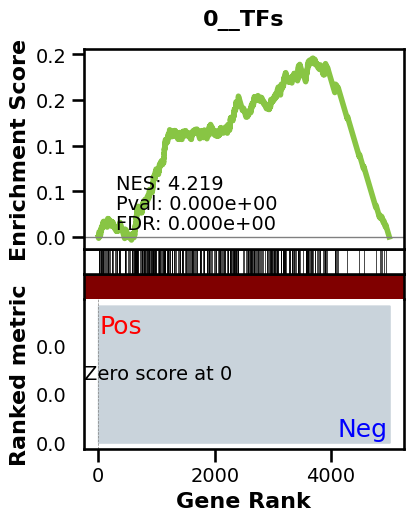

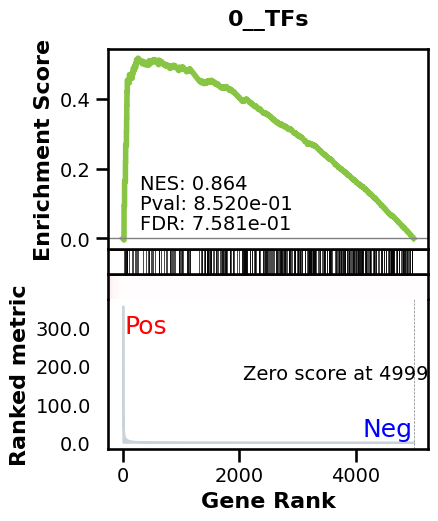

_________________________________________
TF specific enrichment


found some significant results for  36.36363636363637 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 86.13it/s]


 14%|█▍        | 18/128 [00:00<00:01, 86.34it/s]


 21%|██        | 27/128 [00:00<00:01, 86.35it/s]


 28%|██▊       | 36/128 [00:00<00:01, 86.31it/s]


 35%|███▌      | 45/128 [00:00<00:00, 86.33it/s]


 42%|████▏     | 54/128 [00:00<00:00, 86.28it/s]


 49%|████▉     | 63/128 [00:00<00:00, 86.33it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 86.34it/s]


 63%|██████▎   | 81/128 [00:00<00:00, 86.38it/s]


 70%|███████   | 90/128 [00:01<00:00, 86.04it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 86.09it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 86.16it/s]


 91%|█████████▏| 117/128 [00:01<00:00, 86.25it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 86.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 86.18it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001366047064516947
EPR: 0.6575809985125273


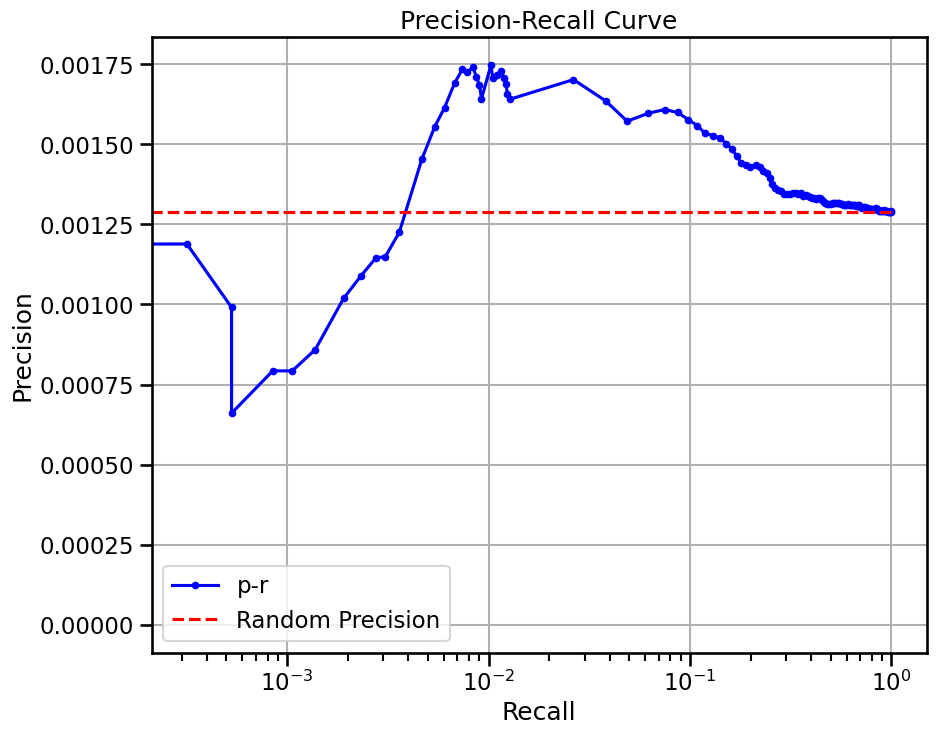

base enrichment


Top central genes: []


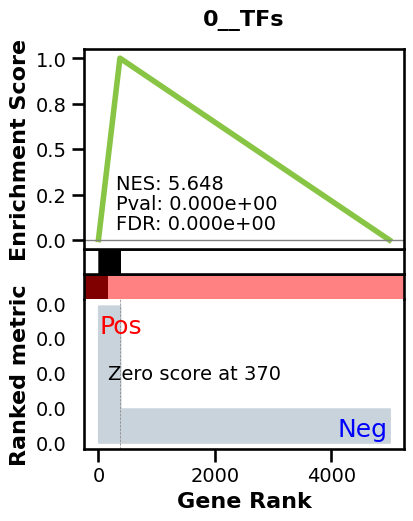

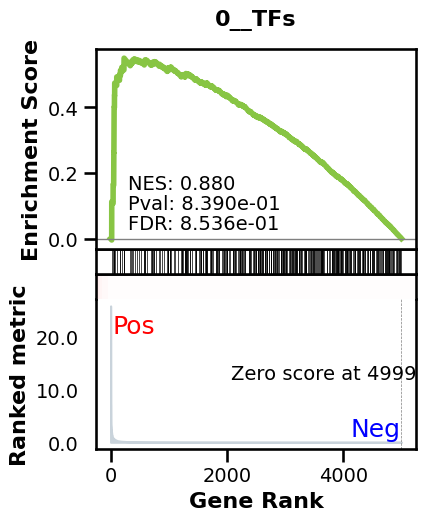

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.007002614850547766 
recall:  0.6589245943366211 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 95.68it/s]


 16%|█▌        | 20/128 [00:00<00:01, 95.69it/s]


 23%|██▎       | 30/128 [00:00<00:01, 95.74it/s]


 31%|███▏      | 40/128 [00:00<00:00, 95.77it/s]


 39%|███▉      | 50/128 [00:00<00:00, 95.75it/s]


 47%|████▋     | 60/128 [00:00<00:00, 95.76it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 95.79it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 95.78it/s]


 70%|███████   | 90/128 [00:00<00:00, 95.79it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 95.76it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 95.78it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 95.78it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 95.73it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005163227267657417
EPR: 6.338245364646802


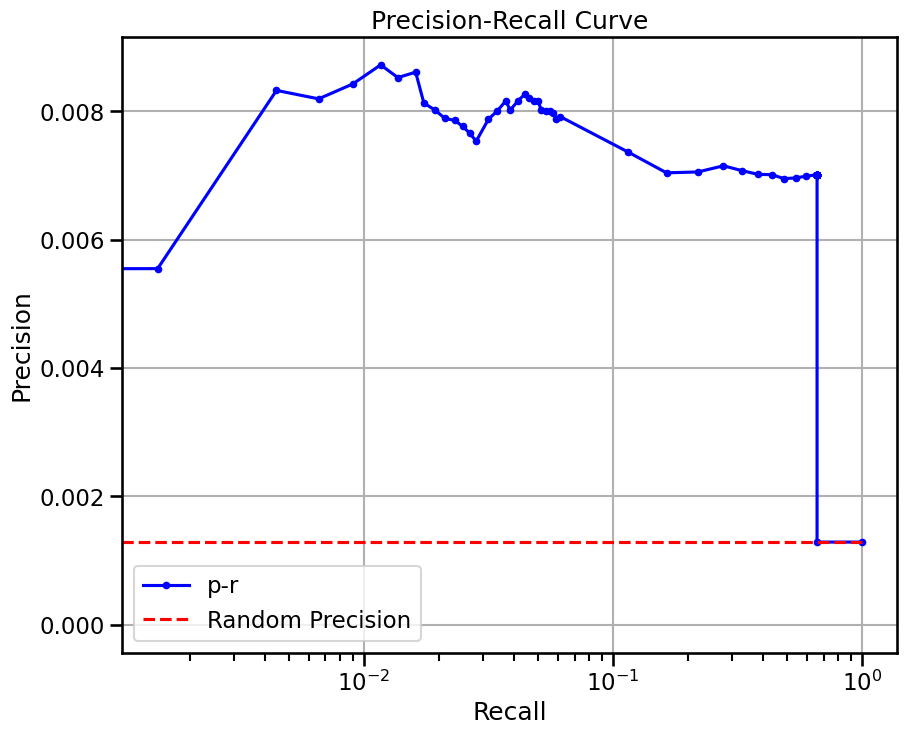

base enrichment


Top central genes: []


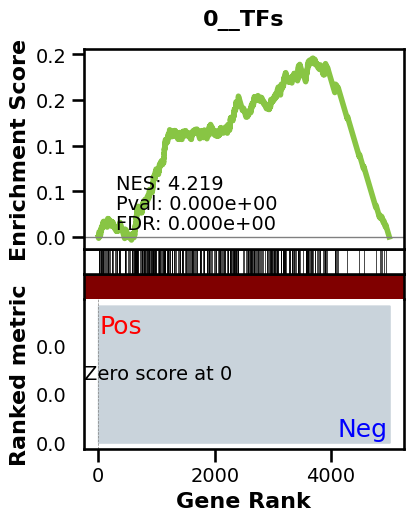

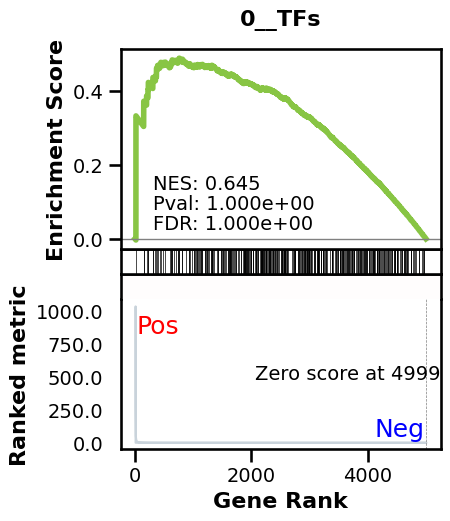

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 95.67it/s]


 16%|█▌        | 20/128 [00:00<00:01, 95.64it/s]


 23%|██▎       | 30/128 [00:00<00:01, 95.70it/s]


 31%|███▏      | 40/128 [00:00<00:00, 95.71it/s]


 39%|███▉      | 50/128 [00:00<00:00, 95.75it/s]


 47%|████▋     | 60/128 [00:00<00:00, 95.82it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 95.86it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 95.93it/s]


 70%|███████   | 90/128 [00:00<00:00, 95.89it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 95.91it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 95.87it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 95.84it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 95.76it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001111199700562542
EPR: 0.49297628192893606


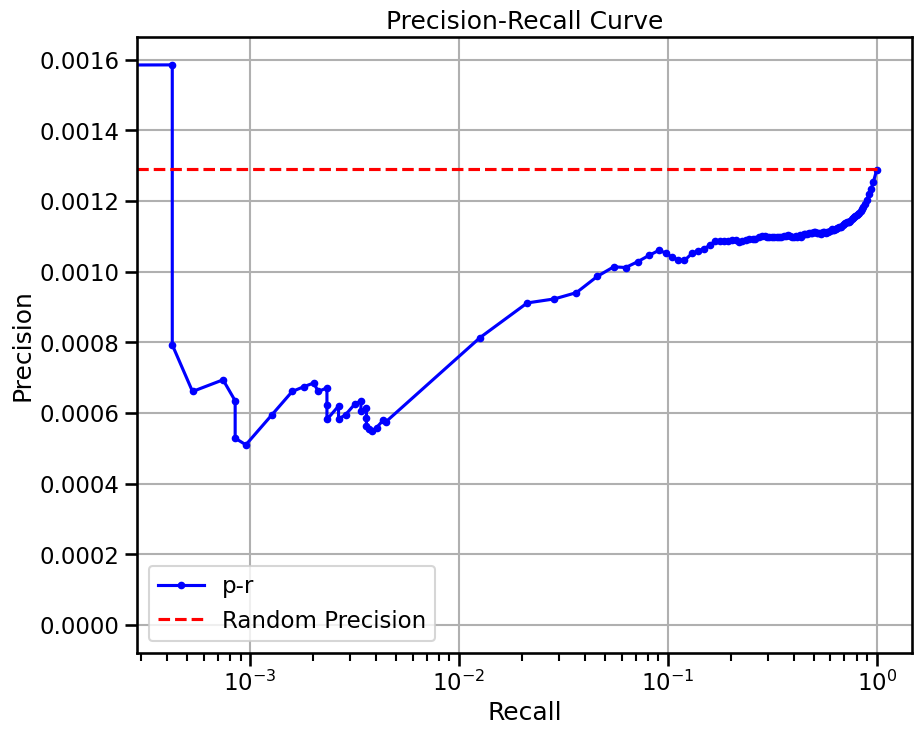

base enrichment


Top central genes: []


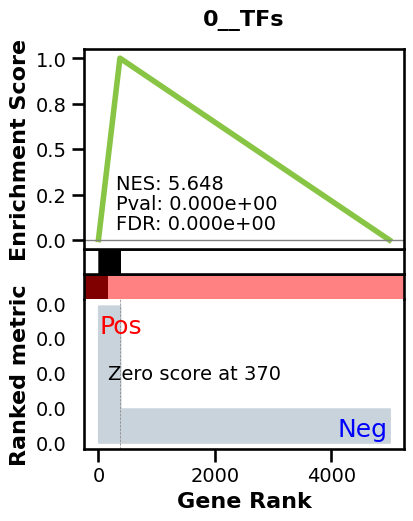

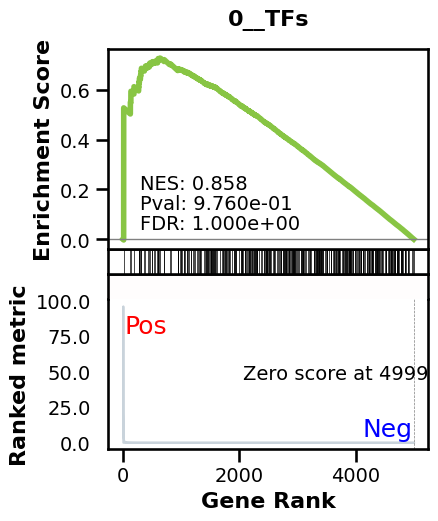

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.007002614850547766 
recall:  0.6589245943366211 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 94.80it/s]


 16%|█▌        | 20/128 [00:00<00:01, 94.87it/s]


 23%|██▎       | 30/128 [00:00<00:01, 94.93it/s]


 31%|███▏      | 40/128 [00:00<00:00, 94.79it/s]


 39%|███▉      | 50/128 [00:00<00:00, 94.64it/s]


 47%|████▋     | 60/128 [00:00<00:00, 94.72it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 94.76it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 94.82it/s]


 70%|███████   | 90/128 [00:00<00:00, 94.88it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 94.85it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 94.89it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 94.86it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 94.79it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004554494265565107
EPR: 2.6437855784580675


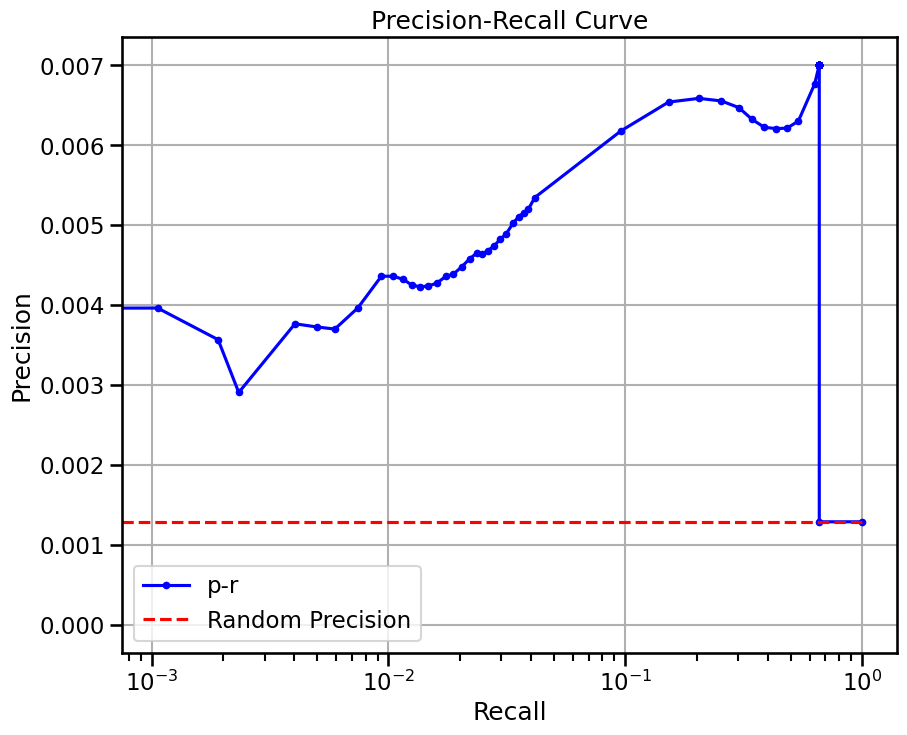

In [6]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="random expr",
                        preprocess="softmax",
                        head_agg='mean',
                        filtration="none",
                        forward_mode="none",
                        num_genes=2200,
                        max_cells=MAXCELLS,
                        doplot=False,
                        batch_size=32,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="none",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [7]:
metrics

{'kidney distal convoluted tubule epithelial cell_scprint_full': {'enriched_terms_Regulators': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Natural killer cells',
   'celltype.gmt__Gamma (PP) cells'],
  'significant_enriched_TFtargets': 61.607142857142854,
  'precision': 0.0008896322223674437,
  'recall': 1.0,
  'rand_precision': 0.0008897036558203398,
  'auprc': 0.0010082613242527612,
  'epr': 1.794288323583073},
 'kidney distal convoluted tubule epithelial cell_scprint_mean': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__Beta cells',
   'celltype.gmt__Cholangiocytes',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Gamma (PP) cells'],
  'significant_enriched_TFtargets': 11.764705882352942,
  'precision': 0.0008261483363013599,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'aupr

In [8]:
import pandas as pd

In [9]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

tools                                               name        EPR  \
0    full    kidney distal convoluted tubule epithelial cell   1.794288   
1    mean    kidney distal convoluted tubule epithelial cell   2.662047   
2    mean    kidney distal convoluted tubule epithelial cell   4.246105   
3   class    kidney distal convoluted tubule epithelial cell   4.979990   
4   class    kidney distal convoluted tubule epithelial cell  12.416586   
5    full  kidney loop of Henle thick ascending limb epit...   1.630698   
6    mean  kidney loop of Henle thick ascending limb epit...   1.721485   
7    mean  kidney loop of Henle thick ascending limb epit...  10.351980   
8   class  kidney loop of Henle thick ascending limb epit...   5.319020   
9   class  kidney loop of Henle thick ascending limb epit...  18.579117   
10   full              kidney collecting duct principal cell   1.835201   
11   mean              kidney collecting duct principal cell   0.713462   
12   mean              kidney collecting duct principal cell   7.304394   
13  class              kidney collecting duct principal cell   1.737159   
14  class              kidney collecting duct principal cell  12.323730   
15   full                                     mesangial cell   1.002681   
16   mean                                     mesangial cell   0.579329   
17   mean                                     mesangial cell  10.646251   
18  class                                     mesangial cell   2.208943   
19  class                                     mesangial cell   7.403313   
20   full                    blood vessel smooth muscle cell   1.908858   
21   mean                    blood vessel smooth muscle cell   1.618166   
22   mean                    blood vessel smooth muscle cell   7.582060   
23  class                    blood vessel smooth muscle cell   2.008982   
24  class                    blood vessel smooth muscle cell   9.073573   
25   full                                           podocyte   1.647052   
26   mean                                           podocyte   1.176409   
27   mean                                           podocyte   9.123769   
28  class                                           podocyte   1.747142   
29  class                                           podocyte  16.012406   
30   full                                         macrophage   1.501247   
31   mean                                         macrophage   0.700754   
32   mean                                         macrophage   8.816314   
33  class                                         macrophage   2.552937   
34  class                                         macrophage  20.229272   
35   full                                          leukocyte   2.154522   
36   mean                                          leukocyte   1.238022   
37   mean                                          leukocyte   8.847009   
38  class                                          leukocyte   1.100045   
39  class                                          leukocyte   5.921457   
40   full                     kidney interstitial fibroblast   2.064421   
41   mean                     kidney interstitial fibroblast   1.043395   
42   mean                     kidney interstitial fibroblast   9.228220   
43  class                     kidney interstitial fibroblast   2.989635   
44  class                     kidney interstitial fibroblast   4.796521   
45   full                                   endothelial cell   2.121755   
46   mean                                   endothelial cell   0.657581   
47   mean                                   endothelial cell   6.338245   
48  class                                   endothelial cell   0.492976   
49  class                                   endothelial cell   2.643786   

       AUPRC      RAND    TF_targ  TF_enr  TF_only  
0   0.001008  0.000890  61.607143   False    False  
1   0.000876  0.000826  11.764706    True    False  
2   0.001663  0.000